In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [2]:
df=pd.read_csv(r"C:\Users\abhisv.CORP\3D Objects\result21.csv",names=['Date','Tweets'])

In [3]:
df.head(3)

Date                                             Tweets
0  2020-04-06 07:40:51  b'RT @PTI_News: Karnataka Chief Minister B S Y...
1  2020-04-06 07:40:20  b'RT @PTI_News: Karnataka Chief Minister B S Y...
2  2020-04-06 07:40:16  b'RT @PTI_News: Karnataka Chief Minister B S Y...

In [4]:
df.shape

(12526, 2)

In [5]:
df=df.sample(2000)

In [6]:
df.drop('Date',axis=1,inplace=True)

In [7]:
df=df.reset_index(drop=True)

In [8]:
df.head()

Tweets
0  b"RT @DKShivakumar: Corona Virus Pandemic and ...
1  b'RT @waglenikhil: #TablighiJamat is a rabid, ...
2  b'RT @friendsofrss: RSS volunteers distributed...
3  b'RT @ANN_Newsable: #Karnataka farmer commits ...
4  b"RT @DKShivakumar: Corona Virus Pandemic and ...

In [9]:
print('Read first 5 tweets')
i=1
for tweet in df['Tweets'][0:5]:
    print(str(i)+ ')'+ tweet +'\n')
    i=i+1

Read first 5 tweets
1)b"RT @DKShivakumar: Corona Virus Pandemic and the lockdown will inflict a devastating blow on our economy.\n\nHave decided to form a 'Vision Ka\xe2\x80\xa6"

2)b'RT @waglenikhil: #TablighiJamat is a rabid, outdated organisation. But so is RSS or Sanatan. Along with Tablighi, UP, MP and Karnataka CMs\xe2\x80\xa6'

3)b'RT @friendsofrss: RSS volunteers distributed Essential Grocery kits for Lockdown affected needy families at Shivamogga, Karnataka. #RSSfigh\xe2\x80\xa6'

4)b'RT @ANN_Newsable: #Karnataka farmer commits suicide after falling to sell his watermelon produce \n\n#coronaviruslockdown #coronavirusoutbrea\xe2\x80\xa6'

5)b"RT @DKShivakumar: Corona Virus Pandemic and the lockdown will inflict a devastating blow on our economy.\n\nHave decided to form a 'Vision Ka\xe2\x80\xa6"



In [10]:
#clean the text
#Create a function to clean the text
import re
def cleantxt(text):
    text=re.sub(r'@[A-Za-z0-9]+','',text) #Removing @'s'
    text=re.sub(r'#','',text)#Removing # hash tags
    text=re.sub(r'https?:\/\/\S+','',text)
    text=re.sub(r'RT[\s]+','',text)
    text=re.sub(r'\Ab\W+','',text)
    text=re.sub(r'\A_\w+','',text)
    text=re.sub(r':','',text)
    text=re.sub(r'\d+','',text)
    text=re.sub(r'\\x+','',text)
    text=re.sub(r'/','',text)
    text=re.sub(r'\B-','',text)
    text=re.sub(r'[^\w]', ' ', text)
    text=re.sub(r'_', '', text)
    text=re.sub(r'\n+', '', text)
    text=text.lower()
    return text


df['Tweets']=df['Tweets'].apply(cleantxt)

df.head(5)

Tweets
0  corona virus pandemic and the lockdown will in...
1  tablighijamat is a rabid  outdated organisatio...
2  rss volunteers distributed essential grocery k...
3   karnataka farmer commits suicide after fallin...
4  corona virus pandemic and the lockdown will in...

In [11]:
i=1
for i in range(0,df.shape[0]):
    print(str(i)+')'+df['Tweets'][i])
    i=i+1

0)corona virus pandemic and the lockdown will inflict a devastating blow on our economy  n nhave decided to form a  vision kaea 
1)tablighijamat is a rabid  outdated organisation  but so is rss or sanatan  along with tablighi  up  mp and karnataka cmsea 
2)rss volunteers distributed essential grocery kits for lockdown affected needy families at shivamogga  karnataka  rssfighea 
3) karnataka farmer commits suicide after falling to sell his watermelon produce  n ncoronaviruslockdown coronavirusoutbreaea 
4)corona virus pandemic and the lockdown will inflict a devastating blow on our economy  n nhave decided to form a  vision kaea 
5)majlis khuddamul ahmadiyya yadgir  karnataka  provided food kits with emergency supplies to families of the locality  durinea 
6)sir please invoke  n ndisaster management act and  n narrest all officials indulging in  n ncorruption duea 
7)the selfie or photo will have gps coordinates so the location of the sender would be known  karnataka medical education m

1596)dear  if you can t take care of our kasaragodu  give it back karnataka  we will take care of them  but don t pea 
1597)appeal to people of karnataka n nwe have seen a sharp rise in the number of covid positive cases in the last few days aea 
1598)corona virus pandemic and the lockdown will inflict a devastating blow on our economy  n nhave decided to form a  vision kaea 
1599)as of  pm on april   the total number of covid cases in karnataka rose to   with  discharges and  deaths recorea 
1600) ea 
1601)corona virus pandemic and the lockdown will inflict a devastating blow on our economy  n nhave decided to form a  vision kaea 
1602)corona virus pandemic and the lockdown will inflict a devastating blow on our economy  n nhave decided to form a  vision kaea 
1603)nsui karnataka volunteers distributed ration kits to needy people  who are facing problem in this lockdown in bengaluru  nladengeea 
1604) air pollution levels in bengaluru have come down by  to  per cent during the lockdow

In [12]:
#Get subjectivity and polarity, subjectivity tells how subjective or opinion the text is, polarity tells how positive or negative the text is

In [13]:
from textblob import TextBlob
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

df['Subjectivity']=df['Tweets'].apply(getSubjectivity)
df['Polarity']=df['Tweets'].apply(getPolarity)

df.head(4)

Tweets  Subjectivity  Polarity
0  corona virus pandemic and the lockdown will in...      1.000000      -1.0
1  tablighijamat is a rabid  outdated organisatio...      0.633333      -0.4
2  rss volunteers distributed essential grocery k...      0.300000       0.0
3   karnataka farmer commits suicide after fallin...      0.000000       0.0

In [14]:
#To check how well the sentiments are distributed, we use worldcloud, most highly used words are highlighted heavily.

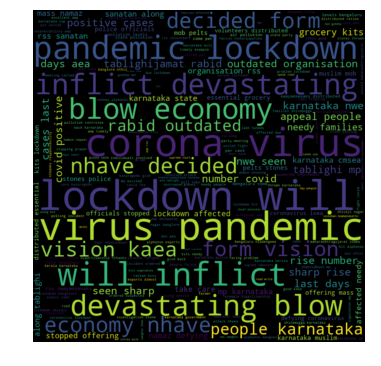

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
import pandas as pd 
allwords=''.join ([twts for twts in df['Tweets']])
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black',
                min_font_size = 5).generate(str(allwords)) 
  
# plot the WordCloud image                       
plt.figure(figsize = (5,5), facecolor = None) 
plt.imshow(wordcloud,interpolation='bilinear') 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [16]:
#Create a function to compute positive, neutral,negative analysis
def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score==0:
        return 'Neutral'
    else:
        return 'Positive'
    
df['Analysis']=df['Polarity'].apply(getAnalysis)

In [21]:
df.head()

Tweets  Subjectivity  Polarity  \
0  corona virus pandemic and the lockdown will in...      1.000000      -1.0   
1  tablighijamat is a rabid  outdated organisatio...      0.633333      -0.4   
2  rss volunteers distributed essential grocery k...      0.300000       0.0   
3   karnataka farmer commits suicide after fallin...      0.000000       0.0   
4  corona virus pandemic and the lockdown will in...      1.000000      -1.0   

   Analysis  
0  Negative  
1  Negative  
2   Neutral  
3   Neutral  
4  Negative

In [17]:
#print all of the positive tweets
j=1
sorteddf=df.sort_values(by='Polarity')
for i in range(0,sorteddf.shape[0]):
    if(sorteddf['Analysis'][i]=='Positive'):
        print(str(j)+ ')' +sorteddf['Tweets'][i])
        print()
        j=j+1

1)please make sure you tweet when you get the latest verified snippet on the lockdown extension or enea 

2)here s something fresh  straight outta  that you can trust n n

3)does vitamin c help people battle covidpandemic  how far is the lockdown helping india  dr devi prasad shetty  founea 

4)around  fishermen who arrived at state borders from karnataka early morning are quarantined at giddhalur royalea 

5)lockdown effect is seen very clearly here  even in her absence  situation is not same in karnataka though  concentrate there  

6)covid lockdown  nwild animals freely roaming on the roads  these latest visuals are from kodugu in karnataka where aea 

7)caught on camera this is how they show real colour    they are real devil  lockdown going for a toss ea 

8)indiafightscoronavirus   complete lockdown in dakshina kannada district of karnataka  all commercial establishmenea 

9)very sensible instructions by   bengaluru police  and karnataka police  are doing excellent work  to effec

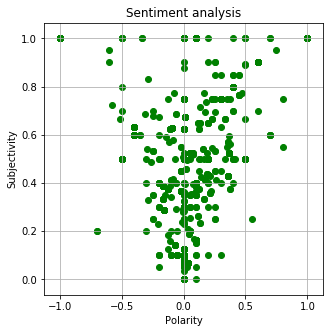

In [18]:
#Plot polarity vs subjectivity
plt.figure(figsize=(5,5))
for i in range(df.shape[0]):
    plt.scatter(df['Polarity'][i],df['Subjectivity'][i],color='Green')
plt.title('Sentiment analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.grid(True)
plt.show()

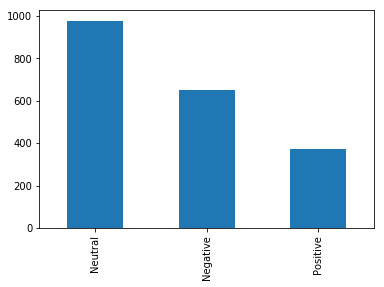

In [19]:
#Lets plot and visualize the counts
df['Analysis'].value_counts().plot(kind='bar')

In [ ]:
################################################

In [1]:
import tweepy
import csv 
# Here getting all needed credentials(consumer_key,consumer_secert,Access_token,Access_secert)
auth = tweepy.auth.OAuthHandler('7OpE6xUJ4kwlz6HWQ1Y3naoq0', 'br149Eq0D4Y3SPbDzn33rGfWiiI6hg4gCWjsZbDeSDj6RHX18g')
auth.set_access_token('541806887-ZzG4LCOP3L5KJLvvcJkZuawjTMaGAfWLXslWIqQd', 'OA7peoNVhNgbebVNyiSHDUvrwEwM1ycgvpEjrglwwuokE')

api = tweepy.API(auth)

# Open/create a file to append data to
csvFile21 = open('xyz123.csv', 'a')# appending the data

#Use csv writer
csvWriter = csv.writer(csvFile21)

for tweet in tweepy.Cursor(api.search,
                           q = '#ResignModi',
                           #tweet_mode='extended',
                           count=1000,
                           lang = "en").items():
     # Write a row to the CSV file. I use encode UTF-8
        csvWriter.writerow([tweet.created_at, tweet.text.encode('utf-8')])
        print (tweet.created_at, tweet.text)
csvFile21.close()

2021-04-19 07:36:05 If the Prime Minister cannot protect the country, what is the use of having one such Prime Minister?

Please step d… https://t.co/TD05Rbjnyt
2021-04-19 07:36:04 RT @Veniceofeast: Covid death certificate should have PM’s photo 

RT if you agree 

#ResignModi https://t.co/UkDGI2f9y0
2021-04-19 07:36:03 RT @Sachin88617922: The king has given the people as gifts with nails, pits, sticks and daggers in the back. Everyone knows that the public…
2021-04-19 07:36:03 RT @davinder_7: It’s called digital india??

#RepealLawsToEndProtest

 #ResignModi https://t.co/qiXW6urhav
2021-04-19 07:36:03 RT @AnumaVidisha: Owing to Utter Irresponsible  conduct #ResignModi
2021-04-19 07:36:03 RT @Aditya___9202: Centre quietly withdraws Rs 50 lakh insurance coverage for healthcare workers who succumbed to the pandemic. WOW.

The m…
2021-04-19 07:36:03 RT @GouravS67645698: Every Nationalist support #Nation_With_Modi and all anti-nationals, librandus, are supports #ResignModi 
But the poste…


2021-04-19 07:35:49 RT @imMAK02: "Have never seen such huge crowd before" ~ Narendra Modi.

 #ResignModi https://t.co/oMgzUJUPAu
2021-04-19 07:35:49 Go back 
#ResignModi
2021-04-19 07:35:49 RT @MohamedHalithM2: Everyone is in so much distress because of this guy... 

#ResignModi
#postpone_chsl2020 
#ssc_jawab_do
#StudentLivesMa…
2021-04-19 07:35:48 RT @BhavikaKapoor5: I wanna k!ck butts of every person who voted for fool Modi. 😡

I am angry very angry.😠

#ResignModi
2021-04-19 07:35:47 RT @MohamedHalithM2: #ResignModi Actor @NakuulMehta on fire 🔥

#ResignModi https://t.co/AKb0fS9fDY #ResignModi
2021-04-19 07:35:47 RT @MohamedHalithM2: We strongly support this hashtag.

#ResignModi
 #ResignModi https://t.co/QFtiMiDVfy #ResignModi
2021-04-19 07:35:47 RT @sarcasticbro89: Corona to Modi's rallies #ResignModi 👇🏻👇🏻 https://t.co/tnOJui5l7O
2021-04-19 07:35:47 RT @vinodhuhin: #ResignModi poor mother son 😁😁😁😂😂 https://t.co/msHUD0FZks
2021-04-19 07:35:47 RT @manipaiyanmp: My leader Dr.Thol.Thiru

2021-04-19 07:35:33 RT @Aditya___9202: Centre quietly withdraws Rs 50 lakh insurance coverage for healthcare workers who succumbed to the pandemic. WOW.

The m…
2021-04-19 07:35:33 RT @TribalArmy: Who is responsible for this??
#ResignModi https://t.co/kbpFzVGych
2021-04-19 07:35:32 RT @PriyaINC: Actor @NakuulMehta on fire 🔥

#ResignModi https://t.co/uF5zCtZGpm
2021-04-19 07:35:32 RT @imMAK02: "Have never seen such huge crowd before" ~ Narendra Modi.

 #ResignModi https://t.co/oMgzUJUPAu
2021-04-19 07:35:32 RT @imMAK02: "Have never seen such huge crowd before" ~ Narendra Modi.

 #ResignModi https://t.co/oMgzUJUPAu
2021-04-19 07:35:32 RT @DrINCsupporter: #ResignModi 
#ModiMadeDisaster 
This video is so apt...
Difference between Jumla and reality.
Watch and share 👇 https:/…
2021-04-19 07:35:32 RT @BhavikaKapoor5: I wanna k!ck butts of every person who voted for fool Modi. 😡

I am angry very angry.😠

#ResignModi
2021-04-19 07:35:31 RT @DilliDurAst: MODI = Mismanagement Of Developing India


2021-04-19 07:35:19 RT @the_Ramkishor: Who is responsible for this ❓
#ResignModi https://t.co/eZJ6G3lmNl
2021-04-19 07:35:19 RT @Anonee16: Modi has been nothing but a disaster. 

#RepealLawsToEndProtest #ResignModi #FarmersProtest https://t.co/kKlc3CvKmf
2021-04-19 07:35:19 RT @Deepakkhatri812: So here is the modi 🧐⤵️

#ResignModi https://t.co/KhdKO8tIhQ
2021-04-19 07:35:19 RT @AnumaVidisha: Owing to Utter Irresponsible  conduct #ResignModi
2021-04-19 07:35:19 RT @davinder_7: Still on top 🤟🏻

Keep supporting 

Bhakt v aa rahe a magar 😂

#ResignModi https://t.co/jB2Fk4L7xE
2021-04-19 07:35:19 RT @BanglarGorboMB: If the Prime Minister cannot protect the country, what is the use of having one such Prime Minister?

Please step down,…
2021-04-19 07:35:19 RT @indiaTrendCEO: #ResignModi What starts in Tamil Nadu, starts trending in India. If this PM continues, the nation will be plunged into a…
2021-04-19 07:35:18 RT @DilliDurAst: #ResignModi is the right response to the current crisis. Naren

2021-04-19 07:35:02 RT @PriyaINC: Actor @NakuulMehta on fire 🔥

#ResignModi https://t.co/uF5zCtZGpm
2021-04-19 07:35:02 RT @SevadalJK: As Covid19 crisis threatens Indian lives, Chinese occupation threatens India's sovereignty- no wonder the people of India ar…
2021-04-19 07:35:02 RT @DilliDurAst: If Modi resigns today and government is run by Ram Nath Kovind directly, it will do a better job. Bureaucrats won’t have t…
2021-04-19 07:35:02 RT @BanglarGorboMB: 16 rallies in 10 days amid a pandemic.

Shame on you, @narendramodi!
#ResignModi https://t.co/9RFBKUF1Ln
2021-04-19 07:35:02 RT @JaibhimDrBR: Damn buffalo! We have been building schools for 50 years.We built hospitals.Together we put a statue of Enga Ion who told…
2021-04-19 07:35:01 RT @Navjot_nagra02: The joke is on us being citizens of the country and choosing such a looser President. Go Back Modi👎

#RepealLawsToEndPr…
2021-04-19 07:35:01 RT @MehraInc: This is the actual symbol of BJP (Bharat Jalao Party). 

They'll burn the coun

2021-04-19 07:34:46 RT @ManavCh26651091: Ah yes. Finally the trends we live to see  . I just like seeing these #ResignModi https://t.co/KQeFOL6HBX
2021-04-19 07:34:46 RT @DilliDurAst: If Modi resigns today and government is run by Ram Nath Kovind directly, it will do a better job. Bureaucrats won’t have t…
2021-04-19 07:34:46 RT @MandoMunda: Ah yes. Finally. The trends we live to see. Even though they're in vain, I just like seeing these.
#ResignModi https://t.co…
2021-04-19 07:34:45 RT @sankul333: Next time you vote, just remember that twitter users with names like "piss volcano" and "pussy master 9000" did more to help…
2021-04-19 07:34:45 RT @Nonehal2: Any developments?
Why same situation?

#Nation_With_Modi #ResignModi https://t.co/scDUuwTmyP
2021-04-19 07:34:45 RT @meenakandasamy: Merchant of death
#ResignModi
2021-04-19 07:34:45 RT @_AAhmed004: #ResignModi 

The art                            The artist https://t.co/egHbpws0hU
2021-04-19 07:34:45 100k tweets
#ResignModi https://t

2021-04-19 07:34:28 RT @j_garima_j: We're anyway functioning like a country without a Prime Minister so #ResignModi https://t.co/1TP2WJUTeP
2021-04-19 07:34:28 RT @j_garima_j: We're anyway functioning like a country without a Prime Minister so #ResignModi https://t.co/1TP2WJUTeP
2021-04-19 07:34:28 Next time you vote, just remember that twitter users with names like "piss volcano" and "pussy master 9000" did mor… https://t.co/cxFKgCDDlJ
2021-04-19 07:34:28 RT @BanglarGorboMB: Lest we forget.
 #ResignModi https://t.co/3qXN5ZSiUP
2021-04-19 07:34:27 RT @fekubawa: Something straight from the Horse’s mouth. 

Now that you have admitted, Narendra Modi should resign and get admitted to ment…
2021-04-19 07:34:27 RT @AhusainFAIZI: What Modi Is.           what IT.CELL Shows. #ResignModi https://t.co/Ph5twXCpf9
2021-04-19 07:34:27 RT @FareethS: So here is the modi 🧐

#ResignModi https://t.co/1pxFQwBBiq
2021-04-19 07:34:26 RT @SurrbhiM: This 5-yr-old girl, a cancer patient, who is COVID positive,

2021-04-19 07:34:13 RT @SwatiIKR: Now It's correct👇

#ResignModi https://t.co/NG0nJpMtNb
2021-04-19 07:34:13 RT @Sachin88617922: The king has given the people as gifts with nails, pits, sticks and daggers in the back. Everyone knows that the public…
2021-04-19 07:34:12 RT @Navjot_nagra02: The joke is on us being citizens of the country and choosing such a looser President. Go Back Modi👎

#RepealLawsToEndPr…
2021-04-19 07:34:11 RT @PriyaINC: Actor @NakuulMehta on fire 🔥

#ResignModi https://t.co/uF5zCtZGpm
2021-04-19 07:34:11 RT @kanahaiya_: Enough is enough, now #ResignModi because you have failed India at every front. https://t.co/7t1ei1lHqt
2021-04-19 07:34:11 RT @SwatiIKR: Now It's correct👇

#ResignModi https://t.co/NG0nJpMtNb
2021-04-19 07:34:11 RT @RameshTj_: Political power fanatics are BJP leaders Even after the CPM and Congress leaders abandoned their election rallies in West Be…
2021-04-19 07:34:11 The Corona condition has reached dismal highs due to your incompetent governmen

2021-04-19 07:33:56 RT @tadipaar_hun: Modi government should #RepealLawsToEndProtest or modi can resign because it's not Rs 50 protest that will end. #ResignMo…
2021-04-19 07:33:56 @lkgargji #ResignModi 

Congratulations Worriers for 100k Tweets.

1.Politics · Trending
#ResignModi
100K Tweets

keep going.... keep going
2021-04-19 07:33:55 RT @BanglarGorboMB: 16 rallies in 10 days amid a pandemic.

Shame on you, @narendramodi!
#ResignModi https://t.co/9RFBKUF1Ln
2021-04-19 07:33:55 RT @shupd134340: It's good to see this 
#ResignModi https://t.co/qkOAkEZdcz
2021-04-19 07:33:55 RT @FareethS: So here is the modi 🧐

#ResignModi https://t.co/1pxFQwBBiq
2021-04-19 07:33:55 RT @imfulara: Modi is fail PM. He must resign.

#ResignModi
2021-04-19 07:33:55 RT @imMAK02: "Have never seen such huge crowd before" ~ Narendra Modi.

 #ResignModi https://t.co/oMgzUJUPAu
2021-04-19 07:33:55 Seems Indians have realised their mistake in electing Modi as PM so 
#ResignModi  
#RepealLawsToEndProtest https://t

2021-04-19 07:33:39 RT @sankul333: Next time you vote, just remember that twitter users with names like "piss volcano" and "pussy master 9000" did more to help…
2021-04-19 07:33:39 RT @INCIndia: As Covid19 crisis threatens Indian lives, Chinese occupation threatens India's sovereignty- no wonder the people of India are…
2021-04-19 07:33:39 RT @DilliDurAst: #ResignModi is the right response to the current crisis. Narendra Modi led us to believe Covid was over, was distributing…
2021-04-19 07:33:39 RT @ManojMehtamm: Truth flows out while Modi is mocking,
knows that they’re right and not joking !!
#ResignModi https://t.co/p5PhUvuEwi
2021-04-19 07:33:38 RT @aditya_95_: Yes pls #ResignModi
2021-04-19 07:33:38 RT @PAPA__Tweets: #श्मशान_मंत्री_मोदी #ResignModi 

ART                                        ARTIST https://t.co/ZkOkMLKmRR
2021-04-19 07:33:38 #ResignModi
It's mind boggling that a prime minister getting so much of data has let his guard down in a COVID  pan… https://t.co/WHkTYCgWZ1

2021-04-19 07:33:18 RT @SonuPas82185873: Once Our Formal PM Dr. Manmohan singh said Narendra Modi will become the cause of destruction of the nation now will a…
2021-04-19 07:33:18 #ResignModi and stop lying https://t.co/OOM5O13eXo #ResignModi
2021-04-19 07:33:18 RT @khangirl_123: #ResignModi
Old india                          new  India https://t.co/ggOhWLCdYC
2021-04-19 07:33:18 RT @DilliDurAst: #ResignModi is the right response to the current crisis. Narendra Modi led us to believe Covid was over, was distributing…
2021-04-19 07:33:18 RT @BhavikaKapoor5: #ResignModi

If you elect a leader even after 
Picture 1 = Babri demolition 
Picture 2 = Godhra genocide 
Picture 3 = D…
2021-04-19 07:33:17 RT @Nonehal2: Any developments?
Why same situation?

#Nation_With_Modi #ResignModi https://t.co/scDUuwTmyP
2021-04-19 07:33:17 RT @kaviikanna: #ResignModi 

#RT For More Twitter impressions https://t.co/DQRm56E4zX
2021-04-19 07:33:17 RT @MehraInc: This is the actual symbol of BJP (Bharat Jalao 

2021-04-19 07:32:59 RT @Deepakkhatri812: So here is the modi 🧐⤵️

#ResignModi https://t.co/KhdKO8tIhQ
2021-04-19 07:32:59 RT @DilliDurAst: #ResignModi is the right response to the current crisis. Narendra Modi led us to believe Covid was over, was distributing…
2021-04-19 07:32:59 RT @DieForRights: Of course 
#ResignModi
2021-04-19 07:32:59 RT @sankul333: Next time you vote, just remember that twitter users with names like "piss volcano" and "pussy master 9000" did more to help…
2021-04-19 07:32:59 RT @Thecongressian: #TooMuchOxygen
This video by 
actor @NakuulMehta ji must watch and share.
Just superb 👏👏👍👌🔥🔥🔥

#ResignModi https://t.co…
2021-04-19 07:32:59 RT @MehraInc: When pyres burned, Modi rallied. 

#ResignModi https://t.co/NSXU2fjwMa
2021-04-19 07:32:58 RT @DilliDurAst: #ResignModi is the right response to the current crisis. Narendra Modi led us to believe Covid was over, was distributing…
2021-04-19 07:32:58 RT @meenakandasamy: Merchant of death
#ResignModi
2021-04-19 07:32:58 

2021-04-19 07:32:39 RT @Sachin88617922: Boycott BJP Government Guys
#श्मशान_मंत्री_मोदी
#ResignModi https://t.co/dDaifVBFdM
2021-04-19 07:32:39 RT @manipaiyanmp: My leader Dr.Thol.Thirumavalavan #istandwiththiruma #ResignModi https://t.co/AH4PRMDrAR
2021-04-19 07:32:38 RT @j_garima_j: We're anyway functioning like a country without a Prime Minister so #ResignModi https://t.co/1TP2WJUTeP
2021-04-19 07:32:38 RT @kanahaiya_: Enough is enough, now #ResignModi because you have failed India at every front. https://t.co/7t1ei1lHqt
2021-04-19 07:32:38 RT @BanglarGorboMB: Indeed so, @narendramodi ji...
Shame on you!
#ResignModi https://t.co/Z8FZm1PjEX
2021-04-19 07:32:38 RT @BanglarGorboMB: Indeed so, @narendramodi ji...
Shame on you!
#ResignModi https://t.co/Z8FZm1PjEX
2021-04-19 07:32:38 RT @asadhameed0786: In this situation they are playing with the life of students by holding the exams. 
Meanwhile Students:
#StudentLivesMa…
2021-04-19 07:32:38 RT @imMAK02: "Have never seen such huge crowd b

2021-04-19 07:32:21 RT @kaurkulwinder6: Have some shame now.....
Its too much... @PMOIndia
#ResignModi https://t.co/Pr1wqSCLBu
2021-04-19 07:32:21 RT @zayeem_sk: Ah yes. Finally. The trends we live to see. Even though they're in vain, I just like seeing these.
#ResignModi
#ModiMadeDisa…
2021-04-19 07:32:21 RT @YasminKidwai: Pls #ResignModi do india a favour
2021-04-19 07:32:21 RT @taniska2_: जान है तो जहान है।
I @taniska2_ request to all of you please raise your voice for your rights 🙏🙏

#ResignModi 
#ssc_jawab_do…
2021-04-19 07:32:21 RT @korvenishivraj: April 2020  Vs April 2021 

(Modi's Achievement)

Spike in cases 
Shortage of beds
Shortage of oxygen
Shortage of venti…
2021-04-19 07:32:21 RT @FAM4TMC: This is the actual symbol of BJP (Bharat Jalao Party). 

They'll burn the country. If not by riots, then they'll put you up in…
2021-04-19 07:32:21 RT @Surinderssuri: Farmers are sitting on roads to save the Agriculture Sector!

Repeal The Laws &amp; Our Farmers Will Clear The Roads
#

2021-04-19 07:32:00 @i7w38XPALrSf3JR's account is temporarily unavailable because it violates the Twitter Media Policy. Learn more.
2021-04-19 07:32:00 RT @BanglarGorboMB: Telling image.
#ResignModi https://t.co/DaQTbjJaLQ
2021-04-19 07:31:59 RT @Sachin88617922: The king has given the people as gifts with nails, pits, sticks and daggers in the back. Everyone knows that the public…
2021-04-19 07:31:59 RT @davinder_7: BJP and Modi Failed India .ppl needs to open their eyes

#RepealLawsToEndProtest

 #ResignModi https://t.co/IVXXkusl9L
2021-04-19 07:31:59 RT @sreenshri: The Hunter                         The Hunted #ResignModi https://t.co/8VAkVBUCgo
2021-04-19 07:31:59 RT @ertegul4u: Master of destruction

#ResignModi https://t.co/ZehmRNNj1O
2021-04-19 07:31:58 RT @sanitarypanels: These lund pakodes trending "nation with Modi" are not even defending Modi anymore. It's literally just photos of Modi.…
2021-04-19 07:31:58 RT @AITCofficial: "For the skyrocketing COVID-19 cases, HE MUST RESIG

2021-04-19 07:31:41 RT @imfulara: Modi is fail PM. He must resign.

#ResignModi
2021-04-19 07:31:41 RT @BanglarGorboMB: If the Prime Minister cannot protect the country, what is the use of having one such Prime Minister?

Please step down,…
2021-04-19 07:31:41 RT @meenakandasamy: What starts in Tamil Nadu, starts trending in India. If this PM continues, the nation will be plunged into a disaster b…
2021-04-19 07:31:41 RT @VAmmu2421: #ResignModi
Modiji is running after political rallies🤦‍♀️👇 https://t.co/l5Eetr4xC7
2021-04-19 07:31:40 RT @Harris_4Inc: A dog will come out and cry crocodile tears in Godi media as soon the rallies are over in WB.
Godi media (the puppies) wil…
2021-04-19 07:31:40 RT @FAM4TMC: This is the actual symbol of BJP (Bharat Jalao Party). 

They'll burn the country. If not by riots, then they'll put you up in…
2021-04-19 07:31:40 #ResignModi

If you elect a leader even after 
Picture 1 = Babri demolition 
Picture 2 = Godhra genocide 
Picture 3… https://t.co/zIKP3Im7

2021-04-19 07:31:20 RT @DilliDurAst: India is hit by a devastating second wave of Covid, people are dying on footpaths.... and the BJP is trending “Nation with…
2021-04-19 07:31:20 RT @MandoMunda: Ah yes. Finally. The trends we live to see. Even though they're in vain, I just like seeing these.
#ResignModi https://t.co…
2021-04-19 07:31:20 RT @Jasdeep29910602: @meenakandasamy We Support #ResignModi #RepealLawsToEndProtest
2021-04-19 07:31:20 RT @sreenshri: The Hunter                         The Hunted #ResignModi https://t.co/8VAkVBUCgo
2021-04-19 07:31:19 RT @Deepakkhatri812: So here is the modi 🧐⤵️

#ResignModi https://t.co/KhdKO8tIhQ
2021-04-19 07:31:19 RT @AITCofficial: "For the skyrocketing COVID-19 cases, HE MUST RESIGN. He is the man who is responsible. No planning, no administrative ca…
2021-04-19 07:31:19 RT @taniska2_: I strongly support this hashtag.

#ResignModi
 #ResignModi https://t.co/H7RkhS88dj
2021-04-19 07:31:18 RT @SonuPas82185873: Once Our Formal PM Dr. Manmohan sin

2021-04-19 07:30:59 RT @imMAK02: "Have never seen such huge crowd before" ~ Narendra Modi.

 #ResignModi https://t.co/oMgzUJUPAu
2021-04-19 07:30:59 RT @CitizenKamran: This is enough to demand #ResignModi https://t.co/4GlbMvO29s
2021-04-19 07:30:59 RT @DilliDurAst: MODI = Mismanagement Of Developing India

#ResignModi
2021-04-19 07:30:58 RT @AnumaVidisha: Owing to Utter Irresponsible  conduct #ResignModi
2021-04-19 07:30:58 RT @baburao__aapte: #Nation_With_Modi for #ResignModi

BJPee presents 👇🏻 https://t.co/p8aYgGxaF1
2021-04-19 07:30:58 RT @Deepakkhatri812: So here is the modi 🧐⤵️

#ResignModi https://t.co/KhdKO8tIhQ
2021-04-19 07:30:58 RT @sgowthamiyc: Another day, more deaths...
Another day, more sufferings...
Another day, more COVID-19 cases...

#ResignModi , India rejec…
2021-04-19 07:30:58 RT @mahendr18553090: #ResignModi 100K tweets, we want a million tweets  on this trend
2021-04-19 07:30:58 As Covid19 crisis threatens Indian lives, Chinese occupation threatens India's soverei

2021-04-19 07:30:38 RT @SanjuBora12: fail government 👎where is 56 inch 🤣
#ResignModi https://t.co/1CkJqXs8yf
2021-04-19 07:30:38 RT @BanglarGorboMB: Another day, more deaths...
Another day, more sufferings...
Another day, more COVID-19 cases...

#ResignModi, India rej…
2021-04-19 07:30:38 RT @meenakandasamy: What starts in Tamil Nadu, starts trending in India. If this PM continues, the nation will be plunged into a disaster b…
2021-04-19 07:30:38 For the deeds he has done, even 100K trending is not enough. 
#ResignModi
2021-04-19 07:30:37 RT @AnumaVidisha: Owing to Utter Irresponsible  conduct #ResignModi
2021-04-19 07:30:37 RT @meenakandasamy: What starts in Tamil Nadu, starts trending in India. If this PM continues, the nation will be plunged into a disaster b…
2021-04-19 07:30:37 RT @kaviikanna: Modi Does not have any long term vision🤣

Says - VCK President🔥  

 #ResignModi https://t.co/Ut4tx0HGBI
2021-04-19 07:30:37 RT @hihihihiHausDel: 🔄🔄🔄Max Retweet 🔄🔄🔄

STUDENTS ARE DYING and
Al

2021-04-19 07:30:19 RT @MehraInc: When pyres burned, Modi rallied. 

#ResignModi https://t.co/NSXU2fjwMa
2021-04-19 07:30:19 RT @yuva_uthvar: A remorseless attack with a blunt instrument ( Negligence) by him....😡 #ResignModi
2021-04-19 07:30:19 RT @MehraInc: This is the actual symbol of BJP (Bharat Jalao Party). 

They'll burn the country. If not by riots, then they'll put you up i…
2021-04-19 07:30:19 RT @Apgaur2001: #ResignModi
Yes Modiji resign!!
Because you have filled your Banks with our money, your own sons and daughters are harassin…
2021-04-19 07:30:18 RT @Veniceofeast: Covid death certificate should have PM’s photo 

RT if you agree 

#ResignModi https://t.co/UkDGI2f9y0
2021-04-19 07:30:18 RT @jayaraj1990: One Nation. One Mistake 

#ResignModi 

@thirumaofficial https://t.co/I7S1bc0Ofg
2021-04-19 07:30:18 RT @sreenshri: The Hunter                         The Hunted #ResignModi https://t.co/8VAkVBUCgo
2021-04-19 07:30:18 RT @j_garima_j: We're anyway functioning like a country w

2021-04-19 07:30:02 Modi should resign ASAP INDAI needs leader like LAL BAHADUR SHASTRI 🇮🇳#ResignModi
2021-04-19 07:30:02 RT @Muthukuma90: There is a health emergency that India has never seen. 

Still PM Modi is busy in his election rallies shows how serious h…
2021-04-19 07:30:02 RT @u_ansari_: Once Our Formal PM Dr. Manmohan singh said Narendra Modi will become the cause of destruction of the nation now will are get…
2021-04-19 07:30:01 RT @ManojMehtamm: Truth flows out while Modi is mocking,
knows that they’re right and not joking !!
#ResignModi https://t.co/p5PhUvuEwi
2021-04-19 07:30:01 RT @meenakandasamy: What starts in Tamil Nadu, starts trending in India. If this PM continues, the nation will be plunged into a disaster b…
2021-04-19 07:30:01 RT @AITCofficial: "For the skyrocketing COVID-19 cases, HE MUST RESIGN. He is the man who is responsible. No planning, no administrative ca…
2021-04-19 07:30:01 RT @taniska2_: जान है तो जहान है।
I @taniska2_ request to all of you please ra

2021-04-19 07:29:44 RT @Rajeshv62640569: Modiji either make a drastic population control law or resign and make Yogi ji the Prime Minister.
#ResignModi https:/…
2021-04-19 07:29:44 RT @madhavmantri: From the country of "Yatra Naryastu Pujyante" to the PM calling "Didi-O-Didi", this is what, some people call as an achie…
2021-04-19 07:29:44 #ResignModi on top
Raga rn: https://t.co/fysnjaxPml
2021-04-19 07:29:44 RT @FareethS: So here is the modi 🧐

#ResignModi https://t.co/1pxFQwBBiq
2021-04-19 07:29:44 RT @TribalArmy: Who is responsible for this??
#ResignModi https://t.co/kbpFzVGych
2021-04-19 07:29:44 RT @MandoMunda: Ah yes. Finally. The trends we live to see. Even though they're in vain, I just like seeing these.
#ResignModi https://t.co…
2021-04-19 07:29:44 RT @birbal_speaks: #ResignModi

When India is burning on pyres of dead bodies, 
Modi happily rejoicing in Bengal rallies ! https://t.co/vpv…
2021-04-19 07:29:43 RT @j_garima_j: We're anyway functioning like a country without a Pri

2021-04-19 07:29:25 RT @PravinSinghal92: Everyone is in so much distress because of this guy... 

#ResignModi
#postpone_chsl2020 
#ssc_jawab_do
#StudentLivesMa…
2021-04-19 07:29:25 RT @MandoMunda: Ah yes. Finally. The trends we live to see. Even though they're in vain, I just like seeing these.
#ResignModi https://t.co…
2021-04-19 07:29:24 RT @TribalArmy: Who is responsible for this??
#ResignModi https://t.co/kbpFzVGych
2021-04-19 07:29:24 RT @kanahaiya_: Enough is enough, now #ResignModi because you have failed India at every front. https://t.co/7t1ei1lHqt
2021-04-19 07:29:24 RT @sreenshri: The Hunter                         The Hunted #ResignModi https://t.co/8VAkVBUCgo
2021-04-19 07:29:24 RT @INCIndia: As Covid19 crisis threatens Indian lives, Chinese occupation threatens India's sovereignty- no wonder the people of India are…
2021-04-19 07:29:24 RT @altaf4u89: India is Running out of Oxygen, COVID -19 Patients are dying 😢
#ResignModi #TooMuchOxygen
#श्मशान_मंत्री_मोदी #तड़पता_उत्तर

2021-04-19 07:29:06 RT @PriyaINC: Actor @NakuulMehta on fire 🔥

#ResignModi https://t.co/uF5zCtZGpm
2021-04-19 07:29:06 RT @FlyBhaarath: Airport Job @ Chennai Call Now : 6381416282 #flybhaarathinternational / https://t.co/H19ANEyeL5 #flybhaarathcollege #Resig…
2021-04-19 07:29:06 RT @Deepakkhatri812: So here is the modi 🧐⤵️

#ResignModi https://t.co/KhdKO8tIhQ
2021-04-19 07:29:06 RT @BanglarGorboMB: You. Are. Responsible. Mr. Prime Minister.
#ResignModi https://t.co/A2v5SMNdUw
2021-04-19 07:29:06 RT @DrINCsupporter: #ResignModi 
#ModiMadeDisaster 
This video is so apt...
Difference between Jumla and reality.
Watch and share 👇 https:/…
2021-04-19 07:29:06 RT @Simrankaur0408: #श्मशान_मंत्री_मोदी  #ResignModi
#RepealLawsToEndProtest

 MUST READ
ABSOLUTELY CORRECT✅👇 https://t.co/EaGiyBsLp5
2021-04-19 07:29:06 RT @Aditya___9202: Centre quietly withdraws Rs 50 lakh insurance coverage for healthcare workers who succumbed to the pandemic. WOW.

The m…
2021-04-19 07:29:05 RT @Veniceofeast: Covi

2021-04-19 07:28:46 RT @meenakandasamy: What starts in Tamil Nadu, starts trending in India. If this PM continues, the nation will be plunged into a disaster b…
2021-04-19 07:28:46 RT @Nonehal2: Any developments?
Why same situation?

#Nation_With_Modi #ResignModi https://t.co/scDUuwTmyP
2021-04-19 07:28:46 RT @madhavmantri: From the country of "Yatra Naryastu Pujyante" to the PM calling "Didi-O-Didi", this is what, some people call as an achie…
2021-04-19 07:28:46 RT @DilliDurAst: #ResignModi is the right response to the current crisis. Narendra Modi led us to believe Covid was over, was distributing…
2021-04-19 07:28:46 RT @BhavikaKapoor5: #ResignModi

If you elect a leader even after 
Picture 1 = Babri demolition 
Picture 2 = Godhra genocide 
Picture 3 = D…
2021-04-19 07:28:46 RT @MehraInc: This is the actual symbol of BJP (Bharat Jalao Party). 

They'll burn the country. If not by riots, then they'll put you up i…
2021-04-19 07:28:46 RT @pravin_inc: There is 0% growth in India's Hea

2021-04-19 07:28:29 RT @taniska2_: I strongly support this hashtag.

#ResignModi
 #ResignModi https://t.co/H7RkhS88dj
2021-04-19 07:28:29 RT @farmer3630: No farmers No Food
#ResignModi
#RepealLawsToEndProtest https://t.co/sfLEAImyHe
2021-04-19 07:28:28 RT @Sarbarkha: Boycott BJP Government Guys
#श्मशान_मंत्री_मोदी
#ResignModi https://t.co/fkUNc5odbB
2021-04-19 07:28:28 RT @PriyaINC: Actor @NakuulMehta on fire 🔥

#ResignModi https://t.co/uF5zCtZGpm
2021-04-19 07:28:28 RT @BanglarGorboMB: You. Are. Responsible. Mr. Prime Minister.
#ResignModi https://t.co/A2v5SMNdUw
2021-04-19 07:28:27 RT @BhavikaKapoor5: Hello fool PM &amp; HM, you cannot defeat a deadly pandemic with hyper-nationalism slogans or idiotic religious jingoism 🚩o…
2021-04-19 07:28:27 RT @birbal_speaks: #ResignModi

When India is burning on pyres of dead bodies, 
Modi happily rejoicing in Bengal rallies ! https://t.co/vpv…
2021-04-19 07:28:27 India is wounded, exhausted and bitter. @narendramodi has failed to assuage the suf

2021-04-19 07:28:08 RT @BanglarGorboMB: Another day, more deaths...
Another day, more sufferings...
Another day, more COVID-19 cases...

#ResignModi, India rej…
2021-04-19 07:28:07 RT @imMAK02: "Have never seen such huge crowd before" ~ Narendra Modi.

 #ResignModi https://t.co/oMgzUJUPAu
2021-04-19 07:28:07 RT @isai_: If containing COVID is state’s responsibility, then purchasing the vaccine must also be their responsibility! Why the union govt…
2021-04-19 07:28:07 RT @pravin_inc: There is 0% growth in India's Healthcare infrastructure In last 1 year. 
The only growth that india witnessed in last 1 yea…
2021-04-19 07:28:07 RT @imfulara: Modi is fail PM. He must resign.

#ResignModi
2021-04-19 07:28:06 RT @SonuPas82185873: Once Our Formal PM Dr. Manmohan singh said Narendra Modi will become the cause of destruction of the nation now will a…
2021-04-19 07:28:06 RT @i_shavy: On point👍
@NakuulMehta
#TooMuchDemocracy #ResignModi #StudentLivesMatter #श्मशान_मंत्री_मोदी #mondaythoughts
#Modi

2021-04-19 07:27:47 RT @meenakandasamy: Merchant of death
#ResignModi
2021-04-19 07:27:47 RT @AIRAAAOFFICIAL: We strongly support this hashtag.

#ResignModi
 #ResignModi https://t.co/SUK91XQXip
2021-04-19 07:27:47 RT @kaviikanna: Worst Pm ever 😤
#ResignModi https://t.co/deeSbVBS1Y
2021-04-19 07:27:46 RT @MandoMunda: Ah yes. Finally. The trends we live to see. Even though they're in vain, I just like seeing these.
#ResignModi https://t.co…
2021-04-19 07:27:46 RT @DilliDurAst: #ResignModi is the right response to the current crisis. Narendra Modi led us to believe Covid was over, was distributing…
2021-04-19 07:27:46 RT @imMAK02: "Have never seen such huge crowd before" ~ Narendra Modi.

 #ResignModi https://t.co/oMgzUJUPAu
2021-04-19 07:27:46 RT @INCIndia: As Covid19 crisis threatens Indian lives, Chinese occupation threatens India's sovereignty- no wonder the people of India are…
2021-04-19 07:27:46 @Bhuneshwarbhaw1 For sure #ResignModi
2021-04-19 07:27:46 RT @PriyaINC: Actor @NakuulMe

2021-04-19 07:27:26 RT @tadipaar_hun: Modi government should #RepealLawsToEndProtest or modi can resign because it's not Rs 50 protest that will end. #ResignMo…
2021-04-19 07:27:26 RT @MandoMunda: Ah yes. Finally. The trends we live to see. Even though they're in vain, I just like seeing these.
#ResignModi https://t.co…
2021-04-19 07:27:26 RT @BanglarGorboMB: You. Are. Responsible. Mr. Prime Minister.
#ResignModi https://t.co/A2v5SMNdUw
2021-04-19 07:27:26 RT @MmkMuthu2: Modi ji was a very worst prime minister of India 
#ResignModi https://t.co/5yVAi3SFsL
2021-04-19 07:27:26 RT @BhavikaKapoor5: I wanna k!ck butts of every person who voted for fool Modi. 😡

I am angry very angry.😠

#ResignModi
2021-04-19 07:27:25 RT @PriyaINC: Actor @NakuulMehta on fire 🔥

#ResignModi https://t.co/uF5zCtZGpm
2021-04-19 07:27:25 RT @PriyaINC: Actor @NakuulMehta on fire 🔥

#ResignModi https://t.co/uF5zCtZGpm
2021-04-19 07:27:25 RT @Sandhu___Jass: When farmers plant seeds, new lives grow.

When you try to 

2021-04-19 07:27:08 RT @imfulara: TOTAL FAIL PM.

#ResignModi
2021-04-19 07:27:08 RT @sankul333: Next time you vote, just remember that twitter users with names like "piss volcano" and "pussy master 9000" did more to help…
2021-04-19 07:27:08 RT @ICONIC__TWEET: #ResignModi
Government trying to hide no. of deaths by building walls around crematorium just like poverty,  falling GDP…
2021-04-19 07:27:08 RT @meenakandasamy: Merchant of death
#ResignModi
2021-04-19 07:27:08 RT @SonuPas82185873: Once Our Formal PM Dr. Manmohan singh said Narendra Modi will become the cause of destruction of the nation now will a…
2021-04-19 07:27:07 RT @alisait69: In an attempt to win a state, the country should not be defeated ..!

#ResignModi https://t.co/NnIytb6QAp
2021-04-19 07:27:07 RT @yuva_uthvar: A remorseless attack with a blunt instrument ( Negligence) by him....😡 #ResignModi
2021-04-19 07:27:07 RT @Veniceofeast: Only idiots refuse to change their minds ! 

Harsh Vardhan proves , its right 

#TooMu

2021-04-19 07:26:46 RT @PriyaINC: Actor @NakuulMehta on fire 🔥

#ResignModi https://t.co/uF5zCtZGpm
2021-04-19 07:26:45 RT @j_garima_j: We're anyway functioning like a country without a Prime Minister so #ResignModi https://t.co/1TP2WJUTeP
2021-04-19 07:26:45 #ResignModi Shameless man . Any other PM or his Deputies would have resigned till now after blunders of mishandling… https://t.co/NsnOLF1ohN
2021-04-19 07:26:45 @narendramodi
I urge people of Bharatvarsh, please don't vote him again. We lost out favorite people because of him… https://t.co/AtSZ4HVI1T
2021-04-19 07:26:45 RT @kaviikanna: Modi Does not have any long term vision🤣

Says - VCK President🔥  

 #ResignModi https://t.co/Ut4tx0HGBI
2021-04-19 07:26:44 RT @taniska2_: I strongly support this hashtag.

#ResignModi
 #ResignModi https://t.co/H7RkhS88dj
2021-04-19 07:26:44 RT @BanglarGorboMB: Another day, more deaths...
Another day, more sufferings...
Another day, more COVID-19 cases...

#ResignModi, India rej…
2021-04-19 07:26:44

2021-04-19 07:26:25 RT @MohamedHalithM2: The potent 🦠 on the podium! #ResignModi https://t.co/gK7ZIrC61w #ResignModi
2021-04-19 07:26:25 RT @AnumaVidisha: Owing to Utter Irresponsible  conduct #ResignModi
2021-04-19 07:26:25 RT @MandoMunda: Ah yes. Finally. The trends we live to see. Even though they're in vain, I just like seeing these.
#ResignModi https://t.co…
2021-04-19 07:26:25 RT @BanglarGorboMB: Telling image.
#ResignModi https://t.co/DaQTbjJaLQ
2021-04-19 07:26:24 RT @imfulara: Modi is fail PM. He must resign.

#ResignModi
2021-04-19 07:26:24 RT @TribalArmy: Who is responsible for this??
#ResignModi https://t.co/kbpFzVGych
2021-04-19 07:26:23 RT @sreenshri: The Hunter                         The Hunted #ResignModi https://t.co/8VAkVBUCgo
2021-04-19 07:26:23 Truth flows out while Modi is mocking,
knows that they’re right and not joking !!
#ResignModi https://t.co/wMCSDIe2ZX #ResignModi
2021-04-19 07:26:23 RT @amitt_sareen: When pyres burned, Modi rallied. 

#ResignModi https://t

2021-04-19 07:26:04 RT @RakeshKaundal6: 4 ANI in one place according to Yogi #ResignModi https://t.co/RUBKto2t6V
2021-04-19 07:26:04 RT @kanahaiya_: Enough is enough, now #ResignModi because you have failed India at every front. https://t.co/7t1ei1lHqt
2021-04-19 07:26:04 RT @i_the_indian_: When pyres burned, Modi rallied. 

#ResignModi https://t.co/w1Xs3bVEBB
2021-04-19 07:26:04 RT @BhavikaKapoor5: I wanna k!ck butts of every person who voted for fool Modi. 😡

I am angry very angry.😠

#ResignModi
2021-04-19 07:26:04 RT @meenakandasamy: What starts in Tamil Nadu, starts trending in India. If this PM continues, the nation will be plunged into a disaster b…
2021-04-19 07:26:04 RT @BanglarGorboMB: Indeed so, @narendramodi ji...
Shame on you!
#ResignModi https://t.co/Z8FZm1PjEX
2021-04-19 07:26:04 RT @VAmmu2421: #ResignModi
Has some message for indians.
Watch full image👇 😰😰😰... https://t.co/qpulhjcSmQ
2021-04-19 07:26:03 RT @korvenishivraj: April 2020  Vs April 2021 

(Modi's Achievement)


2021-04-19 07:25:41 RT @davinder_7: Still on top 🤟🏻

Keep supporting 

Bhakt v aa rahe a magar 😂

#ResignModi https://t.co/jB2Fk4L7xE
2021-04-19 07:25:41 RT @DilliDurAst: If Modi resigns today and government is run by Ram Nath Kovind directly, it will do a better job. Bureaucrats won’t have t…
2021-04-19 07:25:40 RT @BhavikaKapoor5: Hello fool PM &amp; HM, you cannot defeat a deadly pandemic with hyper-nationalism slogans or idiotic religious jingoism 🚩o…
2021-04-19 07:25:40 RT @TrendsDmk: Worst Prime Minister in the World History.

As a PM, he should work to overcome the COVID19 Pandemic not for the every state…
2021-04-19 07:25:40 RT @sanitarypanels: These lund pakodes trending "nation with Modi" are not even defending Modi anymore. It's literally just photos of Modi.…
2021-04-19 07:25:40 RT @SonuPas82185873: Once Our Formal PM Dr. Manmohan singh said Narendra Modi will become the cause of destruction of the nation now will a…
2021-04-19 07:25:40 RT @kanahaiya_: Enough is enough, now

2021-04-19 07:25:20 There is shortage of oxygen and a anti-viral drug Remdesivir in the entire country....who is responsible for this❓❓
#ResignModi
2021-04-19 07:25:20 RT @NikhilPatidarr: #ResignModi
#RepealLawsToEndProtest

🔸Statue of Unity: ₹3000 Crore
🔸Central Vista: ₹20,000 Crore!
🔸 Stadium: ₹800 Crore…
2021-04-19 07:25:20 RT @VipanjeetSing11: No farmers No food
#ResignModi
#श्मशान_मंत्री_मोदी https://t.co/WKatBOlCLR
2021-04-19 07:25:19 RT @Shreera43296996: #postpone_chsl2020
जान है तो जहान है।
I @taniska2_ request to all of you please raise your voice for your rights 🙏🙏

#…
2021-04-19 07:25:18 RT @SonuPas82185873: Once Our Formal PM Dr. Manmohan singh said Narendra Modi will become the cause of destruction of the nation now will a…
2021-04-19 07:25:18 RT @Smrati16083930: Let's show them the power of students 💪💪💪 "power of youth"
"STUDENT DEMANDS"
Plz support this campaign before it's too…
2021-04-19 07:25:18 RT @kaurkulwinder6: Have some shame now.....
Its too much... @PMOIndia
#R

2021-04-19 07:25:00 We want a PM who actually thinks about the country and not just his political party.

#ResignModi
2021-04-19 07:25:00 RT @Deepakkhatri812: Dream of power over the fire of pyre ...

#ResignModi https://t.co/PLNMAt1pfR
2021-04-19 07:25:00 #ResignModi
Government trying to hide no. of deaths by building walls around crematorium just like poverty,  fallin… https://t.co/EXEh3ymizt
2021-04-19 07:24:59 RT @BanglarGorboMB: 16 rallies in 10 days amid a pandemic.

Shame on you, @narendramodi!
#ResignModi https://t.co/9RFBKUF1Ln
2021-04-19 07:24:59 RT @RashidShaquib: You cannot disgrace a disgraceful man, 
You cannot make a shameless man feel ashamed,
You cannot make a Fool a Fool, bec…
2021-04-19 07:24:59 RT @DilliDurAst: MODI = Mismanagement Of Developing India

#ResignModi
2021-04-19 07:24:59 RT @fekubawa: Something straight from the Horse’s mouth. 

Now that you have admitted, Narendra Modi should resign and get admitted to ment…
2021-04-19 07:24:59 RT @imMAK02: "Have never

2021-04-19 07:24:44 RT @meenakandasamy: Merchant of death
#ResignModi
2021-04-19 07:24:44 RT @kanthalikola: Who'll pen the resignation letter of the Pradhan Sevak? Is Dr. Harsh Vardhan leading the race after his disgusting gracel…
2021-04-19 07:24:43 RT @AnumaVidisha: Owing to Utter Irresponsible  conduct #ResignModi
2021-04-19 07:24:43 RT @kaviikanna: #ResignModi 

#RT For More Twitter impressions https://t.co/DQRm56E4zX
2021-04-19 07:24:43 RT @Nonehal2: Any developments?
Why same situation?

#Nation_With_Modi #ResignModi https://t.co/scDUuwTmyP
2021-04-19 07:24:43 RT @VAmmu2421: #ResignModi
Those who voted for Modi /BJP are more responsible for this current situation of our country... https://t.co/9Mm…
2021-04-19 07:24:42 RT @SonuPas82185873: Once Our Formal PM Dr. Manmohan singh said Narendra Modi will become the cause of destruction of the nation now will a…
2021-04-19 07:24:42 RT @BanglarGorboMB: You. Are. Responsible. Mr. Prime Minister.
#ResignModi https://t.co/A2v5SMNdUw
2021-0

2021-04-19 07:24:24 RT @BanglarGorboMB: Telling image.
#ResignModi https://t.co/DaQTbjJaLQ
2021-04-19 07:24:24 RT @isai_: Modi’s stupidity is killing people! Biden is hostile and export of raw materials for vaccine are banned!

Remember Namaste Trump…
2021-04-19 07:24:24 RT @KULSUM_CHAROLIY: #ResignModi 
Ruined all
Those trending #Nation_With_Modi must see these pics. It's high time Modi should now resign. #…
2021-04-19 07:24:24 RT @Sandhu___Jass: When farmers plant seeds, new lives grow.

When you try to crush farmers, revolution happens.

#RepealLawsToEndProtest
#…
2021-04-19 07:24:23 RT @DilliDurAst: MODI = Mismanagement Of Developing India

#ResignModi
2021-04-19 07:24:23 RT @DJSingh85016049: Modi is not our Prime Minister.

#ResignModi 
#RepealLawsToEndProtest
2021-04-19 07:24:23 RT @j_garima_j: We're anyway functioning like a country without a Prime Minister so #ResignModi https://t.co/1TP2WJUTeP
2021-04-19 07:24:23 RT @TribalArmy: Who is responsible for this??
#ResignModi https:

2021-04-19 07:24:03 RT @Sachin88617922: The king has given the people as gifts with nails, pits, sticks and daggers in the back. Everyone knows that the public…
2021-04-19 07:24:03 Any developments?
Why same situation?

#Nation_With_Modi #ResignModi https://t.co/YR8iHGAZIa#ResignModi
2021-04-19 07:24:03 RT @kaviikanna: Worst Pm ever 😤
#ResignModi https://t.co/deeSbVBS1Y
2021-04-19 07:24:03 RT @j_garima_j: We're anyway functioning like a country without a Prime Minister so #ResignModi https://t.co/1TP2WJUTeP
2021-04-19 07:24:02 RT @Cute_AnSu: #ResignModi bcoz it's time of supreme god's rule.. Now no one can save the world except Supreme god KABIRJI...
#GodMorningMo…
2021-04-19 07:24:01 RT @baburao__aapte: #Nation_With_Modi for #ResignModi

BJPee presents 👇🏻 https://t.co/p8aYgGxaF1
2021-04-19 07:24:01 RT @Ashutosh_jha4: Health is wealth is a known quote
Govt should take this in note
Students are not property
Safety should be priority
#ssc…
2021-04-19 07:24:01 RT @DilliDurAst: #ResignModi

2021-04-19 07:23:43 RT @MandoMunda: Ah yes. Finally. The trends we live to see. Even though they're in vain, I just like seeing these.
#ResignModi https://t.co…
2021-04-19 07:23:43 RT @PriyaINC: Actor @NakuulMehta on fire 🔥

#ResignModi https://t.co/uF5zCtZGpm
2021-04-19 07:23:43 RT @chechi0047: Shame on govt.
#RepealLawsToEndProtest 
#ResignModi https://t.co/9rTmj8Jkbl
2021-04-19 07:23:42 RT @PriyaINC: Actor @NakuulMehta on fire 🔥

#ResignModi https://t.co/uF5zCtZGpm
2021-04-19 07:23:42 RT @imMAK02: "Have never seen such huge crowd before" ~ Narendra Modi.

 #ResignModi https://t.co/oMgzUJUPAu
2021-04-19 07:23:42 🔥🔥🔥🔥🔥plz 📈 trend rt must 🙏🙏
 #ResignModi https://t.co/rdPYTZk3Jf
2021-04-19 07:23:42 RT @TribalArmy: Who is responsible for this??
#ResignModi https://t.co/kbpFzVGych
2021-04-19 07:23:42 RT @Tweet2Radhika: #ResignModi 
Andh Bhakts after seeing #ResignModi Trending 🔥 at Number 1 😂😂 :~ https://t.co/aawnd3YPnn
2021-04-19 07:23:41 RT @SivaVck_TN91: Retweet And Repeat With Me .

#

2021-04-19 07:23:22 RT @Sara57956582: #StudentLivesMatter 
Why @VarshaEGaikwad you are not taking decision? Mam what you want to see now!!!!!
#ResignModi 😫
2021-04-19 07:23:22 RT @imMAK02: "Have never seen such huge crowd before" ~ Narendra Modi.

 #ResignModi https://t.co/oMgzUJUPAu
2021-04-19 07:23:22 RT @iamasjadraza7: Rich People Fear Corona 
                   &amp; 
Poor People Fear Lockdown 

#ResignModi
2021-04-19 07:23:21 I am just going to keep tweeting the same thing since that is what the nation with modi tag is doing. #ResignModi
2021-04-19 07:23:21 RT @BhavikaKapoor5: I wanna k!ck butts of every person who voted for fool Modi. 😡

I am angry very angry.😠

#ResignModi
2021-04-19 07:23:21 RT @DilliDurAst: #ResignModi is the right response to the current crisis. Narendra Modi led us to believe Covid was over, was distributing…
2021-04-19 07:23:21 RT @Aashu_619: #ResignModi 
Meanwhile modi;- https://t.co/1Rp4xo69YN
2021-04-19 07:23:21 RT @its_amitkumar: Retweet if you're agree

2021-04-19 07:23:01 RT @ManojMehtamm: Truth flows out while Modi is mocking,
knows that they’re right and not joking !!
#ResignModi https://t.co/p5PhUvuEwi
2021-04-19 07:23:00 #ResignModi 

The art                            The artist https://t.co/egHbpws0hU
2021-04-19 07:23:00 RT @J_Yduvnsi: 🔄🔄🔄Max Retweet 🔄🔄🔄

STUDENTS ARE DYING and
All Modi Cares About Is Elections 
#ssc_jawab_do #postpone_chsl2020
#NoVoteToBJP…
2021-04-19 07:22:59 RT @tadipaar_hun: Modi government should #RepealLawsToEndProtest or modi can resign because it's not Rs 50 protest that will end. #ResignMo…
2021-04-19 07:22:59 RT @MalikAvni: Why does this scene look familiar...😢?
Not too long ago another so called world leader of a democracy used to brag about the…
2021-04-19 07:22:59 RT @Samathuvan59: #ResignModi 
Joker of India 

#ResignModi https://t.co/n4sv85nwQj
2021-04-19 07:22:58 RT @MehraInc: When pyres burned, Modi rallied. 

#ResignModi https://t.co/NSXU2fjwMa
2021-04-19 07:22:58 RT @Rabiul__INC: Shame on Bha

2021-04-19 07:22:35 RT @PravinSinghal92: Everyone is in so much distress because of this guy... 

#ResignModi
#postpone_chsl2020 
#ssc_jawab_do
#StudentLivesMa…
2021-04-19 07:22:35 RT @BanglarGorboMB: India, amid pandemic, under the "able and sensitive leadership" of Shri @narendramodi. 
#ResignModi https://t.co/dDn94Z…
2021-04-19 07:22:35 RT @VAmmu2421: #ResignModi
Old india vs new  India 🇮🇳...👇 https://t.co/9kiSy8tFKu
2021-04-19 07:22:35 RT @DilliDurAst: If Modi resigns today and government is run by Ram Nath Kovind directly, it will do a better job. Bureaucrats won’t have t…
2021-04-19 07:22:34 RT @taniska2_: I strongly support this hashtag.

#ResignModi
 #ResignModi https://t.co/H7RkhS88dj
2021-04-19 07:22:34 RT @Rajeshsharma547: #ModiMadeDisaster 
#ResignModi 
He send his people to hoard and smuggle remdesivir . Doing petty politics even during…
2021-04-19 07:22:34 RT @PriyaINC: Actor @NakuulMehta on fire 🔥

#ResignModi https://t.co/uF5zCtZGpm
2021-04-19 07:22:34 RT @imMAK02: "Hav

2021-04-19 07:22:17 RT @PravinSinghal92: Everyone is in so much distress because of this guy... 

#ResignModi
#postpone_chsl2020 
#ssc_jawab_do
#StudentLivesMa…
2021-04-19 07:22:16 RT @imMAK02: "Have never seen such huge crowd before" ~ Narendra Modi.

 #ResignModi https://t.co/oMgzUJUPAu
2021-04-19 07:22:16 RT @DilliDurAst: MODI = Mismanagement Of Developing India

#ResignModi
2021-04-19 07:22:16 RT @fekubawa: Whether patients need oxygen or not, this pseudo Einstein is leaving too much toxic gas to please his masters Feku and Tadipa…
2021-04-19 07:22:15 RT @PSarava71742683: One Nation. One Mistake 

#ResignModi https://t.co/MV9NRCZaYw
2021-04-19 07:22:15 RT @ModiG56: If anyone need oxygen don't hesitate to contact @tsrawatbjp.
Don't always blame me. I already sacked him.
Not #ResignModi do #…
2021-04-19 07:22:15 RT @RameshTj_: Political power fanatics are BJP leaders Even after the CPM and Congress leaders abandoned their election rallies in West Be…
2021-04-19 07:22:15 RT @Sandhu___

2021-04-19 07:21:55 RT @DilliDurAst: If Modi resigns today and government is run by Ram Nath Kovind directly, it will do a better job. Bureaucrats won’t have t…
2021-04-19 07:21:55 RT @davinder_7: Still on top 🤟🏻

Keep supporting 

Bhakt v aa rahe a magar 😂

#ResignModi https://t.co/jB2Fk4L7xE
2021-04-19 07:21:54 RT @Jagjit_INC: 1. Shortage of Beds
2. Shortage of oxygen
3. Shortage of Ventilators
4. Shortage of Remdesivi

Modi is fail PM .He must res…
2021-04-19 07:21:54 RT @i_shavy: On point👍
@NakuulMehta
#TooMuchDemocracy #ResignModi #StudentLivesMatter #श्मशान_मंत्री_मोदी #mondaythoughts
#ModiMadeDisaster…
2021-04-19 07:21:54 RT @rhbiju: #ResignModi should trend some more, a hell lot more
2021-04-19 07:21:53 RT @INCIndia: As Covid19 crisis threatens Indian lives, Chinese occupation threatens India's sovereignty- no wonder the people of India are…
2021-04-19 07:21:53 RT @BanglarGorboMB: 16 rallies in 10 days amid a pandemic.

Shame on you, @narendramodi!
#ResignModi https://t.co/9RFB

2021-04-19 07:21:35 RT @AITCofficial: "For the skyrocketing COVID-19 cases, HE MUST RESIGN. He is the man who is responsible. No planning, no administrative ca…
2021-04-19 07:21:34 RT @kanahaiya_: Enough is enough, now #ResignModi because you have failed India at every front. https://t.co/7t1ei1lHqt
2021-04-19 07:21:34 RT @DilliDurAst: If Modi resigns today and government is run by Ram Nath Kovind directly, it will do a better job. Bureaucrats won’t have t…
2021-04-19 07:21:34 RT @j_garima_j: We're anyway functioning like a country without a Prime Minister so #ResignModi https://t.co/1TP2WJUTeP
2021-04-19 07:21:34 @priyankagandhi @IndiaAwakened_ #ResignModi
Lucknow
#श्मशान_मंत्री_मोदी
#तड़पता_उत्तर_प्रदेश
#SuperSpreaderModi… https://t.co/PBaR3gUg0W
2021-04-19 07:21:34 RT @asadhameed0786: In this situation they are playing with the life of students by holding the exams. 
Meanwhile Students:
#StudentLivesMa…
2021-04-19 07:21:33 RT @DilliDurAst: #ResignModi is the right response to the cu

2021-04-19 07:21:18 RT @DrINCsupporter: #ResignModi 
#ModiMadeDisaster 
This video is so apt...
Difference between Jumla and reality.
Watch and share 👇 https:/…
2021-04-19 07:21:17 RT @Sathyam60264836: #ResignModi
Where is your mask https://t.co/1tPI3hpr3b
2021-04-19 07:21:17 RT @manugill45: Speechless 
#ResignModi 
#RepealLawsToEndProtest https://t.co/PYGIdLuy8q
2021-04-19 07:21:17 RT @Parmind74776100: #ResignModi 
Ruined all
Those trending #Nation_With_Modi must see these pics. It's high time Modi should now resign. #…
2021-04-19 07:21:17 RT @Harris_4Inc: A dog will come out and cry crocodile tears in Godi media as soon the rallies are over in WB.
Godi media (the puppies) wil…
2021-04-19 07:21:16 RT @AK25068348: The current situation of our Nation today! 
#ResignModi #ModiGovtSeNaHoPayega 
#ModiStopElectionRallies 
#ModiMadeDisaster…
2021-04-19 07:21:16 RT @UWCforYouth: What Modiji actually preached and what has delivered.

Promised Acche Din and delivered terrible days.

It clearly 

2021-04-19 07:20:59 RT @RameshTj_: Only the leader in India can say this

 #ResignModi https://t.co/Qwckd0s4EV
2021-04-19 07:20:59 RT @geetv79: So-called "V Shaped Recovery" that Mo-Sha claimed, were of new #COVID19 cases surging to higher highs
Watch 👇 
Covid cases sur…
2021-04-19 07:20:59 RT @DrINCsupporter: #ResignModi 
#ModiMadeDisaster 
This video is so apt...
Difference between Jumla and reality.
Watch and share 👇 https:/…
2021-04-19 07:20:59 RT @BhavikaKapoor5: I wanna k!ck butts of every person who voted for fool Modi. 😡

I am angry very angry.😠

#ResignModi
2021-04-19 07:20:58 RT @kaviikanna: Another Name of Modi Is "Lier"  #ResignModi https://t.co/kVQBBX3yvS
2021-04-19 07:20:58 RT @PriyaINC: Actor @NakuulMehta on fire 🔥

#ResignModi https://t.co/uF5zCtZGpm
2021-04-19 07:20:58 RT @sreenshri: The Hunter                         The Hunted #ResignModi https://t.co/8VAkVBUCgo
2021-04-19 07:20:58 RT @Smrati16083930: Let's show them the power of students 💪💪💪 "power of youth"
"STUDEN

2021-04-19 07:20:40 RT @Harshit46122690: When president of other country were prepared for 2nd wave but 
Our Honourable PM was doing Rallies and Elections in B…
2021-04-19 07:20:40 RT @AliKPCC: Difference between both is one is common man other is hired. 
#ResignModi https://t.co/vBBzOsUasb
2021-04-19 07:20:39 RT @SurrbhiM: This 5-yr-old girl, a cancer patient, who is COVID positive, was waiting for a hospital bed in Delhi .

Narendra Modi can you…
2021-04-19 07:20:39 RT @tadipaar_hun: Modi government should #RepealLawsToEndProtest or modi can resign because it's not Rs 50 protest that will end. #ResignMo…
2021-04-19 07:20:39 RT @VoiceOfBrahmins: Fully Support 👇

#ResignModi #Nation_With_Modi https://t.co/I5IqcThTZN
2021-04-19 07:20:39 RT @Manav_SS_Gupta: The Man who was never capable of handling crises and has miserably failed the Nation - WE choose him #PMofIndia not onl…
2021-04-19 07:20:39 RT @MehraInc: When pyres burned, Modi rallied. 

#ResignModi https://t.co/NSXU2fjwMa
2021-04-

2021-04-19 07:20:20 RT @BanglarGorboMB: Another day, more deaths...
Another day, more sufferings...
Another day, more COVID-19 cases...

#ResignModi, India rej…
2021-04-19 07:20:20 RT @DilliDurAst: MODI = Mismanagement Of Developing India

#ResignModi
2021-04-19 07:20:20 RT @i_the_indian_: When pyres burned, Modi rallied. 

#ResignModi https://t.co/w1Xs3bVEBB
2021-04-19 07:20:20 RT @PriyaINC: Actor @NakuulMehta on fire 🔥

#ResignModi https://t.co/uF5zCtZGpm
2021-04-19 07:20:19 RT @divasoniyaroy: #Nation_With_Modi Centuries may pass, but #world will never forget this #video

Haters of #RSS can never do even 1% of w…
2021-04-19 07:20:19 RT @kisuro: This trend of #ResignModi should be in the spot of #1 https://t.co/RSrwiGmAsq
2021-04-19 07:20:19 RT @ManojMehtamm: Truth flows out while Modi is mocking,
knows that they’re right and not joking !!
#ResignModi https://t.co/p5PhUvuEwi
2021-04-19 07:20:19 RT @TribalArmy: Who is responsible for this??
#ResignModi https://t.co/kbpFzVGych
2021-04-1

2021-04-19 07:20:00 RT @BanglarGorboMB: You. Are. Responsible. Mr. Prime Minister.
#ResignModi https://t.co/A2v5SMNdUw
2021-04-19 07:20:00 Retweet if you're agree..!! 

#ResignModi
2021-04-19 07:20:00 "Have never seen such huge crowd before" ~ Narendra Modi.

 #ResignModi https://t.co/JQFB24GH6H
2021-04-19 07:20:00 India, amid pandemic, under the "able and sensitive leadership" of Shri @narendramodi. 
#ResignModi https://t.co/dDn94Z43Qc
2021-04-19 07:20:00 RT @BanglarGorboMB: You. Are. Responsible. Mr. Prime Minister.
#ResignModi https://t.co/A2v5SMNdUw
2021-04-19 07:20:00 As Covid19 crisis threatens Indian lives, Chinese occupation threatens India's sovereignty- no wonder the people of… https://t.co/YoQ9jvh2Ku
2021-04-19 07:19:59 RT @gmbsjsj7272: #ResignModi
He is busy in doing 15lkh makeup https://t.co/YC0SvjhGJU
2021-04-19 07:19:59 RT @meenakandasamy: Merchant of death
#ResignModi
2021-04-19 07:19:59 RT @kaviikanna: Corona breaking.. 

#ResignModi https://t.co/NNymOPdEKR
2021-04-19 

2021-04-19 07:19:42 RT @DilliDurAst: #ResignModi is the right response to the current crisis. Narendra Modi led us to believe Covid was over, was distributing…
2021-04-19 07:19:42 RT @meenakandasamy: What starts in Tamil Nadu, starts trending in India. If this PM continues, the nation will be plunged into a disaster b…
2021-04-19 07:19:41 RT @sanitarypanels: These lund pakodes trending "nation with Modi" are not even defending Modi anymore. It's literally just photos of Modi.…
2021-04-19 07:19:41 #ResignModi
He is busy in doing 15lkh makeup https://t.co/YC0SvjhGJU
2021-04-19 07:19:41 RT @GouravS67645698: Every Nationalist support #Nation_With_Modi and all anti-nationals, librandus, are supports #ResignModi 
But the poste…
2021-04-19 07:19:41 RT @United_India__: Our respected PM 🙏

Vote for Modi again in 2024 🙏

#ResignModi https://t.co/bPVEu7iLGk
2021-04-19 07:19:41 RT @VAmmu2421: #ResignModi
Has some message for indians.
Watch full image👇 😰😰😰... https://t.co/qpulhjcSmQ
2021-04-19 07:1

2021-04-19 07:19:22 RT @sreenshri: The Hunter                         The Hunted #ResignModi https://t.co/8VAkVBUCgo
2021-04-19 07:19:22 RT @143blueredblack: #Nation_With_Modi 

#ResignModi 

Agree with RT 🔃 https://t.co/SAUfQKJlKg
2021-04-19 07:19:21 RT @DilliDurAst: MODI = Mismanagement Of Developing India

#ResignModi
2021-04-19 07:19:21 RT @imanshu_: @drharshvardhan @INCIndia @narendramodi @PMOIndia @PIB_India @AmitShah @RahulGandhi @RSSorg @BJP4India @htTweets @PIBHindi De…
2021-04-19 07:19:21 RT @Raja_Muthamil: Worst PM ever India produced in her life history 

#ResignModi https://t.co/lqNMwpJqNX
2021-04-19 07:19:21 RT @DilliDurAst: #ResignModi is the right response to the current crisis. Narendra Modi led us to believe Covid was over, was distributing…
2021-04-19 07:19:21 RT @imfulara: Modi is fail PM. He must resign.

#ResignModi
2021-04-19 07:19:21 RT @AIRAAAOFFICIAL: No need to caption it🧐⤵️

#ResignModi https://t.co/uWuk6YeajO
2021-04-19 07:19:20 RT @YoYoDavySingh: Complete 

2021-04-19 07:19:05 The Pandemic in India is a Modi made Disaster. #SakshiJoshi #KhotikarokModi #ResignModi https://t.co/vFh8t05cF6
2021-04-19 07:19:05 RT @Prateek79077318: #postponeupscepfo  #postpone_SSC_RRB
.
I req to all student of UPSC ,SSC ,RRB unite and tweet to postpone the examinat…
2021-04-19 07:19:05 RT @sreenshri: The Hunter                         The Hunted #ResignModi https://t.co/8VAkVBUCgo
2021-04-19 07:19:04 RT @DilliDurAst: MODI = Mismanagement Of Developing India

#ResignModi
2021-04-19 07:19:04 RT @Mohd_BM_: While country is burning!

PM is busy doing election rally!
#ResignModi
2021-04-19 07:19:04 RT @kaviikanna: #ResignModi 

#RT For More Twitter impressions https://t.co/DQRm56E4zX
2021-04-19 07:19:04 RT @PriyaINC: Actor @NakuulMehta on fire 🔥

#ResignModi https://t.co/uF5zCtZGpm
2021-04-19 07:19:04 RT @sreenshri: The Hunter                         The Hunted #ResignModi https://t.co/8VAkVBUCgo
2021-04-19 07:19:03 RT @MehraInc: When pyres burned, Modi rallied. 



2021-04-19 07:18:46 RT @meenakandasamy: What starts in Tamil Nadu, starts trending in India. If this PM continues, the nation will be plunged into a disaster b…
2021-04-19 07:18:46 RT @meenakandasamy: Merchant of death
#ResignModi
2021-04-19 07:18:46 RT @DilliDurAst: #ResignModi is the right response to the current crisis. Narendra Modi led us to believe Covid was over, was distributing…
2021-04-19 07:18:46 RT @Shreera43296996: #postpone_chsl2020
जान है तो जहान है।
I @taniska2_ request to all of you please raise your voice for your rights 🙏🙏

#…
2021-04-19 07:18:46 RT @Timepassna: The #Great_Gujarat Model 😡🤬

#ResignModi https://t.co/Ow6S0Z00WW
2021-04-19 07:18:46 RT @DilliDurAst: #ResignModi is the right response to the current crisis. Narendra Modi led us to believe Covid was over, was distributing…
2021-04-19 07:18:46 RT @taniska2_: जान है तो जहान है।
I @taniska2_ request to all of you please raise your voice for your rights 🙏🙏

#ResignModi 
#ssc_jawab_do…
2021-04-19 07:18:46 RT @na

2021-04-19 07:18:27 RT @ManojMehtamm: Truth flows out while Modi is mocking,
knows that they’re right and not joking !!
#ResignModi https://t.co/p5PhUvuEwi
2021-04-19 07:18:26 RT @isai_: The potent 🦠 on the podium! #ResignModi https://t.co/AYgsE2tA3A
2021-04-19 07:18:26 RT @madhavmantri: From the country of "Yatra Naryastu Pujyante" to the PM calling "Didi-O-Didi", this is what, some people call as an achie…
2021-04-19 07:18:26 RT @Sandhu___Jass: Unity is Our Strength

#RepealLawsToEndProtest
#ResignModi https://t.co/74OYFNGOC1
2021-04-19 07:18:26 RT @DilliDurAst: #ResignModi is the right response to the current crisis. Narendra Modi led us to believe Covid was over, was distributing…
2021-04-19 07:18:25 RT @BanglarGorboMB: Another day, more deaths...
Another day, more sufferings...
Another day, more COVID-19 cases...

#ResignModi, India rej…
2021-04-19 07:18:24 RT @MehraInc: When pyres burned, Modi rallied. 

#ResignModi https://t.co/NSXU2fjwMa
2021-04-19 07:18:24 RT @DilliDurAst: MOD

2021-04-19 07:18:02 RT @DilliDurAst: #ResignModi is the right response to the current crisis. Narendra Modi led us to believe Covid was over, was distributing…
2021-04-19 07:18:01 RT @NandaFalguni: #ResignModi 
Modi is fail PM. He must resign. https://t.co/JRtqEhEIrw
2021-04-19 07:18:01 RT @Veniceofeast: Covid death certificate should have PM’s photo 

RT if you agree 

#ResignModi https://t.co/UkDGI2f9y0
2021-04-19 07:18:01 RT @AITCofficial: "For the skyrocketing COVID-19 cases, HE MUST RESIGN. He is the man who is responsible. No planning, no administrative ca…
2021-04-19 07:18:01 RT @NidhiRajGupta1: #Nation_Against_Modi #ManmohanSingh #OxygenShortage #Nation_With_Modi #PiyushGoyal #ResignModi #श्मशान_मंत्री_मोदी #NoH…
2021-04-19 07:18:00 RT @davinder_7: Still on top 🤟🏻

Keep supporting 

Bhakt v aa rahe a magar 😂

#ResignModi https://t.co/jB2Fk4L7xE
2021-04-19 07:18:00 RT @ManojMehtamm: Truth flows out while Modi is mocking,
knows that they’re right and not joking !!
#ResignModi htt

2021-04-19 07:17:38 RT @Deepakkhatri812: So here is the modi 🧐⤵️

#ResignModi https://t.co/KhdKO8tIhQ
2021-04-19 07:17:38 RT @AnumaVidisha: Owing to Utter Irresponsible  conduct #ResignModi
2021-04-19 07:17:38 #ResignModi
No jobs no vaccine All prevatistion https://t.co/fuUfdwL3TL
2021-04-19 07:17:38 RT @NotAdya: Modi was doing rallies while people were dying due to Covid. He exported vaccines when he should've kept them for us. He shoul…
2021-04-19 07:17:38 RT @davinder_7: BJP and Modi Failed India .ppl needs to open their eyes

#RepealLawsToEndProtest

 #ResignModi https://t.co/IVXXkusl9L
2021-04-19 07:17:38 RT @isai_: If stupidity has a dimension.. 👇🏽 #ResignModi https://t.co/0xppCsDyCH
2021-04-19 07:17:38 RT @NikhilPatidarr: #ResignModi
#RepealLawsToEndProtest

🔸Statue of Unity: ₹3000 Crore
🔸Central Vista: ₹20,000 Crore!
🔸 Stadium: ₹800 Crore…
2021-04-19 07:17:37 RT @kanahaiya_: Enough is enough, now #ResignModi because you have failed India at every front. https://t.co/7t1ei1lHqt


2021-04-19 07:17:20 RT @sanitarypanels: These lund pakodes trending "nation with Modi" are not even defending Modi anymore. It's literally just photos of Modi.…
2021-04-19 07:17:20 RT @RameshTj_: Political power fanatics are BJP leaders Even after the CPM and Congress leaders abandoned their election rallies in West Be…
2021-04-19 07:17:19 RT @RameshTj_: Political power fanatics are BJP leaders Even after the CPM and Congress leaders abandoned their election rallies in West Be…
2021-04-19 07:17:19 Good..now he also needs to socially distance himself 12000 feet at the bottom of the ocean..

#ModiMadeDisaster… https://t.co/toE09Ylmz9
2021-04-19 07:17:19 RT @j_garima_j: We're anyway functioning like a country without a Prime Minister so #ResignModi https://t.co/1TP2WJUTeP
2021-04-19 07:17:18 RT @meenakandasamy: What starts in Tamil Nadu, starts trending in India. If this PM continues, the nation will be plunged into a disaster b…
2021-04-19 07:17:18 RT @SwatiIKR: Now It's correct👇

#Resig

2021-04-19 07:16:59 RT @RameshTj_: Political power fanatics are BJP leaders Even after the CPM and Congress leaders abandoned their election rallies in West Be…
2021-04-19 07:16:58 RT @VAmmu2421: #ResignModi
Old india vs new  India 🇮🇳...👇 https://t.co/9kiSy8tFKu
2021-04-19 07:16:58 RT @j_garima_j: We're anyway functioning like a country without a Prime Minister so #ResignModi https://t.co/1TP2WJUTeP
2021-04-19 07:16:58 RT @Deepakkhatri812: So here is the modi 🧐⤵️

#ResignModi https://t.co/KhdKO8tIhQ
2021-04-19 07:16:58 as everyone know we can’t expect anything from modi cuz he sold himself to ambani and andani.what a PM… https://t.co/YAd8XIbwMS
2021-04-19 07:16:57 RT @SonuPas82185873: Once Our Formal PM Dr. Manmohan singh said Narendra Modi will become the cause of destruction of the nation now will a…
2021-04-19 07:16:57 RT @BhavikaKapoor5: Hello fool PM &amp; HM, you cannot defeat a deadly pandemic with hyper-nationalism slogans or idiotic religious jingoism 🚩o…
2021-04-19 07:16:57 R

2021-04-19 07:16:36 RT @FareethS: So here is the modi 🧐

#ResignModi https://t.co/1pxFQwBBiq
2021-04-19 07:16:36 Modi Does not have any long term vision 😁😁😜
Says - VCK President 
Strongly support this hashtag
#ResignModi… https://t.co/Y6N2AOVXpb
2021-04-19 07:16:36 RT @taniska2_: I strongly support this hashtag.

#ResignModi
 #ResignModi https://t.co/H7RkhS88dj
2021-04-19 07:16:36 RT @TribalArmy: Who is responsible for this??
#ResignModi https://t.co/kbpFzVGych
2021-04-19 07:16:36 RT @khangirl_123: #ResignModi
Old india                          new  India https://t.co/ggOhWLCdYC
2021-04-19 07:16:36 RT @MehraInc: When pyres burned, Modi rallied. 

#ResignModi https://t.co/NSXU2fjwMa
2021-04-19 07:16:35 RT @taniska2_: I strongly support this hashtag.

#ResignModi
 #ResignModi https://t.co/H7RkhS88dj
2021-04-19 07:16:35 RT @TribalArmy: Who is responsible for this??
#ResignModi https://t.co/kbpFzVGych
2021-04-19 07:16:34 RT @taniska2_: I strongly support this hashtag.

#ResignModi
 #Resign

2021-04-19 07:16:20 RT @pravin_inc: There is 0% growth in India's Healthcare infrastructure In last 1 year. 
The only growth that india witnessed in last 1 yea…
2021-04-19 07:16:19 RT @kaviikanna: Worst Pm ever 😤
#ResignModi https://t.co/deeSbVBS1Y
2021-04-19 07:16:19 RT @BanglarGorboMB: You. Are. Responsible. Mr. Prime Minister.
#ResignModi https://t.co/A2v5SMNdUw
2021-04-19 07:16:18 RT @Sonamku18546909: There is 0% growth in India's Healthcare infrastructure In last 1 year.When pyres burned modi rallied..
#ResignModi ht…
2021-04-19 07:16:18 RT @imfulara: Modi is fail PM. He must resign.

#ResignModi
2021-04-19 07:16:18 RT @MehraInc: When pyres burned, Modi rallied. 

#ResignModi https://t.co/NSXU2fjwMa
2021-04-19 07:16:18 RT @BanglarGorboMB: Another day, more deaths...
Another day, more sufferings...
Another day, more COVID-19 cases...

#ResignModi, India rej…
2021-04-19 07:16:18 RT @BanglarGorboMB: You. Are. Responsible. Mr. Prime Minister.
#ResignModi https://t.co/A2v5SMNdUw
2021-0

2021-04-19 07:15:58 RT @BanglarGorboMB: Another day, more deaths...
Another day, more sufferings...
Another day, more COVID-19 cases...

#ResignModi, India rej…
2021-04-19 07:15:58 RT @DilliDurAst: MODI = Mismanagement Of Developing India

#ResignModi
2021-04-19 07:15:58 RT @meenakandasamy: What starts in Tamil Nadu, starts trending in India. If this PM continues, the nation will be plunged into a disaster b…
2021-04-19 07:15:58 RT @BanglarGorboMB: How many more lives before the irresponsible Prime Minister realises what has he done!

India is battling against both…
2021-04-19 07:15:57 RT @SohrabKhan_IYC: This is the actual symbol of BJP (Bharat Jalao Party). 

They'll burn the country. If not by riots, then they'll put yo…
2021-04-19 07:15:57 RT @DilliDurAst: #ResignModi is the right response to the current crisis. Narendra Modi led us to believe Covid was over, was distributing…
2021-04-19 07:15:57 RT @ACommon_Mann: We all stands with our PM
#Nation_With_Modi
My response to all those

2021-04-19 07:15:38 RT @sreenshri: The Hunter                         The Hunted #ResignModi https://t.co/8VAkVBUCgo
2021-04-19 07:15:37 RT @Sachin88617922: Boycott BJP Government Guys
#श्मशान_मंत्री_मोदी
#ResignModi https://t.co/dDaifVBFdM
2021-04-19 07:15:37 That beard won't save you politically.
#ResignModi https://t.co/8AtYBC4Luu
2021-04-19 07:15:37 RT @PAPA__Tweets: #श्मशान_मंत्री_मोदी #ResignModi 

ART                                        ARTIST https://t.co/ZkOkMLKmRR
2021-04-19 07:15:37 RT @kukk44: Modi needs to go Enough is Enough  #ResignModi https://t.co/xeCt3aJG8I
2021-04-19 07:15:37 RT @IYCHimachal: Shri @RahulGandhi has cancelled all his political rallies whereas PM is addressing back to back rallies in West Bengal and…
2021-04-19 07:15:37 RT @meenakandasamy: Read the entire thread in Tamil, but if you can't, read this letter in English by Villupuram MP, asking for immediate s…
2021-04-19 07:15:37 RT @kaviikanna: #ResignModi 

#RT For More Twitter impressions https://t.

2021-04-19 07:15:17 RT @TurkaSandeep: This is reality 
#ResignModi 
#RepealLawsToEndProtest
2021-04-19 07:15:16 RT @Veniceofeast: Covid death certificate should have PM’s photo 

RT if you agree 

#ResignModi https://t.co/UkDGI2f9y0
2021-04-19 07:15:16 RT @ravishndtvv: #ResignModi 

The art                            The artist https://t.co/PdSj0IJBXp
2021-04-19 07:15:16 RT @madhavmantri: From the country of "Yatra Naryastu Pujyante" to the PM calling "Didi-O-Didi", this is what, some people call as an achie…
2021-04-19 07:15:16 RT @Raja_Muthamil: Worst PM ever India produced in her life history 

#ResignModi https://t.co/lqNMwpJqNX
2021-04-19 07:15:15 RT @DilliDurAst: #ResignModi is the right response to the current crisis. Narendra Modi led us to believe Covid was over, was distributing…
2021-04-19 07:15:15 RT @TribalArmy: Who is responsible for this??
#ResignModi https://t.co/kbpFzVGych
2021-04-19 07:15:15 RT @DilliDurAst: #ResignModi is the right response to the current crisis. Nar

2021-04-19 07:14:48 RT @thakkernirav: New party symbol of @BJP4India 

#Nation_With_Modi #ResignModi https://t.co/sZZezLZXfQ
2021-04-19 07:14:48 RT @Prateek79077318: #postponeupscepfo  #postpone_SSC_RRB
.
I req to all student of UPSC ,SSC ,RRB unite and tweet to postpone the examinat…
2021-04-19 07:14:48 RT @tadipaar_hun: Modi government should #RepealLawsToEndProtest or modi can resign because it's not Rs 50 protest that will end. #ResignMo…
2021-04-19 07:14:48 RT @SonuPas82185873: Once Our Formal PM Dr. Manmohan singh said Narendra Modi will become the cause of destruction of the nation now will a…
2021-04-19 07:14:48 RT @SivaVck_TN91: If you agree RT 🔃

#ResignModi https://t.co/9UcqiVpSfl
2021-04-19 07:14:47 This man is disaster for humanity. 
#ResignModi https://t.co/Aoxv3NmHYn
2021-04-19 07:14:47 RT @Shreera43296996: #postpone_chsl2020
जान है तो जहान है।
I @taniska2_ request to all of you please raise your voice for your rights 🙏🙏

#…
2021-04-19 07:14:46 RT @davinder_7: Still on t

2021-04-19 07:14:21 #ResignModi failure in politics 💯
2021-04-19 07:14:21 RT @TribalArmy: Who is responsible for this??
#ResignModi https://t.co/kbpFzVGych
2021-04-19 07:14:21 RT @FareethS: So here is the modi 🧐

#ResignModi https://t.co/1pxFQwBBiq
2021-04-19 07:14:21 RT @PriyaINC: Actor @NakuulMehta on fire 🔥

#ResignModi https://t.co/uF5zCtZGpm
2021-04-19 07:14:21 RT @TribalArmy: Who is responsible for this??
#ResignModi https://t.co/kbpFzVGych
2021-04-19 07:14:21 RT @Bobby_almost: After Thali bajao, Diya Jalaao events Centre withdraws insurance cover for healthcare workers who succumbed in the line o…
2021-04-19 07:14:20 #ResignModi nahi

 #Aur10saalmodi 

#Nation_With_Modi

List of corruption congress party https://t.co/A96LWlpr1d
2021-04-19 07:14:20 RT @AvirWithINC: He delivered what he promised! 

We are stupid that our priorities are "hindu khatre me hai" and not that "humanity khatre…
2021-04-19 07:14:20 RT @meenakandasamy: What starts in Tamil Nadu, starts trending in India. I

2021-04-19 07:14:02 RT @sreenshri: The Hunter                         The Hunted #ResignModi https://t.co/8VAkVBUCgo
2021-04-19 07:14:02 RT @kaviikanna: #ResignModi 

#RT For More Twitter impressions https://t.co/DQRm56E4zX
2021-04-19 07:14:01 RT @Sachin88617922: Boycott BJP Government Guys
#श्मशान_मंत्री_मोदी
#ResignModi https://t.co/dDaifVBFdM
2021-04-19 07:14:01 #ResignModi Mudi step down
2021-04-19 07:14:01 RT @UWCforYouth: What Modiji actually preached and what has delivered.

Promised Acche Din and delivered terrible days.

It clearly shows h…
2021-04-19 07:14:01 RT @sanitarypanels: These lund pakodes trending "nation with Modi" are not even defending Modi anymore. It's literally just photos of Modi.…
2021-04-19 07:14:01 RT @IYCHimachal: Shri @RahulGandhi has cancelled all his political rallies whereas PM is addressing back to back rallies in West Bengal and…
2021-04-19 07:14:01 RT @hihihihiHausDel: "Be fast, have no regrets... If you need to be right before you move, you will ne

2021-04-19 07:13:36 RT @SivaVck_TN91: 500k target speed up guy's 

#ResignModi
2021-04-19 07:13:36 RT @SalmanSoz: In 2020, an unplanned lockdown

In 2021, possible lockdown because of zero planning 

#ResignModi
2021-04-19 07:13:36 RT @AhusainFAIZI: When Modi’s Supporters See #ResignModi Trending On Twitter. https://t.co/l8tsZjQU3P
2021-04-19 07:13:36 RT @Timepassna: The worst creature of India 😡🤬

#ResignModi https://t.co/rlVtuKLrzS
2021-04-19 07:13:36 RT @MehraInc: This is the actual symbol of BJP (Bharat Jalao Party). 

They'll burn the country. If not by riots, then they'll put you up i…
2021-04-19 07:13:36 RT @BanglarGorboMB: Another day, more deaths...
Another day, more sufferings...
Another day, more COVID-19 cases...

#ResignModi, India rej…
2021-04-19 07:13:36 RT @Bobby_almost: After Thali bajao, Diya Jalaao events Centre withdraws insurance cover for healthcare workers who succumbed in the line o…
2021-04-19 07:13:36 RT @TribalArmy: Who is responsible for this??
#ResignModi h

2021-04-19 07:13:10 RT @BhavikaKapoor5: I wanna k!ck butts of every person who voted for fool Modi. 😡

I am angry very angry.😠

#ResignModi
2021-04-19 07:13:10 RT @PriyaINC: Actor @NakuulMehta on fire 🔥

#ResignModi https://t.co/uF5zCtZGpm
2021-04-19 07:13:10 RT @SwatiIKR: Now It's correct👇

#ResignModi https://t.co/NG0nJpMtNb
2021-04-19 07:13:09 RT @ravishndtvv: #ResignModi 

The art                            The artist https://t.co/PdSj0IJBXp
2021-04-19 07:13:09 RT @kaviikanna: Modi Does not have any long term vision🤣

Says - VCK President🔥  

 #ResignModi https://t.co/Ut4tx0HGBI
2021-04-19 07:13:08 RT @MehraInc: When pyres burned, Modi rallied. 

#ResignModi https://t.co/NSXU2fjwMa
2021-04-19 07:13:08 RT @meenakandasamy: Merchant of death
#ResignModi
2021-04-19 07:13:08 RT @DilliDurAst: India is hit by a devastating second wave of Covid, people are dying on footpaths.... and the BJP is trending “Nation with…
2021-04-19 07:13:07 RT @Shyamparody: #ResignModi 

The art                

2021-04-19 07:12:44 RT @DilliDurAst: #ResignModi is the right response to the current crisis. Narendra Modi led us to believe Covid was over, was distributing…
2021-04-19 07:12:44 RT @sreenshri: The Hunter                         The Hunted #ResignModi https://t.co/8VAkVBUCgo
2021-04-19 07:12:43 RT @BanglarGorboMB: Another day, more deaths...
Another day, more sufferings...
Another day, more COVID-19 cases...

#ResignModi, India rej…
2021-04-19 07:12:43 RT @PriyaINC: Actor @NakuulMehta on fire 🔥

#ResignModi https://t.co/uF5zCtZGpm
2021-04-19 07:12:42 RT @DilliDurAst: #ResignModi is the right response to the current crisis. Narendra Modi led us to believe Covid was over, was distributing…
2021-04-19 07:12:42 RT @Deepakkhatri812: So here is the modi 🧐⤵️

#ResignModi https://t.co/KhdKO8tIhQ
2021-04-19 07:12:42 RT @Rabiul__INC: Shame on Bhakts for Trending
#Nation_With_Modi
Active COVID-19 cases recorded at 19,29,329

   PM Modi must resign because…
2021-04-19 07:12:42 My PM is well quali

2021-04-19 07:12:20 RT @SonuPas82185873: Once Our Formal PM Dr. Manmohan singh said Narendra Modi will become the cause of destruction of the nation now will a…
2021-04-19 07:12:20 RT @MehraInc: When pyres burned, Modi rallied. 

#ResignModi https://t.co/NSXU2fjwMa
2021-04-19 07:12:20 RT @SurrbhiM: This 5-yr-old girl, a cancer patient, who is COVID positive, was waiting for a hospital bed in Delhi .

Narendra Modi can you…
2021-04-19 07:12:19 RT @Li_barandu: Haters tweeting in favor of #ResignModi but unsure who's going to next? 

All warring leaders are desperate to prove his /h…
2021-04-19 07:12:19 RT @meenakandasamy: Merchant of death
#ResignModi
2021-04-19 07:12:19 RT @Shyamsu24: #ResignModi 
 Useless pm must resign .
2021-04-19 07:12:19 RT @priyankaaabanik: There has been no growth in India's Healthcare facilities in the past one year. The only growth that India witnessed i…
2021-04-19 07:12:19 RT @taniska2_: जान है तो जहान है।
I @taniska2_ request to all of you please raise your 

2021-04-19 07:11:54 RT @ManojMehtamm: Truth flows out while Modi is mocking,
knows that they’re right and not joking !!
#ResignModi https://t.co/p5PhUvuEwi
2021-04-19 07:11:54 RT @taniska2_: I strongly support this hashtag.

#ResignModi
 #ResignModi https://t.co/H7RkhS88dj
2021-04-19 07:11:54 RT @meenakandasamy: Merchant of death
#ResignModi
2021-04-19 07:11:54 RT @PriyaINC: Actor @NakuulMehta on fire 🔥

#ResignModi https://t.co/uF5zCtZGpm
2021-04-19 07:11:53 RT @DilliDurAst: #ResignModi is the right response to the current crisis. Narendra Modi led us to believe Covid was over, was distributing…
2021-04-19 07:11:53 RT @Prateek79077318: #postponeupscepfo  #postpone_SSC_RRB
.
I req to all student of UPSC ,SSC ,RRB unite and tweet to postpone the examinat…
2021-04-19 07:11:53 RT @SonuPas82185873: Once Our Formal PM Dr. Manmohan singh said Narendra Modi will become the cause of destruction of the nation now will a…
2021-04-19 07:11:53 RT @BanglarGorboMB: Indeed so, @narendramodi ji...
Sha

2021-04-19 07:11:34 RT @AnumaVidisha: Owing to Utter Irresponsible  conduct #ResignModi
2021-04-19 07:11:33 RT @meenakandasamy: What starts in Tamil Nadu, starts trending in India. If this PM continues, the nation will be plunged into a disaster b…
2021-04-19 07:11:33 RT @AIRAAAOFFICIAL: We strongly support this hashtag.

#ResignModi
 #ResignModi https://t.co/SUK91XQXip
2021-04-19 07:11:33 RT @kukk44: Modi needs to go Enough is Enough  #ResignModi https://t.co/xeCt3aJG8I
2021-04-19 07:11:33 RT @AnumaVidisha: Owing to Utter Irresponsible  conduct #ResignModi
2021-04-19 07:11:32 RT @taniska2_: जान है तो जहान है।
I @taniska2_ request to all of you please raise your voice for your rights 🙏🙏

#ResignModi 
#ssc_jawab_do…
2021-04-19 07:11:32 RT @Rabiul__INC: Shame on Bhakts for Trending
#Nation_With_Modi
Active COVID-19 cases recorded at 19,29,329

   PM Modi must resign because…
2021-04-19 07:11:32 RT @BanglarGorboMB: Another day, more deaths...
Another day, more sufferings...
Another day, m

2021-04-19 07:11:07 RT @j_garima_j: We're anyway functioning like a country without a Prime Minister so #ResignModi https://t.co/1TP2WJUTeP
2021-04-19 07:11:07 Shah has 4 Rallies in West Bengal today. You know why he continues to do this shamelessly?

He knows he or Jay Shah… https://t.co/bturKL5HKr
2021-04-19 07:11:06 RT @khangirl_123: #ResignModi
Old india                          new  India https://t.co/ggOhWLCdYC
2021-04-19 07:11:06 RT @MehraInc: When pyres burned, Modi rallied. 

#ResignModi https://t.co/NSXU2fjwMa
2021-04-19 07:11:05 RT @BanglarGorboMB: Another day, more deaths...
Another day, more sufferings...
Another day, more COVID-19 cases...

#ResignModi, India rej…
2021-04-19 07:11:05 For the election of one state @AmitShah  @narendramodi  YOU are endangering the  country #ResignModi… https://t.co/Hi3pDHu5co
2021-04-19 07:11:05 RT @kaviikanna: Corona breaking.. 

#ResignModi https://t.co/NNymOPdEKR
2021-04-19 07:11:05 RT @BanglarGorboMB: Telling image.
#ResignModi https://

2021-04-19 07:10:39 RT @VAmmu2421: #ResignModi
Presenting without caption 😥😥😥👇 https://t.co/stTHEPfXLP
2021-04-19 07:10:39 He is yamaraj of India not PM #ResignModi https://t.co/Rj9lLcad7B
2021-04-19 07:10:38 RT @AITCofficial: "For the skyrocketing COVID-19 cases, HE MUST RESIGN. He is the man who is responsible. No planning, no administrative ca…
2021-04-19 07:10:38 RT @khangirl_123: #ResignModi
Old india                          new  India https://t.co/ggOhWLCdYC
2021-04-19 07:10:38 RT @isai_: The potent 🦠 on the podium! #ResignModi https://t.co/AYgsE2tA3A
2021-04-19 07:10:38 RT @GaneshTamil17: #ResignModi
Down...down  modi... https://t.co/cEM2C2rk7e
2021-04-19 07:10:37 They made YOU clap for them
They made YOU light candles for them
But when it was their time to do real work, BJP go… https://t.co/VJswFrmutr
2021-04-19 07:10:37 RT @isai_: Modi’s stupidity is killing people! Biden is hostile and export of raw materials for vaccine are banned!

Remember Namaste Trump…
2021-04-19 07:10:

2021-04-19 07:10:10 RT @GoutamMla: Lest we forget.
 #ResignModi https://t.co/thwXxOvcwG
2021-04-19 07:10:10 RT @Nonehal2: Any developments?
Why same situation?

#Nation_With_Modi #ResignModi https://t.co/scDUuwTmyP
2021-04-19 07:10:10 RT @imfulara: Modi is fail PM. He must resign.

#ResignModi
2021-04-19 07:10:10 RT @DilliDurAst: #ResignModi is the right response to the current crisis. Narendra Modi led us to believe Covid was over, was distributing…
2021-04-19 07:10:09 RT @kaviikanna: #ResignModi 

#RT For More Twitter impressions https://t.co/DQRm56E4zX
2021-04-19 07:10:09 RT @tadipaar_hun: Modi government should #RepealLawsToEndProtest or modi can resign because it's not Rs 50 protest that will end. #ResignMo…
2021-04-19 07:10:09 RT @Shyamparody: #ResignModi 

The art                            The artist https://t.co/l0EFSQLW0B
2021-04-19 07:10:09 RT @AvengersofAssam: Dear Modi ji ,

Please Resign And Save Our Country !!

#ResignModi https://t.co/wxHACp2M5f
2021-04-19 07:10:09 RT @

2021-04-19 07:09:47 RT @BanglarGorboMB: How many more lives before the irresponsible Prime Minister realises what has he done!

India is battling against both…
2021-04-19 07:09:46 RT @Rajeshakpl: @narendramodi 
Shame on you!
#ResignModi https://t.co/cBBU608PKy
2021-04-19 07:09:46 RT @BanglarGorboMB: Indeed so, @narendramodi ji...
Shame on you!
#ResignModi https://t.co/Z8FZm1PjEX
2021-04-19 07:09:46 RT @IMondalneel: #ResignModi
Life is more important than job!! 
#postpone_chsl2020 #ssc_jawab_do
#StudentLivesMatter
Aap ko sirf or sirf be…
2021-04-19 07:09:46 RT @sreenshri: The Hunter                         The Hunted #ResignModi https://t.co/8VAkVBUCgo
2021-04-19 07:09:45 RT @fekubawa: Something straight from the Horse’s mouth. 

Now that you have admitted, Narendra Modi should resign and get admitted to ment…
2021-04-19 07:09:45 RT @fekubawa: Whether patients need oxygen or not, this pseudo Einstein is leaving too much toxic gas to please his masters Feku and Tadipa…
2021-04-19 07:09:4

2021-04-19 07:09:21 RT @Sachin88617922: Boycott BJP Government Guys
#श्मशान_मंत्री_मोदी
#ResignModi https://t.co/dDaifVBFdM
2021-04-19 07:09:21 RT @Sachin88617922: Boycott BJP Government Guys
#श्मशान_मंत्री_मोदी
#ResignModi https://t.co/dDaifVBFdM
2021-04-19 07:09:21 RT @AnumaVidisha: Owing to Utter Irresponsible  conduct #ResignModi
2021-04-19 07:09:20 RT @AITCofficial: "For the skyrocketing COVID-19 cases, HE MUST RESIGN. He is the man who is responsible. No planning, no administrative ca…
2021-04-19 07:09:20 RT @AnumaVidisha: Owing to Utter Irresponsible  conduct #ResignModi
2021-04-19 07:09:20 RT @Sachin88617922: The king has given the people as gifts with nails, pits, sticks and daggers in the back. Everyone knows that the public…
2021-04-19 07:09:19 RT @j_garima_j: We're anyway functioning like a country without a Prime Minister so #ResignModi https://t.co/1TP2WJUTeP
2021-04-19 07:09:19 RT @DilliDurAst: #ResignModi is the right response to the current crisis. Narendra Modi led us

2021-04-19 07:08:59 RT @DilliDurAst: #ResignModi is the right response to the current crisis. Narendra Modi led us to believe Covid was over, was distributing…
2021-04-19 07:08:59 RT @BanglarGorboMB: Indeed so, @narendramodi ji...
Shame on you!
#ResignModi https://t.co/Z8FZm1PjEX
2021-04-19 07:08:59 RT @AliKPCC: Difference between both is one is common man other is hired. 
#ResignModi https://t.co/vBBzOsUasb
2021-04-19 07:08:58 RT @VoiceOfBrahmins: Fully Support 👇

#ResignModi #Nation_With_Modi https://t.co/I5IqcThTZN
2021-04-19 07:08:58 RT @tadipaar_hun: Modi government should #RepealLawsToEndProtest or modi can resign because it's not Rs 50 protest that will end. #ResignMo…
2021-04-19 07:08:58 RT @NikhilPatidarr: #ResignModi
#RepealLawsToEndProtest

🔸Statue of Unity: ₹3000 Crore
🔸Central Vista: ₹20,000 Crore!
🔸 Stadium: ₹800 Crore…
2021-04-19 07:08:58 RT @sadhiqnsui: Centre withdraw insurance cover for health care workers who succumbed in the line of Covid duty.

PM Modi's photo shou

2021-04-19 07:08:41 RT @SonuPas82185873: Once Our Formal PM Dr. Manmohan singh said Narendra Modi will become the cause of destruction of the nation now will a…
2021-04-19 07:08:41 RT @Rabiul__INC: Shame on Bhakts for Trending
#Nation_With_Modi
Active COVID-19 cases recorded at 19,29,329

   PM Modi must resign because…
2021-04-19 07:08:41 RT @Deepakkhatri812: So here is the modi 🧐⤵️

#ResignModi https://t.co/KhdKO8tIhQ
2021-04-19 07:08:40 RT @meenakandasamy: What starts in Tamil Nadu, starts trending in India. If this PM continues, the nation will be plunged into a disaster b…
2021-04-19 07:08:40 RT @davinder_7: Still on top 🤟🏻

Keep supporting 

Bhakt v aa rahe a magar 😂

#ResignModi https://t.co/jB2Fk4L7xE
2021-04-19 07:08:40 RT @baburao__aapte: #Nation_With_Modi for #ResignModi

BJPee presents 👇🏻 https://t.co/p8aYgGxaF1
2021-04-19 07:08:40 RT @Rabiul__INC: Shame on Bhakts for Trending
#Nation_With_Modi
Active COVID-19 cases recorded at 19,29,329

   PM Modi must resign because…
202

2021-04-19 07:08:21 RT @FAM4TMC: This is the actual symbol of BJP (Bharat Jalao Party). 

They'll burn the country. If not by riots, then they'll put you up in…
2021-04-19 07:08:21 RT @kanahaiya_: Enough is enough, now #ResignModi because you have failed India at every front. https://t.co/7t1ei1lHqt
2021-04-19 07:08:20 RT @PriyaINC: Actor @NakuulMehta on fire 🔥

#ResignModi https://t.co/uF5zCtZGpm
2021-04-19 07:08:20 RT @meenakandasamy: What starts in Tamil Nadu, starts trending in India. If this PM continues, the nation will be plunged into a disaster b…
2021-04-19 07:08:20 RT @BanglarGorboMB: Another day, more deaths...
Another day, more sufferings...
Another day, more COVID-19 cases...

#ResignModi, India rej…
2021-04-19 07:08:20 RT @TribalArmy: Who is responsible for this??
#ResignModi https://t.co/kbpFzVGych
2021-04-19 07:08:20 RT @AAPKaPraveen_: One Nation, One Mistake 

He should take responsibility and step down 

#ResignModi https://t.co/qhvEuavYKx
2021-04-19 07:08:20 RT @Avir

2021-04-19 07:08:02 RT @BanglarGorboMB: Another day, more deaths...
Another day, more sufferings...
Another day, more COVID-19 cases...

#ResignModi, India rej…
2021-04-19 07:08:01 RT @DilliDurAst: #ResignModi is the right response to the current crisis. Narendra Modi led us to believe Covid was over, was distributing…
2021-04-19 07:08:01 RT @geetv79: Opacity in votes polled data,  raises questions on Election "Commission"s fairness.

Why has the Election Commission of India…
2021-04-19 07:08:01 RT @BanglarGorboMB: Indeed so, @narendramodi ji...
Shame on you!
#ResignModi https://t.co/Z8FZm1PjEX
2021-04-19 07:08:01 RT @BanglarGorboMB: Nation amid pandemic, Prime Minister busy spreading lies. Wonderful!
#ResignModi https://t.co/Svi4GQcC8C
2021-04-19 07:08:01 RT @BanglarGorboMB: Lest we forget.
 #ResignModi https://t.co/3qXN5ZSiUP
2021-04-19 07:08:01 RT @imfulara: Modi is fail PM. He must resign.

#ResignModi
2021-04-19 07:08:00 RT @DJSingh85016049: Modi is not our Prime Minister.

#Resig

2021-04-19 07:07:42 RT @geetv79: Opacity in votes polled data,  raises questions on Election "Commission"s fairness.

Why has the Election Commission of India…
2021-04-19 07:07:42 RT @MehraInc: When pyres burned, Modi rallied. 

#ResignModi https://t.co/NSXU2fjwMa
2021-04-19 07:07:42 RT @DilliDurAst: India is hit by a devastating second wave of Covid, people are dying on footpaths.... and the BJP is trending “Nation with…
2021-04-19 07:07:41 RT @DilliDurAst: #ResignModi is the right response to the current crisis. Narendra Modi led us to believe Covid was over, was distributing…
2021-04-19 07:07:41 RT @VAmmu2421: #ResignModi
Has some message for indians.
Watch full image👇 😰😰😰... https://t.co/qpulhjcSmQ
2021-04-19 07:07:41 RT @kanahaiya_: Enough is enough, now #ResignModi because you have failed India at every front. https://t.co/7t1ei1lHqt
2021-04-19 07:07:41 RT @gourav_chakr: As a concerned citizen, I am appalled by the "Work" That my PM does, I wish him all the Best &amp; that's why 

2021-04-19 07:07:21 While country is burning!

PM is busy doing election rally!
@narendramodi @PMOIndia
#ResignModi https://t.co/SI0onw4S1m
2021-04-19 07:07:21 RT @pravin_inc: There is 0% growth in India's Healthcare infrastructure In last 1 year. 
The only growth that india witnessed in last 1 yea…
2021-04-19 07:07:21 RT @sylutkm: Amit Shah has 4 Rallies in West Bengal today. You know why he continues to do this shamelessly?

He knows he or Jay Shah will…
2021-04-19 07:07:20 RT @Aditya___9202: Centre quietly withdraws Rs 50 lakh insurance coverage for healthcare workers who succumbed to the pandemic. WOW.

The m…
2021-04-19 07:07:20 RT @Nikhil4INDI: #ResignModi

Moody is now ANTI HINDU as well.

Till date more than 7000 people tested positive from kumbh.

Many SADHU are…
2021-04-19 07:07:20 RT @BanglarGorboMB: If the Prime Minister cannot protect the country, what is the use of having one such Prime Minister?

Please step down,…
2021-04-19 07:07:20 RT @SonuPas82185873: Once Our Formal

2021-04-19 07:06:57 RT @Abhishe37105730: In my entire life I have never seen this kind of PM. He have no condolences for  the people of own Country.
इनको देश…
2021-04-19 07:06:57 RT @Navjot_nagra02: The joke is on us being citizens of the country and choosing such a looser President. Go Back Modi👎

#RepealLawsToEndPr…
2021-04-19 07:06:57 RT @UWCforYouth: What Modiji actually preached and what has delivered.

Promised Acche Din and delivered terrible days.

It clearly shows h…
2021-04-19 07:06:57 RT @BhavikaKapoor5: I wanna k!ck butts of every person who voted for fool Modi. 😡

I am angry very angry.😠

#ResignModi
2021-04-19 07:06:57 RT @globalweblive: #ResignModi 
#Nation_With_Modi 

Selling Gobar and Urine is a major business in Uttar Pradesh worth Billions

Earlier th…
2021-04-19 07:06:56 RT @nawazsheikh_: If the PM’s priority is winning elections over serving its own citizens during pandemic.

Then you have chosen wrong PM.…
2021-04-19 07:06:56 RT @isai_: The potent 🦠 on the podium!

2021-04-19 07:06:37 RT @PriyaINC: Actor @NakuulMehta on fire 🔥

#ResignModi https://t.co/uF5zCtZGpm
2021-04-19 07:06:37 @i7w38XPALrSf3JR's account is temporarily unavailable because it violates the Twitter Media Policy. Learn more.
2021-04-19 07:06:37 RT @Puskarsahi: When pyres burned, Modi rallied. 

#ResignModi
#StudentLivesMatter https://t.co/8LwIfmZNnt
2021-04-19 07:06:36 RT @meenakandasamy: What starts in Tamil Nadu, starts trending in India. If this PM continues, the nation will be plunged into a disaster b…
2021-04-19 07:06:35 RT @AITCofficial: "For the skyrocketing COVID-19 cases, HE MUST RESIGN. He is the man who is responsible. No planning, no administrative ca…
2021-04-19 07:06:35 RT @VAmmu2421: #ResignModi
Has some message for indians.
Watch full image👇 😰😰😰... https://t.co/qpulhjcSmQ
2021-04-19 07:06:35 RT @SwatiIKR: Now It's correct👇

#ResignModi https://t.co/NG0nJpMtNb
2021-04-19 07:06:35 RT @madhavmantri: From the country of "Yatra Naryastu Pujyante" to the PM calling "D

2021-04-19 07:06:12 #ResignModi He knew the second wave will come but he didn't do any preparation and the funny part is that other hav… https://t.co/739Ih3UvpM
2021-04-19 07:06:12 RT @aitcpartha: #ResignModi
#PMDoesNotCare
Has some message for indians.
Watch full image👇 😰😰😰... https://t.co/qYdNxAoMeT
2021-04-19 07:06:12 RT @Samathuvan59: #ResignModi 
#ResignModi
Has some message for indians.
Watch full image👇 😰😰😰... https://t.co/n9h0qE0rFq
2021-04-19 07:06:11 RT @madhavmantri: From the country of "Yatra Naryastu Pujyante" to the PM calling "Didi-O-Didi", this is what, some people call as an achie…
2021-04-19 07:06:11 RT @DilliDurAst: #ResignModi is the right response to the current crisis. Narendra Modi led us to believe Covid was over, was distributing…
2021-04-19 07:06:11 RT @AliKPCC: Difference between both is one is common man other is hired. 
#ResignModi https://t.co/vBBzOsUasb
2021-04-19 07:06:10 RT @j_garima_j: We're anyway functioning like a country without a Prime Minister so

2021-04-19 07:05:49 RT @UWCforYouth: What Modiji actually preached and what has delivered.

Promised Acche Din and delivered terrible days.

It clearly shows h…
2021-04-19 07:05:48 RT @MehraInc: When pyres burned, Modi rallied. 

#ResignModi https://t.co/NSXU2fjwMa
2021-04-19 07:05:48 RT @sanitarypanels: These lund pakodes trending "nation with Modi" are not even defending Modi anymore. It's literally just photos of Modi.…
2021-04-19 07:05:47 RT @TrendsVck_offi: First place in India 🔥❣👌

#ResignModi https://t.co/X2sbvPNEIL
2021-04-19 07:05:47 RT @monalithakur311: Mann ki Baat is a 👉 Dictatorship
Janta se Baat is a 👉 Democracy

#StudentLivesMatter #ssc_jawab_do #ResignModi #श्मशान…
2021-04-19 07:05:47 #Nation_With_Modi
The opposition totally understood that unless #ResignModi happens they can not come to power on t… https://t.co/0OFGOY75dd
2021-04-19 07:05:47 RT @FareethS: So here is the modi 🧐

#ResignModi https://t.co/1pxFQwBBiq
2021-04-19 07:05:47 RT @PriyaINC: Actor @NakuulMehta on 

2021-04-19 07:05:22 #ResignModi this are citizens
#nationwithmodi this is bhakt and it cell
2021-04-19 07:05:22 RT @BanglarGorboMB: How many more lives before the irresponsible Prime Minister realises what has he done!

India is battling against both…
2021-04-19 07:05:22 RT @BanglarGorboMB: How many more lives before the irresponsible Prime Minister realises what has he done!

India is battling against both…
2021-04-19 07:05:22 Best trend ever. Let’s take it across social media platforms. 

 #ResignModi
2021-04-19 07:05:22 RT @taniska2_: जान है तो जहान है।
I @taniska2_ request to all of you please raise your voice for your rights 🙏🙏

#ResignModi 
#ssc_jawab_do…
2021-04-19 07:05:21 RT @VAmmu2421: #ResignModi
"Have never ever seen such huge crowds at a rally": PM Modi in Asansol .

The entire nation is facing a deadly C…
2021-04-19 07:05:20 RT @AIRAAAOFFICIAL: No need to caption it🧐⤵️

#ResignModi https://t.co/uWuk6YeajO
2021-04-19 07:05:20 RT @ikaur_deep: #ResignModi is trending at 1. b

2021-04-19 07:04:53 RT @PriyaINC: Actor @NakuulMehta on fire 🔥

#ResignModi https://t.co/uF5zCtZGpm
2021-04-19 07:04:53 RT @isai_: The potent 🦠 on the podium! #ResignModi https://t.co/AYgsE2tA3A
2021-04-19 07:04:52 RT @PSHERU: Still Some brainless Andhbgaktas are supporting completely failed PM ,This is why they are called so #ResignModi
2021-04-19 07:04:52 RT @khangirl_123: #ResignModi
Old india                          new  India https://t.co/ggOhWLCdYC
2021-04-19 07:04:51 RT @Shyamparody: #ResignModi 

The art                            The artist https://t.co/l0EFSQLW0B
2021-04-19 07:04:51 RT @GaneshTamil17: #ResignModi
Down...down  modi... https://t.co/cEM2C2rk7e
2021-04-19 07:04:51 RT @Deepakkhatri812: So here is the modi 🧐⤵️

#ResignModi https://t.co/KhdKO8tIhQ
2021-04-19 07:04:50 RT @NikhilW79718847: #ResignModi
If u agree Then RT
👉 #ResignModi https://t.co/WyVATqJgg9
2021-04-19 07:04:50 RT @Sandhu___Jass: Repeal the black law.
Support farmers.
Don't work at the behest of corpo

2021-04-19 07:04:28 RT @imfulara: Modi is fail PM. He must resign.

#ResignModi
2021-04-19 07:04:27 RT @manipaiyanmp: Revoke The Anti_Farmers Ordinances!
 #ResignModi https://t.co/KxhB9cWe2h
2021-04-19 07:04:27 RT @davinder_7: BJP and Modi Failed India .ppl needs to open their eyes

#RepealLawsToEndProtest

 #ResignModi https://t.co/IVXXkusl9L
2021-04-19 07:04:27 RT @meenakandasamy: What starts in Tamil Nadu, starts trending in India. If this PM continues, the nation will be plunged into a disaster b…
2021-04-19 07:04:26 RT @i_the_indian_: When pyres burned, Modi rallied. 

#ResignModi https://t.co/w1Xs3bVEBB
2021-04-19 07:04:26 People who wanna resign modi, I'm with you but give me the good or best opponent then the Modi You're doing crimina… https://t.co/3x4bATLZqe
2021-04-19 07:04:26 RT @BanglarGorboMB: Another day, more deaths...
Another day, more sufferings...
Another day, more COVID-19 cases...

#ResignModi, India rej…
2021-04-19 07:04:26 RT @kaviikanna: Worst Pm ever 😤
#ResignMo

2021-04-19 07:04:04 RT @PriyaINC: Actor @NakuulMehta on fire 🔥

#ResignModi https://t.co/uF5zCtZGpm
2021-04-19 07:04:03 RT @DilliDurAst: #ResignModi is the right response to the current crisis. Narendra Modi led us to believe Covid was over, was distributing…
2021-04-19 07:04:03 RT @FAM4TMC: This is the actual symbol of BJP (Bharat Jalao Party). 

They'll burn the country. If not by riots, then they'll put you up in…
2021-04-19 07:04:03 RT @Dravidian_Ariva: பதவி விலகு.

MODI - Master Of Destructive  India 

#ResignModi 
#AntiHindusBJP 
#ModiFailsIndia https://t.co/BE95znHPBa
2021-04-19 07:04:01 RT @davinder_7: It’s called digital india??

#RepealLawsToEndProtest

 #ResignModi https://t.co/qiXW6urhav
2021-04-19 07:04:01 #ResignModi
PM in India is now Pracharak (Mukhya).
What can you expect from a fellow who is on campaigning duty for the party 24X7?
2021-04-19 07:04:01 RT @BanglarGorboMB: Indeed so, @narendramodi ji...
Shame on you!
#ResignModi https://t.co/Z8FZm1PjEX
2021-04-19 07:04:0

2021-04-19 07:03:34 RT @pravin_inc: Once Our Formal PM Dr. Manmohan singh said Narendra Modi will become the cause of destruction of the nation now will are ge…
2021-04-19 07:03:33 @retheeshraj10 @drharshvardhan Bamdev Rabas letter #ResignModi https://t.co/14q6HjcBPC
2021-04-19 07:03:33 RT @meenakandasamy: What starts in Tamil Nadu, starts trending in India. If this PM continues, the nation will be plunged into a disaster b…
2021-04-19 07:03:33 RT @DilliDurAst: India is hit by a devastating second wave of Covid, people are dying on footpaths.... and the BJP is trending “Nation with…
2021-04-19 07:03:33 RT @AITCofficial: "For the skyrocketing COVID-19 cases, HE MUST RESIGN. He is the man who is responsible. No planning, no administrative ca…
2021-04-19 07:03:33 RT @taniska2_: जान है तो जहान है।
I @taniska2_ request to all of you please raise your voice for your rights 🙏🙏

#ResignModi 
#ssc_jawab_do…
2021-04-19 07:03:32 Regretful! We're a country where banging thalis can be a national fe

2021-04-19 07:03:08 RT @kaviikanna: #ResignModi 

#RT For More Twitter impressions https://t.co/DQRm56E4zX
2021-04-19 07:03:08 RT @imfulara: Modi is fail PM. He must resign.

#ResignModi
2021-04-19 07:03:07 RT @madhavmantri: From the country of "Yatra Naryastu Pujyante" to the PM calling "Didi-O-Didi", this is what, some people call as an achie…
2021-04-19 07:03:07 RT @BanglarGorboMB: Lest we forget.
 #ResignModi https://t.co/3qXN5ZSiUP
2021-04-19 07:03:07 RT @sarcasticbro89: Corona to Modi's rallies #ResignModi 👇🏻👇🏻 https://t.co/tnOJui5l7O
2021-04-19 07:03:07 RT @DilliDurAst: India is hit by a devastating second wave of Covid, people are dying on footpaths.... and the BJP is trending “Nation with…
2021-04-19 07:03:06 RT @PriyaINC: Actor @NakuulMehta on fire 🔥

#ResignModi https://t.co/uF5zCtZGpm
2021-04-19 07:03:06 RT @BanglarGorboMB: Indeed so, @narendramodi ji...
Shame on you!
#ResignModi https://t.co/Z8FZm1PjEX
2021-04-19 07:03:06 RT @isai_: The potent 🦠 on the podium! #ResignModi 

2021-04-19 07:02:42 He just wants to do campaigning here 🤣🤣🤣 For him Peoples live doesn't matter, but vote matters.
RIDICULOUS!!!… https://t.co/hcob5iYalN
2021-04-19 07:02:41 RT @Navjot_nagra02: The joke is on us being citizens of the country and choosing such a looser President. Go Back Modi👎

#RepealLawsToEndPr…
2021-04-19 07:02:41 RT @SonuPas82185873: Once Our Formal PM Dr. Manmohan singh said Narendra Modi will become the cause of destruction of the nation now will a…
2021-04-19 07:02:41 RT @meenakandasamy: What starts in Tamil Nadu, starts trending in India. If this PM continues, the nation will be plunged into a disaster b…
2021-04-19 07:02:41 RT @Timepassna: 16 ugly facts about Modi 😡🤬

#ResignModi https://t.co/B6QCJfLL6K
2021-04-19 07:02:41 RT @Mahehk1: Incompetent person is sitting on chair. Who don't know priorities. 
#ResignModi
2021-04-19 07:02:40 RT @Bobby_almost: After Thali bajao, Diya Jalaao events Centre withdraws insurance cover for healthcare workers who succumbed in

2021-04-19 07:02:13 You're not going to Inhale "Money Or Notes"  but Definitely O2(Oxygen)

Don't Ever Dare To Destroy Forest Or Trees… https://t.co/8Piqq8qH40
2021-04-19 07:02:12 RT @khangirl_123: #ResignModi
Old india                          new  India https://t.co/ggOhWLCdYC
2021-04-19 07:02:12 RT @j_garima_j: We're anyway functioning like a country without a Prime Minister so #ResignModi https://t.co/1TP2WJUTeP
2021-04-19 07:02:12 RT @kanahaiya_: Enough is enough, now #ResignModi because you have failed India at every front. https://t.co/7t1ei1lHqt
2021-04-19 07:02:12 RT @theLothlorien: Demonization broke the backbone of our economy. The poor and middle class suffered. #ResignModi
2021-04-19 07:02:12 RT @NAGPURI_ORANGE: #RepealLawsToEndProtest 

Modi after seeing #ResignModi trending on twitter .

Le Modi : https://t.co/nWDJZRiy4N
2021-04-19 07:02:11 RT @DilliDurAst: #ResignModi is the right response to the current crisis. Narendra Modi led us to believe Covid was over, was distri

2021-04-19 07:01:44 RT @AlkaRawat_: #KumbhCorona 

Kumbh and Election Reilly are spreading the corona virus ?

Agree = Rt 

#ResignModi https://t.co/NknEQRjK0X
2021-04-19 07:01:44 RT @BanglarGorboMB: Telling image.
#ResignModi https://t.co/DaQTbjJaLQ
2021-04-19 07:01:44 RT @Deepakkhatri812: So here is the modi 🧐⤵️

#ResignModi https://t.co/KhdKO8tIhQ
2021-04-19 07:01:43 RT @AITCofficial: "For the skyrocketing COVID-19 cases, HE MUST RESIGN. He is the man who is responsible. No planning, no administrative ca…
2021-04-19 07:01:43 RT @meenakandasamy: What starts in Tamil Nadu, starts trending in India. If this PM continues, the nation will be plunged into a disaster b…
2021-04-19 07:01:43 RT @DrINCsupporter: #ResignModi 
#ModiMadeDisaster 
This video is so apt...
Difference between Jumla and reality.
Watch and share 👇 https:/…
2021-04-19 07:01:43 RT @Harris_4Inc: Media who is not in the lap of Government cried telling the actual situation in hospitals... 
People are helpless and watc…
202

2021-04-19 07:01:16 RT @Aaabshar: Death all around #ResignModi and let the country be run by someone who cares
2021-04-19 07:01:13 RT @iamasjadraza7: WHEN PYRES BURNED, MODI RALLIED.

#ResignModi https://t.co/r1LEEGMJMg
2021-04-19 07:01:13 RT @ManojMehtamm: Truth flows out while Modi is mocking,
knows that they’re right and not joking !!
#ResignModi https://t.co/p5PhUvuEwi
2021-04-19 07:01:13 RT @sreenshri: The Hunter                         The Hunted #ResignModi https://t.co/8VAkVBUCgo
2021-04-19 07:01:13 RT @tadipaar_hun: Modi government should #RepealLawsToEndProtest or modi can resign because it's not Rs 50 protest that will end. #ResignMo…
2021-04-19 07:01:12 RT @meenakandasamy: Merchant of death
#ResignModi
2021-04-19 07:01:12 RT @officesk1996: - "BETI BACHAO" (FROM BJP)
-"HINDU KHATRE ME HE" (FROM BJP)
#ResignModi
2021-04-19 07:01:11 RT @NAGPURI_ORANGE: @NagpurITCellBot We will find those people who are trending #ResignModi &amp; will give our best performance SAAAR https://…
2

2021-04-19 07:00:50 RT @wlcmtoakhilcity: #ResignModi
Make this trend to touch 100k asap! 

Modi Bhagats be like😂 https://t.co/J6qj4GPpqM
2021-04-19 07:00:50 RT @AlkaRawat_: #KumbhCorona 

Kumbh and Election Reilly are spreading the corona virus ?

Agree = Rt 

#ResignModi https://t.co/NknEQRjK0X
2021-04-19 07:00:50 In an attempt to win a state, the country should not be defeated ..!

#ResignModi https://t.co/NnIytb6QAp
2021-04-19 07:00:50 RT @AITCofficial: "For the skyrocketing COVID-19 cases, HE MUST RESIGN. He is the man who is responsible. No planning, no administrative ca…
2021-04-19 07:00:49 RT @BanglarGorboMB: Indeed so, @narendramodi ji...
Shame on you!
#ResignModi https://t.co/Z8FZm1PjEX
2021-04-19 07:00:49 RT @j_garima_j: We're anyway functioning like a country without a Prime Minister so #ResignModi https://t.co/1TP2WJUTeP
2021-04-19 07:00:49 RT @AITCofficial: "For the skyrocketing COVID-19 cases, HE MUST RESIGN. He is the man who is responsible. No planning, no administrativ

2021-04-19 07:00:32 This is what happens when you appoint chaprasi as health minister
#ResignModi https://t.co/ePHB42PMrS
2021-04-19 07:00:31 RT @KULSUM_CHAROLIY: #ResignModi 
Ruined all
Those trending #Nation_With_Modi must see these pics. It's high time Modi should now resign. #…
2021-04-19 07:00:31 RT @Raja_Muthamil: Worst PM ever India produced in her life history 

#ResignModi https://t.co/lqNMwpJqNX
2021-04-19 07:00:31 RT @khangirl_123: #ResignModi
Old india                          new  India https://t.co/ggOhWLCdYC
2021-04-19 07:00:31 RT @ManojMehtamm: Truth flows out while Modi is mocking,
knows that they’re right and not joking !!
#ResignModi https://t.co/p5PhUvuEwi
2021-04-19 07:00:30 RT @Sandhu___Jass: Wake up India 

#RepealLawsToEndProtest
#ResignModi https://t.co/ZxLhXg83Rm
2021-04-19 07:00:30 RT @j_garima_j: We're anyway functioning like a country without a Prime Minister so #ResignModi https://t.co/1TP2WJUTeP
2021-04-19 07:00:29 RT @Navjot_nagra02: When he said we will

2021-04-19 07:00:04 #Nation_With_Modi
Upload Modi Ji best picture.
Please don't #ResignModi https://t.co/33t7yfMdR2
2021-04-19 07:00:03 RT @DilliDurAst: India is hit by a devastating second wave of Covid, people are dying on footpaths.... and the BJP is trending “Nation with…
2021-04-19 07:00:03 RT @madhavmantri: From the country of "Yatra Naryastu Pujyante" to the PM calling "Didi-O-Didi", this is what, some people call as an achie…
2021-04-19 07:00:03 RT @kalki_news: News IST 12:20 PM
Some Citizens trend #ResignModi blaming  the Prime Minster for on going COVID matters, 
Whereas some citi…
2021-04-19 07:00:03 RT @BanglarGorboMB: Lest we forget.
 #ResignModi https://t.co/3qXN5ZSiUP
2021-04-19 07:00:02 RT @DelhiAipc: The #Covid19 pandemic sent 32 million people in #India from the middle class last year. Now, a devastating #Covidsecondwave…
2021-04-19 07:00:02 RT @BanglarGorboMB: You. Are. Responsible. Mr. Prime Minister.
#ResignModi https://t.co/A2v5SMNdUw
2021-04-19 07:00:02 RT @meena

2021-04-19 06:59:37 RT @Sachin88617922: Boycott BJP Government Guys
#श्मशान_मंत्री_मोदी
#ResignModi https://t.co/dDaifVBFdM
2021-04-19 06:59:36 RT @MDNazis94298134: Mr.  Narendra Modi must resign and Arvind Kejriwal should be PM. #ResignModi
2021-04-19 06:59:36 RT @AvirWithINC: He delivered what he promised! 

We are stupid that our priorities are "hindu khatre me hai" and not that "humanity khatre…
2021-04-19 06:59:36 RT @PandianV14: Totally unfit for that meritorious POST 
Simply #ResignModi https://t.co/EPQmjxr5L2
2021-04-19 06:59:36 RT @Shreera43296996: #postpone_chsl2020
जान है तो जहान है।
I @taniska2_ request to all of you please raise your voice for your rights 🙏🙏

#…
2021-04-19 06:59:36 RT @tadipaar_hun: Modi government should #RepealLawsToEndProtest or modi can resign because it's not Rs 50 protest that will end. #ResignMo…
2021-04-19 06:59:35 RT @BaldeepGrewal1: Definatily #ResignModi
2021-04-19 06:59:35 RT @GouravS67645698: Every Nationalist support #Nation_With_Modi and all

2021-04-19 06:59:19 RT @MehraInc: When pyres burned, Modi rallied. 

#ResignModi https://t.co/NSXU2fjwMa
2021-04-19 06:59:19 RT @Aditya___9202: Centre quietly withdraws Rs 50 lakh insurance coverage for healthcare workers who succumbed to the pandemic. WOW.

The m…
2021-04-19 06:59:19 RT @PriyaINC: Actor @NakuulMehta on fire 🔥

#ResignModi https://t.co/uF5zCtZGpm
2021-04-19 06:59:18 RT @SonuPas82185873: Once Our Formal PM Dr. Manmohan singh said Narendra Modi will become the cause of destruction of the nation now will a…
2021-04-19 06:59:18 RT @RamanElavarasan: Only the leader in India can say this

 #ResignModi https://t.co/A26mWzIOyh
2021-04-19 06:59:18 RT @AIRAAAOFFICIAL: We strongly support this hashtag.

#ResignModi
 #ResignModi https://t.co/SUK91XQXip
2021-04-19 06:59:18 RT @fekubawa: Something straight from the Horse’s mouth. 

Now that you have admitted, Narendra Modi should resign and get admitted to ment…
2021-04-19 06:59:18 RT @BanglarGorboMB: Popular actor @NakuulMehta expr

2021-04-19 06:59:02 Worst pm ever #ResignModi
2021-04-19 06:59:02 RT @pravin_inc: There is 0% growth in India's Healthcare infrastructure In last 1 year. 
The only growth that india witnessed in last 1 yea…
2021-04-19 06:59:02 RT @Mohd_BM_: While country is burning!

PM is busy doing election rally!
#ResignModi
2021-04-19 06:59:02 RT @VAmmu2421: #ResignModi
Old india vs new  India 🇮🇳...👇 https://t.co/9kiSy8tFKu
2021-04-19 06:59:02 RT @RameshTj_: Only the leader in India can say this

 #ResignModi https://t.co/Qwckd0s4EV
2021-04-19 06:59:01 RT @PSarava71742683: Dear Modi ji ,

Please Resign And Save Our Country !!

#ResignModi https://t.co/Xa1rpluTJw
2021-04-19 06:59:01 RT @MehraInc: This is the actual symbol of BJP (Bharat Jalao Party). 

They'll burn the country. If not by riots, then they'll put you up i…
2021-04-19 06:59:01 RT @PSarava71742683: One Nation. One Mistake 

#ResignModi https://t.co/MV9NRCZaYw
2021-04-19 06:59:01 RT @FareethS: So here is the modi 🧐

#ResignModi https://t

2021-04-19 06:58:40 RT @AliKPCC: Difference between both is one is common man other is hired. 
#ResignModi https://t.co/vBBzOsUasb
2021-04-19 06:58:40 RT @SivaVck_TN91: If you agree RT 🔃

#ResignModi https://t.co/9UcqiVpSfl
2021-04-19 06:58:40 RT @pravin_inc: There is 0% growth in India's Healthcare infrastructure In last 1 year. 
The only growth that india witnessed in last 1 yea…
2021-04-19 06:58:40 RT @j_garima_j: We're anyway functioning like a country without a Prime Minister so #ResignModi https://t.co/1TP2WJUTeP
2021-04-19 06:58:39 RT @korvenishivraj: April 2020  Vs April 2021 

(Modi's Achievement)

Spike in cases 
Shortage of beds
Shortage of oxygen
Shortage of venti…
2021-04-19 06:58:39 RT @Rajeshv62640569: Modiji either make a drastic population control law or resign and make Yogi ji the Prime Minister.
#ResignModi https:/…
2021-04-19 06:58:39 RT @BanglarGorboMB: How many more lives before the irresponsible Prime Minister realises what has he done!

India is battling against

2021-04-19 06:58:18 RT @PriyaINC: Actor @NakuulMehta on fire 🔥

#ResignModi https://t.co/uF5zCtZGpm
2021-04-19 06:58:18 #ResignModi 
#Rajasthanlockdown
#DelhiLockdown
In this situation lockdown is better
Delhi government decided one we… https://t.co/glmUVdGKcx
2021-04-19 06:58:17 #ResignModi 
You Failed India
2021-04-19 06:58:17 RT @AIRAAAOFFICIAL: We strongly support this hashtag.

#ResignModi
 #ResignModi https://t.co/SUK91XQXip
2021-04-19 06:58:16 RT @imfulara: Modi is fail PM. He must resign.

#ResignModi
2021-04-19 06:58:16 RT @RishiRajSahu8: Has some message for indians Watch full vdo👇 😰😰😰... #ResignModi https://t.co/16bDeRioAj
2021-04-19 06:58:16 Magna MHDL Drive Ciao #IPromisedYouTheMoon #SuperLeague Pocah #ResignModi #pazartesi UEFA FIFA BEST GIRLS FOR iHEAR… https://t.co/CWFxftixr0
2021-04-19 06:58:16 RT @khangirl_123: #ResignModi
Old india                          new  India https://t.co/ggOhWLCdYC
2021-04-19 06:58:16 RT @fekubawa: Something straight from the Horse’s mouth. 

2021-04-19 06:57:58 #ResignModi
No moral rights to govern
2021-04-19 06:57:58 RT @imfulara: Modi is fail PM. He must resign.

#ResignModi
2021-04-19 06:57:58 RT @Sandhu___Jass: India is going down under the BJP Govt.  

 #ResignModi
#श्मशान_मंत्री_मोदी https://t.co/ASYoPbDa8Y
2021-04-19 06:57:57 @drharshvardhan @INCIndia @narendramodi @PMOIndia @PIB_India @AmitShah @RahulGandhi @RSSorg @BJP4India @htTweets… https://t.co/PbODc5PVVp
2021-04-19 06:57:57 RT @MehraInc: This is the actual symbol of BJP (Bharat Jalao Party). 

They'll burn the country. If not by riots, then they'll put you up i…
2021-04-19 06:57:57 RT @theLothlorien: You sold assets of India. Profitable assets. These assets were build in last 70 years by all the previous govt. In one d…
2021-04-19 06:57:57 RT @UWCforYouth: What Modiji actually preached and what has delivered.

Promised Acche Din and delivered terrible days.

It clearly shows h…
2021-04-19 06:57:57 RT @kaviikanna: Worst Pm ever 😤
#ResignModi https://t.co/deeSb

2021-04-19 06:57:38 RT @kaviikanna: #ResignModi 

#RT For More Twitter impressions https://t.co/DQRm56E4zX
2021-04-19 06:57:38 RT @tihadi31: #Nation_With_Modi my foot,
Haven't seen a single drop of ghadiyali tears shed by this Chunavjivi #ResignModi https://t.co/c8H…
2021-04-19 06:57:38 RT @imfulara: Modi is fail PM. He must resign.

#ResignModi
2021-04-19 06:57:38 RT @meenakandasamy: What starts in Tamil Nadu, starts trending in India. If this PM continues, the nation will be plunged into a disaster b…
2021-04-19 06:57:37 RT @NikhilPatidarr: #ResignModi
#RepealLawsToEndProtest

🔸Statue of Unity: ₹3000 Crore
🔸Central Vista: ₹20,000 Crore!
🔸 Stadium: ₹800 Crore…
2021-04-19 06:57:37 Definatily #ResignModi
2021-04-19 06:57:36 RT @madhavmantri: From the country of "Yatra Naryastu Pujyante" to the PM calling "Didi-O-Didi", this is what, some people call as an achie…
2021-04-19 06:57:36 RT @BhavikaKapoor5: I wanna k!ck butts of every person who voted for fool Modi. 😡

I am angry very angry.😠

2021-04-19 06:57:16 RT @theLothlorien: As PM your priority should be the current crisis the nation is going through. And some state rally. It's a shame.  #Resi…
2021-04-19 06:57:16 RT @iofficialraj: there was a time, when Lal Bahadur Shastri ji resigned on death of 144 people in railway accident while taking moral resp…
2021-04-19 06:57:15 RT @wUWjISB7tJcIUSa: When All India is in PANDAMIC Situation he comes to Bengal For Public Meeting!!
One Very Powerful Message to @narendra…
2021-04-19 06:57:15 RT @juhaid: How inefficient does one need to be for something like this?

18-19 hours of work and still the situation is at its worse.

He'…
2021-04-19 06:57:15 RT @AIRAAAOFFICIAL: No need to caption it🧐⤵️

#ResignModi https://t.co/uWuk6YeajO
2021-04-19 06:57:15 #ResignModi
Life is more important than job!! 
#postpone_chsl2020 #ssc_jawab_do
#StudentLivesMatter
Aap ko sirf or… https://t.co/e6IjveJLwe
2021-04-19 06:57:15 RT @PriyaINC: Actor @NakuulMehta on fire 🔥

#ResignModi https://t.co/uF5zC

2021-04-19 06:56:55 RT @UWCforYouth: What Modiji actually preached and what has delivered.

Promised Acche Din and delivered terrible days.

It clearly shows h…
2021-04-19 06:56:55 RT @meenakandasamy: What starts in Tamil Nadu, starts trending in India. If this PM continues, the nation will be plunged into a disaster b…
2021-04-19 06:56:55 RT @hihihihiHausDel: "Be fast, have no regrets... If you need to be right before you move, you will never win”
#ssc_jawab_do #postpone_chsl…
2021-04-19 06:56:55 RT @Asifaf19: Resign de be 😡#ResignModi https://t.co/WKAIfBCrSu
2021-04-19 06:56:55 RT @VAmmu2421: #ResignModi
Those who voted for Modi /BJP are more responsible for this current situation of our country... https://t.co/9Mm…
2021-04-19 06:56:54 RT @BanglarGorboMB: Indeed so, @narendramodi ji...
Shame on you!
#ResignModi https://t.co/Z8FZm1PjEX
2021-04-19 06:56:53 RT @sreenshri: The Hunter                         The Hunted #ResignModi https://t.co/8VAkVBUCgo
2021-04-19 06:56:53 RT @UWCforYout

2021-04-19 06:56:31 RT @bhaveshkjha: Maharashtra, Kerala, Delhi, Andhara, Rajasthan are the worst affected by covid and all r opposition ruled state but slaves…
2021-04-19 06:56:31 RT @Abhinav12555: #ResignModi
Worst pm of India https://t.co/UVFipZ7fRA
2021-04-19 06:56:31 RT @BhavikaKapoor5: I wanna k!ck butts of every person who voted for fool Modi. 😡

I am angry very angry.😠

#ResignModi
2021-04-19 06:56:31 RT @AITCofficial: "For the skyrocketing COVID-19 cases, HE MUST RESIGN. He is the man who is responsible. No planning, no administrative ca…
2021-04-19 06:56:30 RT @meenakandasamy: What starts in Tamil Nadu, starts trending in India. If this PM continues, the nation will be plunged into a disaster b…
2021-04-19 06:56:30 RT @kisan_ymnagar: #ResignModi 

The art                            The artist https://t.co/RB9CDzDfeG
2021-04-19 06:56:30 RT @remo24x7: This is the current situation of our Motherland INDIA!!  #ResignModi https://t.co/HZ9OpHLWKe
2021-04-19 06:56:30 RT @KuthoosShei

2021-04-19 06:56:08 RT @madhavmantri: From the country of "Yatra Naryastu Pujyante" to the PM calling "Didi-O-Didi", this is what, some people call as an achie…
2021-04-19 06:56:08 RT @SivaVck_TN91: If you agree RT 🔃

#ResignModi https://t.co/9UcqiVpSfl
2021-04-19 06:56:08 RT @AITCofficial: "For the skyrocketing COVID-19 cases, HE MUST RESIGN. He is the man who is responsible. No planning, no administrative ca…
2021-04-19 06:56:08 RT @rajahulideepu11: Old india                          new  India 

#ResignModi #ModiFailsIndia #SuperSpreaderModi #ModiMadeDisaster https…
2021-04-19 06:56:08 RT @DilliDurAst: #ResignModi is the right response to the current crisis. Narendra Modi led us to believe Covid was over, was distributing…
2021-04-19 06:56:07 RT @taniska2_: जान है तो जहान है।
I @taniska2_ request to all of you please raise your voice for your rights 🙏🙏

#ResignModi 
#ssc_jawab_do…
2021-04-19 06:56:07 #ResignModi 
 Just go on hell https://t.co/WjA76ss4cU
2021-04-19 06:56:07 RT @Bangl

2021-04-19 06:55:46 RT @BanglarGorboMB: "PM MUST RESIGN."

The nation is suffering every second and the PM @narendramodi is being his tourist best. 

Enough is…
2021-04-19 06:55:46 RT @Krrishikanim_: We don't need an irresponsible PM who just focus on rallies and getting votes. 
#ResignModi
2021-04-19 06:55:46 When people of your country are in panic. Dying. You are boasting of huge crowd. #ResignModi
2021-04-19 06:55:46 RT @AIRAAAOFFICIAL: One Nation, One Mistake 

He should take responsibility and step down 

#ResignModi 
RT For Support🏹 https://t.co/iB9tJ…
2021-04-19 06:55:45 RT @Sandhu___Jass: Repeal the black law.
Support farmers.
Don't work at the behest of corporates.

#RepealLawsToEndProtest
#ResignModi http…
2021-04-19 06:55:45 RT @sreenshri: The Hunter                         The Hunted #ResignModi https://t.co/8VAkVBUCgo
2021-04-19 06:55:45 RT @twO4duB9cMfNBuq: @livemint @narendramodi @PiyushGoyal Real Head Line  : Minister claims Modi works for 18 hours towards fighting Cov

2021-04-19 06:55:21 RT @VAmmu2421: #ResignModi
Has some message for indians.
Watch full image👇 😰😰😰... https://t.co/qpulhjcSmQ
2021-04-19 06:55:21 GET THE F OUT FROM HERE.
#ResignModi
2021-04-19 06:55:21 We are anyway working without a PM ..So Please Resign and Work for your party as much as you want 

#ResignModi https://t.co/zB8W122TcW
2021-04-19 06:55:21 RT @Rajeshsharma547: #StudentLivesMatter
#ResignModi
#ssc_jawab_do 
INDIA DESERVES A BETTER PM https://t.co/nYyCDIg5ZP
2021-04-19 06:55:20 RT @RameshTj_: Political power fanatics are BJP leaders Even after the CPM and Congress leaders abandoned their election rallies in West Be…
2021-04-19 06:55:20 RT @Honeybaggansui: Indeed so, @narendramodi ji...
Shame on you!
#ResignModi https://t.co/YwLly7mglC
2021-04-19 06:55:20 RT @Harris_4Inc: A dog will come out and cry crocodile tears in Godi media as soon the rallies are over in WB.
Godi media (the puppies) wil…
2021-04-19 06:55:20 RT @Abhijit01801607: Sorry to but I am not proud to be an I

2021-04-19 06:54:52 RT @AITCofficial: "For the skyrocketing COVID-19 cases, HE MUST RESIGN. He is the man who is responsible. No planning, no administrative ca…
2021-04-19 06:54:52 RT @Raja_Muthamil: Worst PM ever India produced in her life history 

#ResignModi https://t.co/lqNMwpJqNX
2021-04-19 06:54:52 RT @SurrbhiM: This 5-yr-old girl, a cancer patient, who is COVID positive, was waiting for a hospital bed in Delhi .

Narendra Modi can you…
2021-04-19 06:54:51 RT @rahim_araish: The man who runs away from all responsibilities must resign now!#ResignModi https://t.co/RJlvke1E4u
2021-04-19 06:54:51 RT @davinder_7: BJP and Modi Failed India .ppl needs to open their eyes

#RepealLawsToEndProtest

 #ResignModi https://t.co/IVXXkusl9L
2021-04-19 06:54:50 RT @rajeshkumar2390: One of my Northie colleague and die hard Namo fan asked me today

"How u people predicted that Modi is a disaster in 2…
2021-04-19 06:54:50 RT @Sandhu___Jass: Core issues. Stop lying to nation. Before it’s to late repe

2021-04-19 06:54:24 RT @i_the_indian_: When pyres burned, Modi rallied. 

#ResignModi https://t.co/w1Xs3bVEBB
2021-04-19 06:54:24 RT @PSarava71742683: One Nation. One Mistake 

#ResignModi https://t.co/MV9NRCZaYw
2021-04-19 06:54:24 RT @i_the_indian_: When pyres burned, Modi rallied. 

#ResignModi https://t.co/w1Xs3bVEBB
2021-04-19 06:54:23 MORNING: "Kumbh Mela must be kept symbolic due to Corona Crisis"

AFTERNOON: "I am very happy to see huge crowds wh… https://t.co/rTt2GzhYfd
2021-04-19 06:54:23 RT @BhavikaKapoor5: I wanna k!ck butts of every person who voted for fool Modi. 😡

I am angry very angry.😠

#ResignModi
2021-04-19 06:54:23 Shame shame. The front liners must be protected. #ModiMadeDisaster #ResignModi https://t.co/kHIRQBkVrH
2021-04-19 06:54:23 RT @Abhinav12555: #ResignModi
Worst pm of India https://t.co/UVFipZ7fRA
2021-04-19 06:54:23 RT @SAMEERsam3q: Scientists researched the vaccine
Companies produced the vaccine
Taxpayer is paying cost of vaccine
Doctors are giving the…


2021-04-19 06:54:03 RT @BanglarGorboMB: "PM MUST RESIGN."

The nation is suffering every second and the PM @narendramodi is being his tourist best. 

Enough is…
2021-04-19 06:54:02 RT @SivaVck_TN91: If you agree RT 🔃

#ResignModi https://t.co/9UcqiVpSfl
2021-04-19 06:54:02 RT @BanglarGorboMB: Lest we forget.
 #ResignModi https://t.co/3qXN5ZSiUP
2021-04-19 06:54:02 RT @khangirl_123: #ResignModi
Old india                          new  India https://t.co/ggOhWLCdYC
2021-04-19 06:54:02 RT @manipaiyanmp: My leader Dr.Thol.Thirumavalavan #istandwiththiruma #ResignModi https://t.co/AH4PRMDrAR
2021-04-19 06:54:01 RT @poetkaram: Complete chaos in country
But PM is busy in election campaign
#ResignModi
#RepealLawsToEndProtest https://t.co/2qo0FUX6fp
2021-04-19 06:54:01 RT @PSarava71742683: Dear Modi ji ,

Please Resign And Save Our Country !!

#ResignModi https://t.co/Xa1rpluTJw
2021-04-19 06:54:01 RT @Rajeshsharma547: #ResignModi
Everyone is in so much distress because of this guy 
#ResignModi 

2021-04-19 06:53:43 It's simple to tackle this pandemic.
        "#ResignModi"
#MautKaSaudagar
2021-04-19 06:53:43 RT @Dravidian_Ariva: பதவி விலகு.

MODI - Master Of Destructive  India 

#ResignModi 
#AntiHindusBJP 
#ModiFailsIndia https://t.co/BE95znHPBa
2021-04-19 06:53:43 RT @Deepakkhatri812: So here is the modi 🧐⤵️

#ResignModi https://t.co/KhdKO8tIhQ
2021-04-19 06:53:42 RT @pravin_inc: There is 0% growth in India's Healthcare infrastructure In last 1 year. 
The only growth that india witnessed in last 1 yea…
2021-04-19 06:53:42 RT @SamriddhiPrerna: The government is just busy in conducting rallies for election..they dont care about increasing cases of covid 19...fo…
2021-04-19 06:53:42 RT @davinder_7: Still on top 🤟🏻

Keep supporting 

Bhakt v aa rahe a magar 😂

#ResignModi https://t.co/jB2Fk4L7xE
2021-04-19 06:53:42 RT @Rajeshsharma547: #StudentLivesMatter
#ResignModi
#ssc_jawab_do 
INDIA DESERVES A BETTER PM https://t.co/nYyCDIg5ZP
2021-04-19 06:53:41 RT @SonuPas82185873: Once O

2021-04-19 06:53:25 RT @AnumaVidisha: Owing to Utter Irresponsible  conduct #ResignModi
2021-04-19 06:53:25 RT @PriyaINC: Actor @NakuulMehta on fire 🔥

#ResignModi https://t.co/uF5zCtZGpm
2021-04-19 06:53:25 RT @Sachin88617922: The king has given the people as gifts with nails, pits, sticks and daggers in the back. Everyone knows that the public…
2021-04-19 06:53:25 RT @pravin_inc: There is 0% growth in India's Healthcare infrastructure In last 1 year. 
The only growth that india witnessed in last 1 yea…
2021-04-19 06:53:25 RT @Pathak_Nil01: Is he Daydreaming!!
All INDIA is in a Pandemic Situation and he is very Happy on this!!
A PM should think of a Nation's C…
2021-04-19 06:53:25 RT @DilliDurAst: #ResignModi is the right response to the current crisis. Narendra Modi led us to believe Covid was over, was distributing…
2021-04-19 06:53:25 RT @AITCofficial: "For the skyrocketing COVID-19 cases, HE MUST RESIGN. He is the man who is responsible. No planning, no administrative ca…
2021-04-

2021-04-19 06:53:04 RT @PriyaINC: Actor @NakuulMehta on fire 🔥

#ResignModi https://t.co/uF5zCtZGpm
2021-04-19 06:53:04 RT @taniska2_: I strongly support this hashtag.

#ResignModi
 #ResignModi https://t.co/H7RkhS88dj
2021-04-19 06:53:03 RT @Sadham_HN: #ResignModi
Worst PM ever....! https://t.co/CtA3gwo2eh
2021-04-19 06:53:03 RT @GaneshTamil17: #ResignModi
Down...down  modi... https://t.co/cEM2C2rk7e
2021-04-19 06:53:03 RT @isai_: The potent 🦠 on the podium! #ResignModi https://t.co/AYgsE2tA3A
2021-04-19 06:53:03 RT @fekubawa: Something straight from the Horse’s mouth. 

Now that you have admitted, Narendra Modi should resign and get admitted to ment…
2021-04-19 06:53:03 In nepal parliament one of the Mp from nepal criticise modi 
#ResignModi https://t.co/emHs4wFJxl
2021-04-19 06:53:03 RT @pravin_inc: There is 0% growth in India's Healthcare infrastructure In last 1 year. 
The only growth that india witnessed in last 1 yea…
2021-04-19 06:53:03 @narendra_garre @SushantBSinha Yeah that’s

2021-04-19 06:52:46 RT @robin3652: @mp_chennai @beingarun28 Stand with dead bodies also.
#ResignModi
2021-04-19 06:52:46 RT @pravin_inc: There is 0% growth in India's Healthcare infrastructure In last 1 year. 
The only growth that india witnessed in last 1 yea…
2021-04-19 06:52:46 RT @j_garima_j: We're anyway functioning like a country without a Prime Minister so #ResignModi https://t.co/1TP2WJUTeP
2021-04-19 06:52:45 RT @MehraInc: When pyres burned, Modi rallied. 

#ResignModi https://t.co/NSXU2fjwMa
2021-04-19 06:52:45 RT @VAmmu2421: #ResignModi
Has some message for indians.
Watch full image👇 😰😰😰... https://t.co/qpulhjcSmQ
2021-04-19 06:52:45 RT @yuvrajuv444: #Nation_With_Modi #ResignModi 
#OxygenShortage

ART.                                ARTIST https://t.co/15ElnsB1Zn
2021-04-19 06:52:45 RT @RameshTj_: Political power fanatics are BJP leaders Even after the CPM and Congress leaders abandoned their election rallies in West Be…
2021-04-19 06:52:45 RT @juhaid: How inefficient does o

2021-04-19 06:52:28 RT @Parmind42619715: #ResignModi
Modi is nothing but disaster
#RepealLawsToEndProtest
2021-04-19 06:52:28 RT @MehraInc: When pyres burned, Modi rallied. 

#ResignModi https://t.co/NSXU2fjwMa
2021-04-19 06:52:27 RT @BanglarGorboMB: "PM MUST RESIGN."

The nation is suffering every second and the PM @narendramodi is being his tourist best. 

Enough is…
2021-04-19 06:52:27 RT @meenakandasamy: Merchant of death
#ResignModi
2021-04-19 06:52:27 @ZeeNews @ArvindKejriwal When they’ll loose bengal, they’ll blame @MamataOfficial  #RepealLawsToEndProtest… https://t.co/13eTT30Sfp
2021-04-19 06:52:27 RT @SonuPas82185873: Once Our Formal PM Dr. Manmohan singh said Narendra Modi will become the cause of destruction of the nation now will a…
2021-04-19 06:52:27 RT @Bobby_almost: After Thali bajao, Diya Jalaao events Centre withdraws insurance cover for healthcare workers who succumbed in the line o…
2021-04-19 06:52:27 RT @Nonehal2: Any developments?
Why same situation?

#Nation_Wit

2021-04-19 06:52:08 RT @BanglarGorboMB: Another day, more deaths...
Another day, more sufferings...
Another day, more COVID-19 cases...

#ResignModi, India rej…
2021-04-19 06:52:07 RT @BhavikaKapoor5: I wanna k!ck butts of every person who voted for fool Modi. 😡

I am angry very angry.😠

#ResignModi
2021-04-19 06:52:07 RT @j_garima_j: We're anyway functioning like a country without a Prime Minister so #ResignModi https://t.co/1TP2WJUTeP
2021-04-19 06:52:07 RT @Rajeshsharma547: #ResignModi
Everyone is in so much distress because of this guy 
#ResignModi 
#StudentLivesMatter https://t.co/NPuQsGv…
2021-04-19 06:52:07 Indians are either Aatma Nirbhar or Congress Nirbhar now. 

BJP Govt &amp; Sangh Parivar have vanished from the scene.

#ResignModi
2021-04-19 06:52:07 RT @taniska2_: जान है तो जहान है।
I @taniska2_ request to all of you please raise your voice for your rights 🙏🙏

#ResignModi 
#ssc_jawab_do…
2021-04-19 06:52:06 RT @BanglarGorboMB: Indeed so, @narendramodi ji...
Shame on you!


2021-04-19 06:51:44 #ResignModi
Old india                          new  India https://t.co/SvrFxogHIW
2021-04-19 06:51:44 RT @PriyaINC: Actor @NakuulMehta on fire 🔥

#ResignModi https://t.co/uF5zCtZGpm
2021-04-19 06:51:43 RT @SurrbhiM: This 5-yr-old girl, a cancer patient, who is COVID positive, was waiting for a hospital bed in Delhi .

Narendra Modi can you…
2021-04-19 06:51:43 RT @AIRAAAOFFICIAL: One Nation, One Mistake 

He should take responsibility and step down 

#ResignModi 
RT For Support🏹 https://t.co/iB9tJ…
2021-04-19 06:51:43 RT @YoYoDavySingh: The drawback of democracy is that it works slow

And modiji is using it to run in reverse by claiming that it will go fa…
2021-04-19 06:51:43 RT @SonuPas82185873: Once Our Formal PM Dr. Manmohan singh said Narendra Modi will become the cause of destruction of the nation now will a…
2021-04-19 06:51:43 RT @kukk44: Modi needs to go Enough is Enough  #ResignModi https://t.co/xeCt3aJG8I
2021-04-19 06:51:42 RT @meenakandasamy: Merchant of

2021-04-19 06:51:22 RT @davinder_7: Still on top 🤟🏻

Keep supporting 

Bhakt v aa rahe a magar 😂

#ResignModi https://t.co/jB2Fk4L7xE
2021-04-19 06:51:22 RT @SivaVck_TN91: RT Must 

#ResignModi https://t.co/aXMOme6k3C
2021-04-19 06:51:22 RT @Ranbir78614022: You should #ResignModi worst pm ever.
No farmers no food 
#RepealLawsToEndProtest https://t.co/zfzjQtDBa0
2021-04-19 06:51:22 RT @J_Yduvnsi: 🔄🔄🔄Max Retweet 🔄🔄🔄

STUDENTS ARE DYING and
All Modi Cares About Is Elections 
#ssc_jawab_do #postpone_chsl2020
#NoVoteToBJP…
2021-04-19 06:51:21 RT @khangirl_123: #ResignModi
Old india                          new  India https://t.co/ggOhWLCdYC
2021-04-19 06:51:21 RT @Jassu555: Attendance time for All Farmer supporters

Say present: 

#RepealLawsToEndProtest 

#ResignModi
2021-04-19 06:51:21 RT @PriyaINC: Actor @NakuulMehta on fire 🔥

#ResignModi https://t.co/uF5zCtZGpm
2021-04-19 06:51:21 RT @Sachin88617922: Boycott BJP Government Guys
#श्मशान_मंत्री_मोदी
#ResignModi https://t.co/dDaifVBFdM
20

2021-04-19 06:51:00 RT @SonuPas82185873: Once Our Formal PM Dr. Manmohan singh said Narendra Modi will become the cause of destruction of the nation now will a…
2021-04-19 06:51:00 RT @pravin_inc: There is 0% growth in India's Healthcare infrastructure In last 1 year. 
The only growth that india witnessed in last 1 yea…
2021-04-19 06:51:00 RT @PriyaINC: Actor @NakuulMehta on fire 🔥

#ResignModi https://t.co/uF5zCtZGpm
2021-04-19 06:51:00 RT @AIRAAAOFFICIAL: We strongly support this hashtag.

#ResignModi
 #ResignModi https://t.co/SUK91XQXip
2021-04-19 06:51:00 RT @DilliDurAst: #ResignModi is the right response to the current crisis. Narendra Modi led us to believe Covid was over, was distributing…
2021-04-19 06:51:00 RT @SurrbhiM: This 5-yr-old girl, a cancer patient, who is COVID positive, was waiting for a hospital bed in Delhi .

Narendra Modi can you…
2021-04-19 06:51:00 RT @madhavmantri: From the country of "Yatra Naryastu Pujyante" to the PM calling "Didi-O-Didi", this is what, so

2021-04-19 06:50:39 RT @meenakandasamy: What starts in Tamil Nadu, starts trending in India. If this PM continues, the nation will be plunged into a disaster b…
2021-04-19 06:50:39 RT @Sachin88617922: Boycott BJP Government Guys
#श्मशान_मंत्री_मोदी
#ResignModi https://t.co/dDaifVBFdM
2021-04-19 06:50:39 RT @DilliDurAst: #ResignModi is the right response to the current crisis. Narendra Modi led us to believe Covid was over, was distributing…
2021-04-19 06:50:39 RT @AnumaVidisha: Owing to Utter Irresponsible  conduct #ResignModi
2021-04-19 06:50:38 RT @AITCofficial: "For the skyrocketing COVID-19 cases, HE MUST RESIGN. He is the man who is responsible. No planning, no administrative ca…
2021-04-19 06:50:38 RT @MehraInc: When pyres burned, Modi rallied. 

#ResignModi https://t.co/NSXU2fjwMa
2021-04-19 06:50:37 It's high time. Mr Modi, if you really love India then please resign. Because you are not educated enough and good… https://t.co/7poNWojOYY
2021-04-19 06:50:37 RT @AAPKaPraveen_: On

2021-04-19 06:50:15 RT @sumonseng: For the first time in 7 yrs this hashtag #ResignModi is trending.

Keep it up guys we should not be swayed away with the cri…
2021-04-19 06:50:15 Amit Shah has 4 Rallies in West Bengal today. You know why he continues to do this shamelessly?

He knows he or Jay… https://t.co/NRFppTB8j3
2021-04-19 06:50:15 RT @CharlesBenaiah: #ResignModi
Most insensitive PM we have ever had ..... with thousands of people dying our PM is shamelessly have huge e…
2021-04-19 06:50:15 RT @davinder_7: BJP and Modi Failed India .ppl needs to open their eyes

#RepealLawsToEndProtest

 #ResignModi https://t.co/IVXXkusl9L
2021-04-19 06:50:15 RT @sanitarypanels: These lund pakodes trending "nation with Modi" are not even defending Modi anymore. It's literally just photos of Modi.…
2021-04-19 06:50:14 RT @NikhilPatidarr: #ResignModi
#RepealLawsToEndProtest

🔸Statue of Unity: ₹3000 Crore
🔸Central Vista: ₹20,000 Crore!
🔸 Stadium: ₹800 Crore…
2021-04-19 06:50:14 RT @j_garima_j: We'r

2021-04-19 06:49:50 RT @BanglarGorboMB: Nation amid pandemic, Prime Minister busy spreading lies. Wonderful!
#ResignModi https://t.co/Svi4GQcC8C
2021-04-19 06:49:50 Actor @NakuulMehta on fire 🔥👍

#ResignModi 
#ResignModi https://t.co/fN6f6EQ81v
2021-04-19 06:49:49 RT @SonuPas82185873: Once Our Formal PM Dr. Manmohan singh said Narendra Modi will become the cause of destruction of the nation now will a…
2021-04-19 06:49:49 RT @meenakandasamy: What starts in Tamil Nadu, starts trending in India. If this PM continues, the nation will be plunged into a disaster b…
2021-04-19 06:49:49 I strongly support this hastag

#ResignModi https://t.co/wIZxksZCu7
2021-04-19 06:49:49 RT @VAmmu2421: #ResignModi
'Double Mutant' Covid Variant found in India ✌🇮🇳
In future Wave 🤞👇 https://t.co/ahdZ1CtQex
2021-04-19 06:49:49 RT @SonuPas82185873: Once Our Formal PM Dr. Manmohan singh said Narendra Modi will become the cause of destruction of the nation now will a…
2021-04-19 06:49:48 RT @thakkernirav: New part

2021-04-19 06:49:23 RT @isai_: The potent 🦠 on the podium! #ResignModi https://t.co/AYgsE2tA3A
2021-04-19 06:49:22 RT @BanglarGorboMB: Another day, more deaths...
Another day, more sufferings...
Another day, more COVID-19 cases...

#ResignModi, India rej…
2021-04-19 06:49:22 RT @tadipaar_hun: Modi government should #RepealLawsToEndProtest or modi can resign because it's not Rs 50 protest that will end. #ResignMo…
2021-04-19 06:49:21 RT @j_garima_j: We're anyway functioning like a country without a Prime Minister so #ResignModi https://t.co/1TP2WJUTeP
2021-04-19 06:49:21 RT @davinder_7: BJP and Modi Failed India .ppl needs to open their eyes

#RepealLawsToEndProtest

 #ResignModi https://t.co/IVXXkusl9L
2021-04-19 06:49:20 RT @VAmmu2421: #ResignModi
Corona is creating a havoc in India..!
Meanwhile BJP Rally...👇 https://t.co/BeQvox1UQU
2021-04-19 06:49:20 RT @fekubawa: Whether patients need oxygen or not, this pseudo Einstein is leaving too much toxic gas to please his masters Feku and T

2021-04-19 06:48:56 RT @BanglarGorboMB: Indeed so, @narendramodi ji...
Shame on you!
#ResignModi https://t.co/Z8FZm1PjEX
2021-04-19 06:48:56 RT @pravin_inc: Once Our Formal PM Dr. Manmohan singh said Narendra Modi will become the cause of destruction of the nation now will are ge…
2021-04-19 06:48:56 RT @Honeybaggansui: Indeed so, @narendramodi ji...
Shame on you!
#ResignModi https://t.co/YwLly7mglC
2021-04-19 06:48:56 RT @j_garima_j: We're anyway functioning like a country without a Prime Minister so #ResignModi https://t.co/1TP2WJUTeP
2021-04-19 06:48:56 RT @ManikGoyalMoga: @FarmStudioz @narendramodi He’s (@narendramodi) best decisions maker  #RepealLawsToEndProtest #ResignModi ignore IT cel…
2021-04-19 06:48:56 RT @Aditya___9202: Centre quietly withdraws Rs 50 lakh insurance coverage for healthcare workers who succumbed to the pandemic. WOW.

The m…
2021-04-19 06:48:55 RT @Raja_Muthamil: Worst PM ever India produced in her life history 

#ResignModi https://t.co/lqNMwpJqNX
2021-04-1

2021-04-19 06:48:31 RT @AITCofficial: "For the skyrocketing COVID-19 cases, HE MUST RESIGN. He is the man who is responsible. No planning, no administrative ca…
2021-04-19 06:48:31 RT @mahendr18553090: #ResignModi  #ResignModi we demand   #ResignModi  #ResignModi #ResignModi true  #ResignModi , waiting for  #ResignModi…
2021-04-19 06:48:31 RT @imfulara: Modi is fail PM. He must resign.

#ResignModi
2021-04-19 06:48:31 @SreyashiDey Shame @narendramodi 

#ResignModi
2021-04-19 06:48:30 #ResignModi 
#Nation_With_Modi 

Yesterday Kumbh was a Holy festival which could cure all diseases and they took Cr… https://t.co/vbMEczogDG
2021-04-19 06:48:30 RT @WhitePaper_Ofc: When pyres burned, Modi rallied. 

#ResignModi 
#ModiFailsIndia 
#ModiMadeDisaster 
#COVID19India https://t.co/xbynr3B1…
2021-04-19 06:48:30 RT @Sachin88617922: The king has given the people as gifts with nails, pits, sticks and daggers in the back. Everyone knows that the public…
2021-04-19 06:48:29 RT @Aagan86: Even as #COVID1

2021-04-19 06:48:02 RT @HitpalBatth8: As Everyone Know We Can’t Expect Anything From Modi Cuz He Sold Himself To Ambani &amp; Andani. What A PM

#RepealLawsToEndPr…
2021-04-19 06:48:02 RT @sreenshri: The Hunter                         The Hunted #ResignModi https://t.co/8VAkVBUCgo
2021-04-19 06:48:01 RT @farhanindian: #ResignModi and save our nation from your failures.
#TooMuchOxygen https://t.co/v6NGyV8Ga6
2021-04-19 06:48:00 RT @davinder_7: It’s called digital india??

#RepealLawsToEndProtest

 #ResignModi https://t.co/qiXW6urhav
2021-04-19 06:48:00 RT @kaviikanna: #ResignModi 

#RT For More Twitter impressions https://t.co/DQRm56E4zX
2021-04-19 06:47:59 RT @pravin_inc: Once Our Formal PM Dr. Manmohan singh said Narendra Modi will become the cause of destruction of the nation now will are ge…
2021-04-19 06:47:59 RT @som_tweether: With #ResignModi and #Nation_With_Modi contrarily trending, why weren't we better prepared since '20? Can #DelhiLockdown…
2021-04-19 06:47:58 RT @DilliDurAs

2021-04-19 06:47:33 RT @kanahaiya_: Enough is enough, now #ResignModi because you have failed India at every front. https://t.co/7t1ei1lHqt
2021-04-19 06:47:32 RT @AITCofficial: "For the skyrocketing COVID-19 cases, HE MUST RESIGN. He is the man who is responsible. No planning, no administrative ca…
2021-04-19 06:47:32 RT @NikhilPatidarr: #ResignModi
#RepealLawsToEndProtest

🔸Statue of Unity: ₹3000 Crore
🔸Central Vista: ₹20,000 Crore!
🔸 Stadium: ₹800 Crore…
2021-04-19 06:47:31 RT @BanglarGorboMB: Popular actor @NakuulMehta expresses his grief and anger against the present-day scenario of death, pyres, zero medical…
2021-04-19 06:47:31 RT @madhavmantri: From the country of "Yatra Naryastu Pujyante" to the PM calling "Didi-O-Didi", this is what, some people call as an achie…
2021-04-19 06:47:31 Today's top 5 trending list (twitter india🇮🇳) 
1. #ResignModi 
2. #Nation_With_Modi 
3. #MondayMotivation
4.… https://t.co/VXVTFqAAtE
2021-04-19 06:47:31 RT @taniska2_: जान है तो जहान है।
I @tanis

2021-04-19 06:47:08 RT @AIRAAAOFFICIAL: We strongly support this hashtag.

#ResignModi
 #ResignModi https://t.co/SUK91XQXip
2021-04-19 06:47:08 RT @NikhilPatidarr: #ResignModi
#RepealLawsToEndProtest

🔸Statue of Unity: ₹3000 Crore
🔸Central Vista: ₹20,000 Crore!
🔸 Stadium: ₹800 Crore…
2021-04-19 06:47:08 RT @sucheta_ml: Under Modi regime India has topped in Covid infection chart. 2.6 lakh one day infection. The BJP encouraged gathering of Mi…
2021-04-19 06:47:07 RT @sreenshri: The Hunter                         The Hunted #ResignModi https://t.co/8VAkVBUCgo
2021-04-19 06:47:07 RT @Puskarsahi: When pyres burned, Modi rallied. 

#ResignModi
#StudentLivesMatter https://t.co/8LwIfmZNnt
2021-04-19 06:47:07 RT @taniska2_: I strongly support this hashtag.

#ResignModi
 #ResignModi https://t.co/H7RkhS88dj
2021-04-19 06:47:07 RT @AITCofficial: "For the skyrocketing COVID-19 cases, HE MUST RESIGN. He is the man who is responsible. No planning, no administrative ca…
2021-04-19 06:47:07 RT @taniska

2021-04-19 06:46:40 RT @Prateek79077318: #postponeupscepfo  #postpone_SSC_RRB
.
I req to all student of UPSC ,SSC ,RRB unite and tweet to postpone the examinat…
2021-04-19 06:46:40 RT @AhusainFAIZI: THEN.                               NOW.  #ResignModi https://t.co/oxT3dgTkD0
2021-04-19 06:46:40 RT @RahulGa09339771: #ResignModi
"Be fast, have no regrets... If you need to be right before you move, you will never win”
#ssc_jawab_do #p…
2021-04-19 06:46:40 RT @SurrbhiM: This 5-yr-old girl, a cancer patient, who is COVID positive, was waiting for a hospital bed in Delhi .

Narendra Modi can you…
2021-04-19 06:46:40 RT @BhavikaKapoor5: Hello fool PM &amp; HM, you cannot defeat a deadly pandemic with hyper-nationalism slogans or idiotic religious jingoism 🚩o…
2021-04-19 06:46:39 RT @taniska2_: जान है तो जहान है।
I @taniska2_ request to all of you please raise your voice for your rights 🙏🙏

#ResignModi 
#ssc_jawab_do…
2021-04-19 06:46:39 RT @davinder_7: BJP and Modi Failed India .ppl needs to

2021-04-19 06:46:18 RT @BhavikaKapoor5: Never forget #Modi has killed people just for chest-thumping and his image glorification:-

- Demonetization
- Idiotic…
2021-04-19 06:46:17 RT @Prasanna241994: @sachin_rt @KanganaTeam @akshaykumar now where u all went??? Don't know what happening in india.u r all the reason for…
2021-04-19 06:46:17 RT @J_Yduvnsi: 🔄🔄🔄Max Retweet 🔄🔄🔄

STUDENTS ARE DYING and
All Modi Cares About Is Elections 
#ssc_jawab_do #postpone_chsl2020
#NoVoteToBJP…
2021-04-19 06:46:17 RT @Rajeshsharma547: #StudentLivesMatter
#ResignModi
#ssc_jawab_do 
INDIA DESERVES A BETTER PM https://t.co/nYyCDIg5ZP
2021-04-19 06:46:17 RT @taniska2_: I strongly support this hashtag.

#ResignModi
 #ResignModi https://t.co/H7RkhS88dj
2021-04-19 06:46:17 RT @khangirl_123: #ResignModi
Old india                          new  India https://t.co/ggOhWLCdYC
2021-04-19 06:46:17 RT @Sachin88617922: Boycott BJP Government Guys
#श्मशान_मंत्री_मोदी
#ResignModi https://t.co/dDaifVBFdM
2021-04-19 06:46:17

2021-04-19 06:45:55 RT @PriyaINC: Actor @NakuulMehta on fire 🔥

#ResignModi https://t.co/uF5zCtZGpm
2021-04-19 06:45:54 RT @i_the_indian_: When pyres burned, Modi rallied. 

#ResignModi https://t.co/w1Xs3bVEBB
2021-04-19 06:45:54 Please Resign to save nation from rally busy pm and not the one who interested in covid management.

 #ResignModi
2021-04-19 06:45:54 RT @Shreera43296996: #postpone_chsl2020
जान है तो जहान है।
I @taniska2_ request to all of you please raise your voice for your rights 🙏🙏

#…
2021-04-19 06:45:53 Bhakt u still have time to change #ResignModi https://t.co/52EcDHa2LH
2021-04-19 06:45:53 RT @BanglarGorboMB: You. Are. Responsible. Mr. Prime Minister.
#ResignModi https://t.co/A2v5SMNdUw
2021-04-19 06:45:53 RT @kaviikanna: Worst Pm ever 😤
#ResignModi https://t.co/deeSbVBS1Y
2021-04-19 06:45:53 RT @PriyaINC: Actor @NakuulMehta on fire 🔥

#ResignModi https://t.co/uF5zCtZGpm
2021-04-19 06:45:52 RT @BanglarGorboMB: Another day, more deaths...
Another day, more sufferings..

2021-04-19 06:45:29 RT @manishahire: People, dont inhale too much of Oxygen. Our dear @PiyushGoyal sahab doesn't like it. 
#ResignModi
2021-04-19 06:45:29 RT @Jassu555: Attendance time for All Farmer supporters

Say present: 

#RepealLawsToEndProtest 

#ResignModi
2021-04-19 06:45:29 RT @PriyaINC: Actor @NakuulMehta on fire 🔥

#ResignModi https://t.co/uF5zCtZGpm
2021-04-19 06:45:29 RT @taniska2_: जान है तो जहान है।
I @taniska2_ request to all of you please raise your voice for your rights 🙏🙏

#ResignModi 
#ssc_jawab_do…
2021-04-19 06:45:28 RT @J_Yduvnsi: 🔄🔄🔄Max Retweet 🔄🔄🔄

STUDENTS ARE DYING and
All Modi Cares About Is Elections 
#ssc_jawab_do #postpone_chsl2020
#NoVoteToBJP…
2021-04-19 06:45:28 RT @SonuPas82185873: Once Our Formal PM Dr. Manmohan singh said Narendra Modi will become the cause of destruction of the nation now will a…
2021-04-19 06:45:27 RT @AIRAAAOFFICIAL: One Nation, One Mistake 

He should take responsibility and step down 

#ResignModi 
RT For Support🏹 https://t.co

2021-04-19 06:45:04 RT @sanitarypanels: These lund pakodes trending "nation with Modi" are not even defending Modi anymore. It's literally just photos of Modi.…
2021-04-19 06:45:04 RT @RahulGa09339771: #ResignModi
"Be fast, have no regrets... If you need to be right before you move, you will never win”
#ssc_jawab_do #p…
2021-04-19 06:45:03 RT @SonuPas82185873: Once Our Formal PM Dr. Manmohan singh said Narendra Modi will become the cause of destruction of the nation now will a…
2021-04-19 06:45:03 RT @SurrbhiM: This 5-yr-old girl, a cancer patient, who is COVID positive, was waiting for a hospital bed in Delhi .

Narendra Modi can you…
2021-04-19 06:45:02 RT @khangirl_123: #ResignModi
Old india                          new  India https://t.co/ggOhWLCdYC
2021-04-19 06:45:02 RT @DilliDurAst: #ResignModi is the right response to the current crisis. Narendra Modi led us to believe Covid was over, was distributing…
2021-04-19 06:45:02 RT @BanglarGorboMB: Another day, more deaths...
Another 

2021-04-19 06:44:40 RT @BanglarGorboMB: Popular actor @NakuulMehta expresses his grief and anger against the present-day scenario of death, pyres, zero medical…
2021-04-19 06:44:40 RT @DilliDurAst: #ResignModi is the right response to the current crisis. Narendra Modi led us to believe Covid was over, was distributing…
2021-04-19 06:44:40 RT @AITCofficial: "For the skyrocketing COVID-19 cases, HE MUST RESIGN. He is the man who is responsible. No planning, no administrative ca…
2021-04-19 06:44:40 RT @BanglarGorboMB: Indeed so, @narendramodi ji...
Shame on you!
#ResignModi https://t.co/Z8FZm1PjEX
2021-04-19 06:44:40 RT @kaviikanna: Modi Does not have any long term vision🤣

Says - VCK President🔥  

 #ResignModi https://t.co/Ut4tx0HGBI
2021-04-19 06:44:40 RT @Veniceofeast: Covid death certificate should have PM’s photo 

RT if you agree 

#ResignModi https://t.co/UkDGI2f9y0
2021-04-19 06:44:40 RT @Bobby_almost: After Thali bajao, Diya Jalaao events Centre withdraws insurance cover for hea

2021-04-19 06:44:16 RT @fekubawa: Whether patients need oxygen or not, this pseudo Einstein is leaving too much toxic gas to please his masters Feku and Tadipa…
2021-04-19 06:44:16 RT @TrendsDmk: Worst Prime Minister in the World History.

As a PM, he should work to overcome the COVID19 Pandemic not for the every state…
2021-04-19 06:44:16 #ResignModi
This is the actual symbol of BJP (Bharat Jalao Party). 

They'll burn the country. If not by riots, the… https://t.co/o4Hk46ma1f
2021-04-19 06:44:16 RT @j_garima_j: We're anyway functioning like a country without a Prime Minister so #ResignModi https://t.co/1TP2WJUTeP
2021-04-19 06:44:15 RT @j_garima_j: We're anyway functioning like a country without a Prime Minister so #ResignModi https://t.co/1TP2WJUTeP
2021-04-19 06:44:15 RT @MehraInc: When pyres burned, Modi rallied. 

#ResignModi https://t.co/NSXU2fjwMa
2021-04-19 06:44:15 RT @davinder_7: BJP and Modi Failed India .ppl needs to open their eyes

#RepealLawsToEndProtest

 #ResignModi h

2021-04-19 06:43:56 RT @kaviikanna: Worst Pm ever 😤
#ResignModi https://t.co/deeSbVBS1Y
2021-04-19 06:43:56 RT @pravin_inc: There is 0% growth in India's Healthcare infrastructure In last 1 year. 
The only growth that india witnessed in last 1 yea…
2021-04-19 06:43:55 Ahhhh!!!! The arrogance &amp; anger dripping through the letters. No humility &amp; compassion, for a senior leader.… https://t.co/4vqkyjO7D6
2021-04-19 06:43:55 India need peace, safe and humanity. #ResignModi
2021-04-19 06:43:55 RT @GouravS67645698: Every Nationalist support #Nation_With_Modi and all anti-nationals, librandus, are supports #ResignModi 
But the poste…
2021-04-19 06:43:54 Both Rahul Gandhi and Mamata Banerjee have called off their campaigning for elections 

Only the @narendramodi and… https://t.co/2FKMNrmQAE
2021-04-19 06:43:54 RT @imfulara: Modi is fail PM. He must resign.

#ResignModi
2021-04-19 06:43:53 RT @Anita_meena2: In the past few days, all we have seen and heard are cover-ups, hoardings, funera

2021-04-19 06:43:33 RT @SonuPas82185873: Once Our Formal PM Dr. Manmohan singh said Narendra Modi will become the cause of destruction of the nation now will a…
2021-04-19 06:43:32 RT @Shyamparody: #ResignModi 

The art                            The artist https://t.co/l0EFSQLW0B
2021-04-19 06:43:32 RT @imfulara: Modi is fail PM. He must resign.

#ResignModi
2021-04-19 06:43:32 RT @SonuPas82185873: Once Our Formal PM Dr. Manmohan singh said Narendra Modi will become the cause of destruction of the nation now will a…
2021-04-19 06:43:32 If your only vision is to win elections,then we were happy with previous govt as well. People elected you bcz they… https://t.co/1XAo6KjRnF
2021-04-19 06:43:30 RT @sanitarypanels: These lund pakodes trending "nation with Modi" are not even defending Modi anymore. It's literally just photos of Modi.…
2021-04-19 06:43:30 RT @RahulGa09339771: #ResignModi
"Be fast, have no regrets... If you need to be right before you move, you will never win”
#ssc_jawab_do

2021-04-19 06:43:09 RT @udaygoud_07: @ADiravia @srinivasiyc Donating to @IYC is better than donating to @PMCaresFundScam 
#ResignModi
2021-04-19 06:43:09 RT @GaneshTamil17: #ResignModi
Down...down  modi... https://t.co/cEM2C2rk7e
2021-04-19 06:43:09 RT @iamasjadraza7: WHEN PYRES BURNED, MODI RALLIED.

#ResignModi https://t.co/r1LEEGMJMg
2021-04-19 06:43:09 RT @BhavikaKapoor5: I wanna k!ck butts of every person who voted for fool Modi. 😡

I am angry very angry.😠

#ResignModi
2021-04-19 06:43:08 RT @isai_: Modi’s stupidity is killing people! Biden is hostile and export of raw materials for vaccine are banned!

Remember Namaste Trump…
2021-04-19 06:43:08 RT @taniska2_: I strongly support this hashtag.

#ResignModi
 #ResignModi https://t.co/H7RkhS88dj
2021-04-19 06:43:08 RT @AIRAAAOFFICIAL: One Nation, One Mistake 

He should take responsibility and step down 

#ResignModi 
RT For Support🏹 https://t.co/iB9tJ…
2021-04-19 06:43:07 RT @ManojMehtamm: Truth flows out while Modi is mocking,
know

2021-04-19 06:42:45 RT @J_Yduvnsi: 🔄🔄🔄Max Retweet 🔄🔄🔄

STUDENTS ARE DYING and
All Modi Cares About Is Elections 
#ssc_jawab_do #postpone_chsl2020
#NoVoteToBJP…
2021-04-19 06:42:45 Never forget

#ResignModi https://t.co/5LJ3ESDwsp
2021-04-19 06:42:45 I don't know why but who else listen  this only imagine a single person...the words are horrifyingly reveling truth… https://t.co/hKtYEYWK6s
2021-04-19 06:42:45 RT @geetv79: Who needs an Absentee PM who never works in the PMO? 

India needs a dedicated, full-time PM who is inclusive &amp; works for the…
2021-04-19 06:42:44 RT @BarasatRb: This is the actual symbol of BJP (Bharat Jalao Party). 

They'll burn the country. If not by riots, then they'll put you up…
2021-04-19 06:42:43 WorstpM #ResignModi https://t.co/XhAMH1ZIJF
2021-04-19 06:42:43 RT @madhavmantri: From the country of "Yatra Naryastu Pujyante" to the PM calling "Didi-O-Didi", this is what, some people call as an achie…
2021-04-19 06:42:42 RT @Nonehal2: Any developments?
Why same

2021-04-19 06:42:20 RT @sreenshri: The Hunter                         The Hunted #ResignModi https://t.co/8VAkVBUCgo
2021-04-19 06:42:20 RT @GouravS67645698: Every Nationalist support #Nation_With_Modi and all anti-nationals, librandus, are supports #ResignModi 
But the poste…
2021-04-19 06:42:20 RT @Rabiul__INC: Shame on Bhakts for Trending
#Nation_With_Modi
Active COVID-19 cases recorded at 19,29,329

   PM Modi must resign because…
2021-04-19 06:42:20 RT @AIRAAAOFFICIAL: We strongly support this hashtag.

#ResignModi
 #ResignModi https://t.co/SUK91XQXip
2021-04-19 06:42:19 RT @taniska2_: I strongly support this hashtag.

#ResignModi
 #ResignModi https://t.co/H7RkhS88dj
2021-04-19 06:42:19 RT @j_garima_j: We're anyway functioning like a country without a Prime Minister so #ResignModi https://t.co/1TP2WJUTeP
2021-04-19 06:42:19 RT @VoiceOfBrahmins: Fully Support 👇

#ResignModi #Nation_With_Modi https://t.co/I5IqcThTZN
2021-04-19 06:42:19 RT @u_ansari_: Once Our Formal PM Dr. Manmohan 

2021-04-19 06:41:58 RT @DilliDurAst: #ResignModi is the right response to the current crisis. Narendra Modi led us to believe Covid was over, was distributing…
2021-04-19 06:41:58 RT @SurrbhiM: This 5-yr-old girl, a cancer patient, who is COVID positive, was waiting for a hospital bed in Delhi .

Narendra Modi can you…
2021-04-19 06:41:57 RT @mdsraz1: One is our Modi ji, on the other hand there are people in the hospital who are engaged in the service of the common man withou…
2021-04-19 06:41:56 RT @khangirl_123: #ResignModi
Old india                          new  India https://t.co/ggOhWLCdYC
2021-04-19 06:41:56 RT @imfulara: Modi is fail PM. He must resign.

#ResignModi
2021-04-19 06:41:56 RT @Deepakkhatri812: So here is the modi 🧐⤵️

#ResignModi https://t.co/KhdKO8tIhQ
2021-04-19 06:41:56 RT @Shreera43296996: #postpone_chsl2020
जान है तो जहान है।
I @taniska2_ request to all of you please raise your voice for your rights 🙏🙏

#…
2021-04-19 06:41:56 RT @AIRAAAOFFICIAL: We strongly sup

2021-04-19 06:41:32 RT @VAmmu2421: #ResignModi
Has some message for indians.
Watch full image👇 😰😰😰... https://t.co/qpulhjcSmQ
2021-04-19 06:41:32 RT @Abhishe37105730: In my entire life I have never seen this kind of PM. He have no condolences for  the people of own Country.
इनको देश…
2021-04-19 06:41:32 #Nation_With_Modi abhi tak nai the kya he has left the nation to burn like always, there's no one looking after us,… https://t.co/xQuY3U3x66
2021-04-19 06:41:32 RT @taniska2_: I strongly support this hashtag.

#ResignModi
 #ResignModi https://t.co/H7RkhS88dj
2021-04-19 06:41:31 RT @Athavulla_cfi: India is reeling under Modi made Disaster.
🔹Economy crisis
🔹shortage of vaccines 
🔹Shortage of Medicines
🔹Shortage of be…
2021-04-19 06:41:31 RT @BanglarGorboMB: Another day, more deaths...
Another day, more sufferings...
Another day, more COVID-19 cases...

#ResignModi, India rej…
2021-04-19 06:41:31 RT @Rajeshsharma547: #StudentLivesMatter
#ResignModi
#ssc_jawab_do 
INDIA DESERVES A BETTER PM

2021-04-19 06:41:07 RT @manipaiyanmp: My leader Dr.Thol.Thirumavalavan #istandwiththiruma #ResignModi https://t.co/AH4PRMDrAR
2021-04-19 06:41:07 People, dont inhale too much of Oxygen. Our dear @PiyushGoyal sahab doesn't like it. 
#ResignModi
2021-04-19 06:41:07 RT @KuthoosSheik: In a democratic country for more than six years ...
Modi, the man of defeat through an unprecedented anti-people policy i…
2021-04-19 06:41:07 RT @Shubham29853785: The potent 🦠 on the podium! #ResignModi https://t.co/AQhHysGBXo
2021-04-19 06:41:06 RT @kaviikanna: Another Name of Modi Is "Lier"  #ResignModi https://t.co/kVQBBX3yvS
2021-04-19 06:41:06 RT @hihihihiHausDel: "Be fast, have no regrets... If you need to be right before you move, you will never win”
#ssc_jawab_do #postpone_chsl…
2021-04-19 06:41:06 RT @AhusainFAIZI: When Modi’s Supporters See #ResignModi Trending On Twitter. https://t.co/l8tsZjQU3P
2021-04-19 06:41:06 RT @Shyamsu24: #ResignModi 
The pm who don't care about his people should be resign

2021-04-19 06:40:38 RT @Timepassna: 16 ugly facts about Modi 😡🤬

#ResignModi https://t.co/B6QCJfLL6K
2021-04-19 06:40:38 RT @PriyaINC: Actor @NakuulMehta on fire 🔥

#ResignModi https://t.co/uF5zCtZGpm
2021-04-19 06:40:38 RT @MandoMunda: Ah yes. Finally. The trends we live to see. Even though they're in vain, I just like seeing these.
#ResignModi https://t.co…
2021-04-19 06:40:37 RT @kukk44: Modi needs to go Enough is Enough  #ResignModi https://t.co/xeCt3aJG8I
2021-04-19 06:40:37 RT @sreenshri: The Hunter                         The Hunted #ResignModi https://t.co/8VAkVBUCgo
2021-04-19 06:40:37 RT @PriyaINC: Actor @NakuulMehta on fire 🔥

#ResignModi https://t.co/uF5zCtZGpm
2021-04-19 06:40:37 RT @PravinSinghal92: Repeal the black law.
Support farmers.
Don't work at the behest of corporates.... 

#RepealLawsToEndProtest
#ResignMod…
2021-04-19 06:40:37 RT @BanglarGorboMB: If the Prime Minister cannot protect the country, what is the use of having one such Prime Minister?

Please step dow

2021-04-19 06:40:13 RT @BanglarGorboMB: Another day, more deaths...
Another day, more sufferings...
Another day, more COVID-19 cases...

#ResignModi, India rej…
2021-04-19 06:40:12 RT @MandoMunda: Ah yes. Finally. The trends we live to see. Even though they're in vain, I just like seeing these.
#ResignModi https://t.co…
2021-04-19 06:40:12 RT @BanglarGorboMB: You. Are. Responsible. Mr. Prime Minister.
#ResignModi https://t.co/A2v5SMNdUw
2021-04-19 06:40:12 RT @Rabiul__INC: Shame on Bhakts for Trending
#Nation_With_Modi
Active COVID-19 cases recorded at 19,29,329

   PM Modi must resign because…
2021-04-19 06:40:12 RT @DrINCsupporter: #ResignModi 
#ModiMadeDisaster 
This video is so apt...
Difference between Jumla and reality.
Watch and share 👇 https:/…
2021-04-19 06:40:12 RT @bhaveshkjha: Maharashtra, Kerala, Delhi, Andhara, Rajasthan are the worst affected by covid and all r opposition ruled state but slaves…
2021-04-19 06:40:11 RT @BanglarGorboMB: Another day, more deaths...
Another 

2021-04-19 06:39:48 When we vote on basis of caste, creed, religion, party, and not work, we are responsible for this crisis. not any p… https://t.co/pq8acGo9Lq
2021-04-19 06:39:48 RT @FareethS: So here is the modi 🧐

#ResignModi https://t.co/1pxFQwBBiq
2021-04-19 06:39:48 RT @BanglarGorboMB: You. Are. Responsible. Mr. Prime Minister.
#ResignModi https://t.co/A2v5SMNdUw
2021-04-19 06:39:48 RT @Anonee16: Modi has been nothing but a disaster. 

#RepealLawsToEndProtest #ResignModi #FarmersProtest https://t.co/kKlc3CvKmf
2021-04-19 06:39:48 RT @tadipaar_hun: Modi government should #RepealLawsToEndProtest or modi can resign because it's not Rs 50 protest that will end. #ResignMo…
2021-04-19 06:39:48 RT @taniska2_: जान है तो जहान है।
I @taniska2_ request to all of you please raise your voice for your rights 🙏🙏

#ResignModi 
#ssc_jawab_do…
2021-04-19 06:39:47 RT @PriyaINC: Actor @NakuulMehta on fire 🔥

#ResignModi https://t.co/uF5zCtZGpm
2021-04-19 06:39:47 RT @Nonehal2: Any developments?
Why

2021-04-19 06:39:22 RT @PAPA__Tweets: #श्मशान_मंत्री_मोदी #ResignModi 

ART                                        ARTIST https://t.co/ZkOkMLKmRR
2021-04-19 06:39:22 RT @pravin_inc: There is 0% growth in India's Healthcare infrastructure In last 1 year. 
The only growth that india witnessed in last 1 yea…
2021-04-19 06:39:21 @ReallySwara Wish speedy recovery, love, patience, calmness, wishes, blessings are with you.… https://t.co/YNYH8oV6yE
2021-04-19 06:39:21 #ResignModi  ,enough is enough, ur unfit to be a PM https://t.co/uGapMsXlkS
2021-04-19 06:39:21 RT @NidhiRajGupta1: #Nation_Against_Modi #ManmohanSingh #OxygenShortage #Nation_With_Modi #PiyushGoyal #ResignModi #श्मशान_मंत्री_मोदी #NoH…
2021-04-19 06:39:20 RT @BhagchandBerwal: The covid death certificate should have PM’s photo 

RT if you agree 

#ResignModi https://t.co/NNc7r4LPdS
2021-04-19 06:39:20 RT @MandoMunda: Ah yes. Finally. The trends we live to see. Even though they're in vain, I just like seeing these.
#ResignModi htt

2021-04-19 06:39:00 RT @NandaFalguni: Modi government, useless government, say goodbye to this BJP 
#ResignModi https://t.co/jOT6NpHfDN
2021-04-19 06:39:00 RT @Ranbir78614022: You should #ResignModi worst pm ever.
No farmers no food 
#RepealLawsToEndProtest https://t.co/zfzjQtDBa0
2021-04-19 06:39:00 RT @taniska2_: जान है तो जहान है।
I @taniska2_ request to all of you please raise your voice for your rights 🙏🙏

#ResignModi 
#ssc_jawab_do…
2021-04-19 06:39:00 RT @United_India__: Our respected PM 🙏

Vote for Modi again in 2024 🙏

#ResignModi https://t.co/bPVEu7iLGk
2021-04-19 06:38:59 It's time this dhongi Modi resigns 

#ResignModi https://t.co/ZHZxWaDy9T
2021-04-19 06:38:59 RT @sreenshri: The Hunter                         The Hunted #ResignModi https://t.co/8VAkVBUCgo
2021-04-19 06:38:58 RT @BanglarGorboMB: Indeed so, @narendramodi ji...
Shame on you!
#ResignModi https://t.co/Z8FZm1PjEX
2021-04-19 06:38:58 RT @SonuPas82185873: Once Our Formal PM Dr. Manmohan singh said Narendra Modi w

2021-04-19 06:38:36 RT @bQFTCyTCS1zk6df: #ResignModi 
#GodMorningMonday

Only God Kabir can solve our problems.
#कबीरपरमात्मा_को_पुकारो
Visit Satlok Ashram You…
2021-04-19 06:38:36 RT @kukk44: Modi needs to go Enough is Enough  #ResignModi https://t.co/xeCt3aJG8I
2021-04-19 06:38:36 RT @Sandhu___Jass: Repeal the black law.
Support farmers.
Don't work at the behest of corporates.

#RepealLawsToEndProtest
#ResignModi http…
2021-04-19 06:38:36 RT @Aditya___9202: Centre quietly withdraws Rs 50 lakh insurance coverage for healthcare workers who succumbed to the pandemic. WOW.

The m…
2021-04-19 06:38:35 RT @MandoMunda: Ah yes. Finally. The trends we live to see. Even though they're in vain, I just like seeing these.
#ResignModi https://t.co…
2021-04-19 06:38:35 RT @PriyaINC: Actor @NakuulMehta on fire 🔥

#ResignModi https://t.co/uF5zCtZGpm
2021-04-19 06:38:35 RT @isai_: The potent 🦠 on the podium! #ResignModi https://t.co/AYgsE2tA3A
2021-04-19 06:38:35 In the past few days, all we have seen

2021-04-19 06:38:17 RT @khangirl_123: #ResignModi
Old india                          new  India https://t.co/ggOhWLCdYC
2021-04-19 06:38:16 RT @SalmanSoz: In 2020, an unplanned lockdown

In 2021, possible lockdown because of zero planning 

#ResignModi
2021-04-19 06:38:16 RT @Raja_Muthamil: Worst PM ever India produced in her life history 

#ResignModi https://t.co/lqNMwpJqNX
2021-04-19 06:38:16 RT @VAmmu2421: #ResignModi
Old india vs new  India 🇮🇳...👇 https://t.co/9kiSy8tFKu
2021-04-19 06:38:16 Modi, you are a failure. You failed this nation. You failed to protect our people. You should step down. #ResignModi
2021-04-19 06:38:16 RT @MehraInc: When pyres burned, Modi rallied. 

#ResignModi https://t.co/NSXU2fjwMa
2021-04-19 06:38:16 RT @BanglarGorboMB: Another day, more deaths...
Another day, more sufferings...
Another day, more COVID-19 cases...

#ResignModi, India rej…
2021-04-19 06:38:14 RT @davinder_7: Still on top 🤟🏻

Keep supporting 

Bhakt v aa rahe a magar 😂

#ResignModi https:

2021-04-19 06:37:58 RT @Deepakkhatri812: Public is asking for oxygen, &amp; Prime Minister Narendra Modi is asking for votes!

#ResignModi https://t.co/oRYljgLlHF
2021-04-19 06:37:58 RT @davinder_7: Still on top 🤟🏻

Keep supporting 

Bhakt v aa rahe a magar 😂

#ResignModi https://t.co/jB2Fk4L7xE
2021-04-19 06:37:58 RT @MandoMunda: Ah yes. Finally. The trends we live to see. Even though they're in vain, I just like seeing these.
#ResignModi https://t.co…
2021-04-19 06:37:58 RT @BhavikaKapoor5: I wanna k!ck butts of every person who voted for fool Modi. 😡

I am angry very angry.😠

#ResignModi
2021-04-19 06:37:57 RT @SonuPas82185873: Once Our Formal PM Dr. Manmohan singh said Narendra Modi will become the cause of destruction of the nation now will a…
2021-04-19 06:37:57 RT @davinder_7: Still on top 🤟🏻

Keep supporting 

Bhakt v aa rahe a magar 😂

#ResignModi https://t.co/jB2Fk4L7xE
2021-04-19 06:37:57 RT @PeerMDAnsari: #ResignModi but he is not ,
He has very thick skin he already told to

2021-04-19 06:37:41 RT @Rajeshv62640569: Modiji either make a drastic population control law or resign and make Yogi ji the Prime Minister.
#ResignModi https:/…
2021-04-19 06:37:41 RT @Shreera43296996: #postpone_chsl2020
जान है तो जहान है।
I @taniska2_ request to all of you please raise your voice for your rights 🙏🙏

#…
2021-04-19 06:37:41 RT @BanglarGorboMB: You. Are. Responsible. Mr. Prime Minister.
#ResignModi https://t.co/A2v5SMNdUw
2021-04-19 06:37:41 RT @navin4nation: @INCIndia JUMLAs will not succeed against the virus, a comprehensive strategy will. 

"Procure more Vaccines,
Produce mor…
2021-04-19 06:37:41 RT @kaviikanna: Modi Does not have any long term vision🤣

Says - VCK President🔥  

 #ResignModi https://t.co/Ut4tx0HGBI
2021-04-19 06:37:41 RT @Deepakkhatri812: Never forget

#ResignModi https://t.co/8ip5U9V5tl
2021-04-19 06:37:40 RT @AITCofficial: "For the skyrocketing COVID-19 cases, HE MUST RESIGN. He is the man who is responsible. No planning, no administrative ca…
2021-0

2021-04-19 06:37:19 No farmers No food
#ResignModi
#श्मशान_मंत्री_मोदी https://t.co/WKatBOlCLR
2021-04-19 06:37:19 RT @BanglarGorboMB: Another day, more deaths...
Another day, more sufferings...
Another day, more COVID-19 cases...

#ResignModi, India rej…
2021-04-19 06:37:19 RT @khangirl_123: #ResignModi
Old india                          new  India https://t.co/ggOhWLCdYC
2021-04-19 06:37:19 RT @Sandhu___Jass: Election Jivi government is more worried about winning assembly elections than save the lives of the people of the count…
2021-04-19 06:37:19 RT @Deepakkhatri812: So here is the modi 🧐⤵️

#ResignModi https://t.co/KhdKO8tIhQ
2021-04-19 06:37:19 RT @AnumaVidisha: Owing to Utter Irresponsible  conduct #ResignModi
2021-04-19 06:37:18 RT @Rajeshsharma547: #StudentLivesMatter
#ResignModi
#ssc_jawab_do 
INDIA DESERVES A BETTER PM https://t.co/nYyCDIg5ZP
2021-04-19 06:37:17 RT @MehraInc: When pyres burned, Modi rallied. 

#ResignModi https://t.co/NSXU2fjwMa
2021-04-19 06:37:17 RT @kukk4

2021-04-19 06:36:55 RT @BanglarGorboMB: How many more lives before the irresponsible Prime Minister realises what has he done!

India is battling against both…
2021-04-19 06:36:55 RT @GaneshTamil17: #ResignModi
Down...down  modi... https://t.co/cEM2C2rk7e
2021-04-19 06:36:55 RT @Rupinde36032134: Repeal farm laws  #RepealLawsToEndProtest
#ResignModi
2021-04-19 06:36:55 RT @VAmmu2421: #ResignModi
Old india vs new  India 🇮🇳...👇 https://t.co/9kiSy8tFKu
2021-04-19 06:36:54 RT @meenakandasamy: What starts in Tamil Nadu, starts trending in India. If this PM continues, the nation will be plunged into a disaster b…
2021-04-19 06:36:54 RT @VAmmu2421: #ResignModi
Presenting without caption 😥😥😥👇 https://t.co/stTHEPfXLP
2021-04-19 06:36:54 RT @GaneshTamil17: #ResignModi
Down...down  modi... https://t.co/cEM2C2rk7e
2021-04-19 06:36:54 RT @DilliDurAst: #ResignModi is the right response to the current crisis. Narendra Modi led us to believe Covid was over, was distributing…
2021-04-19 06:36:53 RT @Anu

2021-04-19 06:36:31 RT @meenakandasamy: What starts in Tamil Nadu, starts trending in India. If this PM continues, the nation will be plunged into a disaster b…
2021-04-19 06:36:30 RT @kaviikanna: #ResignModi 

#RT For More Twitter impressions https://t.co/DQRm56E4zX
2021-04-19 06:36:30 RT @BanglarGorboMB: You. Are. Responsible. Mr. Prime Minister.
#ResignModi https://t.co/A2v5SMNdUw
2021-04-19 06:36:30 RT @aitcpartha: #ResignModi
#PMDoesNotCare
Has some message for indians.
Watch full image👇 😰😰😰... https://t.co/qYdNxAoMeT
2021-04-19 06:36:29 RT @RameshTj_: Modi, who politicizes religion, does not care about the welfare of the people
 #ResignModi https://t.co/o3YX87mHpw
2021-04-19 06:36:29 RT @DilliDurAst: #ResignModi is the right response to the current crisis. Narendra Modi led us to believe Covid was over, was distributing…
2021-04-19 06:36:29 RT @Sachin88617922: Boycott BJP Government Guys
#श्मशान_मंत्री_मोदी
#ResignModi https://t.co/dDaifVBFdM
2021-04-19 06:36:29 RT @sreenshri: Th

2021-04-19 06:36:11 RT @aisa_lkouniv: This is beyond cruelty !

How insensitive is this Modi Govt ?!

#ResignModi https://t.co/mPp53JK7S5
2021-04-19 06:36:11 RT @aisa_lkouniv: This is beyond cruelty !

How insensitive is this Modi Govt ?!

#ResignModi https://t.co/mPp53JK7S5
2021-04-19 06:36:11 RT @Shreera43296996: #postpone_chsl2020
जान है तो जहान है।
I @taniska2_ request to all of you please raise your voice for your rights 🙏🙏

#…
2021-04-19 06:36:11 RT @isai_: If containing COVID is state’s responsibility, then purchasing the vaccine must also be their responsibility! Why the union govt…
2021-04-19 06:36:10 RT @AvirWithINC: He delivered what he promised! 

We are stupid that our priorities are "hindu khatre me hai" and not that "humanity khatre…
2021-04-19 06:36:10 RT @khangirl_123: #ResignModi
Old india                          new  India https://t.co/ggOhWLCdYC
2021-04-19 06:36:09 RT @RameshTj_: Political power fanatics are BJP leaders Even after the CPM and Congress leaders aband

2021-04-19 06:35:51 RT @PriyaINC: Actor @NakuulMehta on fire 🔥

#ResignModi https://t.co/uF5zCtZGpm
2021-04-19 06:35:50 RT @meenakandasamy: What starts in Tamil Nadu, starts trending in India. If this PM continues, the nation will be plunged into a disaster b…
2021-04-19 06:35:50 RT @frogwithabat1: @ammar_1211 @narendramodi Not him airing #ResignModi
2021-04-19 06:35:50 RT @PriyaINC: Actor @NakuulMehta on fire 🔥

#ResignModi https://t.co/uF5zCtZGpm
2021-04-19 06:35:49 RT @SonuPas82185873: Once Our Formal PM Dr. Manmohan singh said Narendra Modi will become the cause of destruction of the nation now will a…
2021-04-19 06:35:49 RT @u_ansari_: Once Our Formal PM Dr. Manmohan singh said Narendra Modi will become the cause of destruction of the nation now will are get…
2021-04-19 06:35:49 RT @meenakandasamy: What starts in Tamil Nadu, starts trending in India. If this PM continues, the nation will be plunged into a disaster b…
2021-04-19 06:35:49 RT @BanglarGorboMB: Indeed so, @narendramodi

2021-04-19 06:35:30 RT @ManojMehtamm: Truth flows out while Modi is mocking,
knows that they’re right and not joking !!
#ResignModi https://t.co/p5PhUvuEwi
2021-04-19 06:35:30 RT @sucheta_ml: Under Modi regime India has topped in Covid infection chart. 2.6 lakh one day infection. The BJP encouraged gathering of Mi…
2021-04-19 06:35:29 After trending #GoBackModi for several weeks, now #Cybercoolies have been given a new task: #ResignModi
2021-04-19 06:35:29 RT @BhavikaKapoor5: Hello fool PM &amp; HM, you cannot defeat a deadly pandemic with hyper-nationalism slogans or idiotic religious jingoism 🚩o…
2021-04-19 06:35:29 RT @poetkaram: Do you still have respect for. This man?
#ResignModi
#RepealLawsToEndProtest https://t.co/EK798vuGOX
2021-04-19 06:35:29 #ResignModi
Ghaziabad footpath is the new Shamshan

#ResignModi https://t.co/1XUEZNfsAH
2021-04-19 06:35:29 RT @kaviikanna: #ResignModi 

#RT For More Twitter impressions https://t.co/DQRm56E4zX
2021-04-19 06:35:29 RT @taniska2_: जान है त

2021-04-19 06:35:12 RT @PriyaINC: Actor @NakuulMehta on fire 🔥

#ResignModi https://t.co/uF5zCtZGpm
2021-04-19 06:35:12 RT @GaneshTamil17: #ResignModi
Down...down  modi... https://t.co/cEM2C2rk7e
2021-04-19 06:35:12 RT @BhavikaKapoor5: Hello fool PM &amp; HM, you cannot defeat a deadly pandemic with hyper-nationalism slogans or idiotic religious jingoism 🚩o…
2021-04-19 06:35:12 RT @Harris_4Inc: Media who is not in the lap of Government cried telling the actual situation in hospitals... 
People are helpless and watc…
2021-04-19 06:35:12 RT @Honeybaggansui: Indeed so, @narendramodi ji...
Shame on you!
#ResignModi https://t.co/YwLly7mglC
2021-04-19 06:35:12 RT @FAM4TMC: Corona positive bodies are being burnt on the foothpaths of Ghaziabad. 

Shame!!! 
#ResignModi https://t.co/2RKPiMGJgF
2021-04-19 06:35:12 RT @Harris_4Inc: Media who is not in the lap of Government cried telling the actual situation in hospitals... 
People are helpless and watc…
2021-04-19 06:35:11 RT @Harris_4Inc: Media w

2021-04-19 06:34:55 RT @Shreera43296996: #postpone_chsl2020
जान है तो जहान है।
I @taniska2_ request to all of you please raise your voice for your rights 🙏🙏

#…
2021-04-19 06:34:55 RT @ManojMehtamm: Truth flows out while Modi is mocking,
knows that they’re right and not joking !!
#ResignModi https://t.co/p5PhUvuEwi
2021-04-19 06:34:55 RT @SivaVck_TN91: If you agree RT 🔃

#ResignModi https://t.co/9UcqiVpSfl
2021-04-19 06:34:55 RT @Shreera43296996: #postpone_chsl2020
जान है तो जहान है।
I @taniska2_ request to all of you please raise your voice for your rights 🙏🙏

#…
2021-04-19 06:34:55 RT @taniska2_: I strongly support this hashtag.

#ResignModi
 #ResignModi https://t.co/H7RkhS88dj
2021-04-19 06:34:54 RT @RahulGa09339771: #ResignModi
How many more lives before the irresponsible Prime Minister realises what has he done!

India is battling…
2021-04-19 06:34:54 RT @PriyaINC: Actor @NakuulMehta on fire 🔥

#ResignModi https://t.co/uF5zCtZGpm
2021-04-19 06:34:54 RT @hihihihiHausDel: 🔄🔄🔄Max Ret

2021-04-19 06:34:37 RT @bQFTCyTCS1zk6df: #ResignModi 
#GodMorningMonday

Only God Kabir can solve our problems.
#कबीरपरमात्मा_को_पुकारो
Visit Satlok Ashram You…
2021-04-19 06:34:36 RT @DrINCsupporter: #ResignModi 
#ModiMadeDisaster 
This video is so apt...
Difference between Jumla and reality.
Watch and share 👇 https:/…
2021-04-19 06:34:36 RT @taniska2_: I strongly support this hashtag.

#ResignModi
 #ResignModi https://t.co/H7RkhS88dj
2021-04-19 06:34:36 RT @PriyaINC: Actor @NakuulMehta on fire 🔥

#ResignModi https://t.co/uF5zCtZGpm
2021-04-19 06:34:36 RT @kanahaiya_: What a nonsense! 
#ResignModi https://t.co/ZRnoykcRpn
2021-04-19 06:34:36 RT @taniska2_: I strongly support this hashtag.

#ResignModi
 #ResignModi https://t.co/H7RkhS88dj
2021-04-19 06:34:36 RT @taniska2_: I strongly support this hashtag.

#ResignModi
 #ResignModi https://t.co/H7RkhS88dj
2021-04-19 06:34:35 RT @Veniceofeast: Due to  #TooMuchOxygen the centre has decided to cancel the existing insurance scheme of Rs 50 l

2021-04-19 06:34:16 RT @BanglarGorboMB: You. Are. Responsible. Mr. Prime Minister.
#ResignModi https://t.co/A2v5SMNdUw
2021-04-19 06:34:16 RT @meenakandasamy: What starts in Tamil Nadu, starts trending in India. If this PM continues, the nation will be plunged into a disaster b…
2021-04-19 06:34:15 RT @Honeybaggansui: Indeed so, @narendramodi ji...
Shame on you!
#ResignModi https://t.co/YwLly7mglC
2021-04-19 06:34:15 RT @yuvrajuv444: #Nation_With_Modi #ResignModi 
#OxygenShortage

ART.                                ARTIST https://t.co/15ElnsB1Zn
2021-04-19 06:34:15 RT @VAmmu2421: #ResignModi
Presenting without caption 😥😥😥👇 https://t.co/stTHEPfXLP
2021-04-19 06:34:15 RT @AnumaVidisha: Owing to Utter Irresponsible  conduct #ResignModi
2021-04-19 06:34:15 RT @Harris_4Inc: A dog will come out and cry crocodile tears in Godi media as soon the rallies are over in WB.
Godi media (the puppies) wil…
2021-04-19 06:34:15 RT @sandhulandlord1: After the huge success of “Parikhsya par Charcha”, PM 

2021-04-19 06:33:53 RT @Harris_4Inc: Media who is not in the lap of Government cried telling the actual situation in hospitals... 
People are helpless and watc…
2021-04-19 06:33:53 RT @khangirl_123: #ResignModi
Old india                          new  India https://t.co/ggOhWLCdYC
2021-04-19 06:33:53 RT @PriyaINC: Actor @NakuulMehta on fire 🔥

#ResignModi https://t.co/uF5zCtZGpm
2021-04-19 06:33:52 It will be good for India #ResignModi
2021-04-19 06:33:52 RT @United_India__: #ResignModi  focus on Bengal rallies. Election is important. Don't let Covid impact your campaign. 

#ResignModi 
#BJPF…
2021-04-19 06:33:52 RT @GaneshTamil17: #ResignModi
Down...down  modi... https://t.co/cEM2C2rk7e
2021-04-19 06:33:51 RT @RajeshBilung03: #ResignModi This 5-yr-old girl, a cancer patient, who is COVID positive, was waiting for a hospital bed in Delhi .

Nar…
2021-04-19 06:33:51 RT @Nonehal2: Any developments?
Why same situation?

#Nation_With_Modi #ResignModi https://t.co/scDUuwTmyP
2021-04-19 06:33

2021-04-19 06:33:23 Another day, more deaths...
Another day, more sufferings...
Another day, more COVID-19 cases...

#ResignModi, India… https://t.co/L7Iyvx0RYu
2021-04-19 06:33:22 RT @FAM4TMC: This is the actual symbol of BJP (Bharat Jalao Party). 

They'll burn the country. If not by riots, then they'll put you up in…
2021-04-19 06:33:22 RT @Raja_Muthamil: Worst PM ever India produced in her life history 

#ResignModi https://t.co/lqNMwpJqNX
2021-04-19 06:33:22 RT @abey_satya: NaMo is one of India's worst PM...

#ResignModi
2021-04-19 06:33:21 RT @GaneshTamil17: #ResignModi
Down...down  modi... https://t.co/cEM2C2rk7e
2021-04-19 06:33:19 RT @DilliDurAst: #ResignModi is the right response to the current crisis. Narendra Modi led us to believe Covid was over, was distributing…
2021-04-19 06:33:19 RT @j_garima_j: We're anyway functioning like a country without a Prime Minister so #ResignModi https://t.co/1TP2WJUTeP
2021-04-19 06:33:19 RT @sarcasticbro89: Corona to Modi's rallies #Resign

2021-04-19 06:32:54 #BREAKING || The #Delhi government announced a curfew from tonight till next Monday in view of the rising #Covid-19… https://t.co/y6nzVZzYhQ
2021-04-19 06:32:54 U have to  #ResignModi
2021-04-19 06:32:54 RT @davinder_7: BJP and Modi Failed India .ppl needs to open their eyes

#RepealLawsToEndProtest

 #ResignModi https://t.co/IVXXkusl9L
2021-04-19 06:32:54 RT @fekubawa: Something straight from the Horse’s mouth. 

Now that you have admitted, Narendra Modi should resign and get admitted to ment…
2021-04-19 06:32:54 RT @Sathyam60264836: #ResignModi
Where is your mask https://t.co/1tPI3hpr3b
2021-04-19 06:32:53 RT @davinder_7: Still on top 🤟🏻

Keep supporting 

Bhakt v aa rahe a magar 😂

#ResignModi https://t.co/jB2Fk4L7xE
2021-04-19 06:32:53 RT @Honeybaggansui: Indeed so, @narendramodi ji...
Shame on you!
#ResignModi https://t.co/YwLly7mglC
2021-04-19 06:32:53 RT @Sandhu___Jass: Repeal the black law.
Support farmers.
Don't work at the behest of corporates.

#RepealLaw

2021-04-19 06:32:34 RT @sarcasticbro89: Corona to Modi's rallies #ResignModi 👇🏻👇🏻 https://t.co/tnOJui5l7O
2021-04-19 06:32:34 RT @aitcpartha: #ResignModi
#PMDoesNotCare
Has some message for indians.
Watch full image👇 😰😰😰... https://t.co/qYdNxAoMeT
2021-04-19 06:32:34 RT @j_garima_j: We're anyway functioning like a country without a Prime Minister so #ResignModi https://t.co/1TP2WJUTeP
2021-04-19 06:32:34 RT @sucheta_ml: Under Modi regime India has topped in Covid infection chart. 2.6 lakh one day infection. The BJP encouraged gathering of Mi…
2021-04-19 06:32:34 RT @madhavmantri: From the country of "Yatra Naryastu Pujyante" to the PM calling "Didi-O-Didi", this is what, some people call as an achie…
2021-04-19 06:32:34 RT @PAPA__Tweets: #श्मशान_मंत्री_मोदी #ResignModi 

ART                                        ARTIST https://t.co/ZkOkMLKmRR
2021-04-19 06:32:33 RT @AAPKaPraveen_: One Nation, One Mistake 

He should take responsibility and step down 

#ResignModi https://t.co/qhvEuavY

2021-04-19 06:32:10 RT @NikhilPatidarr: #ResignModi
#RepealLawsToEndProtest

🔸Statue of Unity: ₹3000 Crore
🔸Central Vista: ₹20,000 Crore!
🔸 Stadium: ₹800 Crore…
2021-04-19 06:32:09 RT @iofficialraj: there was a time, when Lal Bahadur Shastri ji resigned on death of 144 people in railway accident while taking moral resp…
2021-04-19 06:32:08 RT @BhavikaKapoor5: I wanna k!ck butts of every person who voted for fool Modi. 😡

I am angry very angry.😠

#ResignModi
2021-04-19 06:32:08 RT @Rajeshsharma547: Except Jumlebaazi our PM is good for nothing 
#ResignModi https://t.co/5gaA4YPt4i
2021-04-19 06:32:08 RT @baburao__aapte: #Nation_With_Modi for #ResignModi

BJPee presents 👇🏻 https://t.co/p8aYgGxaF1
2021-04-19 06:32:08 RT @sreenshri: The Hunter                         The Hunted #ResignModi https://t.co/8VAkVBUCgo
2021-04-19 06:32:08 RT @BanglarGorboMB: How many more lives before the irresponsible Prime Minister realises what has he done!

India is battling against both…
2021-04-19 06:32:06 R

2021-04-19 06:31:39 RT @Shyamparody: #ResignModi 

The art                            The artist https://t.co/l0EFSQLW0B
2021-04-19 06:31:39 RT @BanglarGorboMB: How many more lives before the irresponsible Prime Minister realises what has he done!

India is battling against both…
2021-04-19 06:31:39 RT @MehraInc: When pyres burned, Modi rallied. 

#ResignModi https://t.co/NSXU2fjwMa
2021-04-19 06:31:38 RT @JaibhimDrBR: Damn buffalo! We have been building schools for 50 years.We built hospitals.Together we put a statue of Enga Ion who told…
2021-04-19 06:31:38 RT @davinder_7: Still on top 🤟🏻

Keep supporting 

Bhakt v aa rahe a magar 😂

#ResignModi https://t.co/jB2Fk4L7xE
2021-04-19 06:31:38 RT @Shreera43296996: #postpone_chsl2020
जान है तो जहान है।
I @taniska2_ request to all of you please raise your voice for your rights 🙏🙏

#…
2021-04-19 06:31:37 RT @KuthoosSheik: In a democratic country for more than six years ...
Modi, the man of defeat through an unprecedented anti-people policy i

2021-04-19 06:31:13 RT @SurrbhiM: This 5-yr-old girl, a cancer patient, who is COVID positive, was waiting for a hospital bed in Delhi .

Narendra Modi can you…
2021-04-19 06:31:13 RT @BanglarGorboMB: Another day, more deaths...
Another day, more sufferings...
Another day, more COVID-19 cases...

#ResignModi, India rej…
2021-04-19 06:31:13 RT @NAGPURI_ORANGE: #RepealLawsToEndProtest 

Modi after seeing #ResignModi trending on twitter .

Le Modi : https://t.co/nWDJZRiy4N
2021-04-19 06:31:12 RT @DilliDurAst: #ResignModi is the right response to the current crisis. Narendra Modi led us to believe Covid was over, was distributing…
2021-04-19 06:31:12 RT @NikhilPatidarr: #ResignModi
#RepealLawsToEndProtest

🔸Statue of Unity: ₹3000 Crore
🔸Central Vista: ₹20,000 Crore!
🔸 Stadium: ₹800 Crore…
2021-04-19 06:31:12 RT @BanglarGorboMB: How many more lives before the irresponsible Prime Minister realises what has he done!

India is battling against both…
2021-04-19 06:31:12 RT @davinder_7: Still on

2021-04-19 06:30:53 RT @BolinaPreet: "JUSTICE DELAYED IS JUSTICE DENIED"

#RepealLawsToEndProtest 
#ResignModi
2021-04-19 06:30:53 RT @Dimpy10137618: The way you are treating covid and Farmers
It seems your all screws are dheela
So #ResignModi 
#RepealLawsToEndProtest
2021-04-19 06:30:53 RT @DrINCsupporter: #ResignModi
#ModiMadeDisaster 
This is shocking 😔

Time to use this money for hoarse trading.

Master stroke👇👇 https://…
2021-04-19 06:30:53 RT @manipaiyanmp: My leader Dr.Thol.Thirumavalavan #istandwiththiruma #ResignModi https://t.co/AH4PRMDrAR
2021-04-19 06:30:52 RT @PriyaINC: Actor @NakuulMehta on fire 🔥

#ResignModi https://t.co/uF5zCtZGpm
2021-04-19 06:30:52 RT @BanglarGorboMB: How many more lives before the irresponsible Prime Minister realises what has he done!

India is battling against both…
2021-04-19 06:30:52 RT @MehraInc: When pyres burned, Modi rallied. 

#ResignModi https://t.co/NSXU2fjwMa
2021-04-19 06:30:52 RT @kaviikanna: #ResignModi 

#RT For More Twitter impressi

2021-04-19 06:30:34 RT @SivaVck_TN91: If you agree RT 🔃

#ResignModi https://t.co/9UcqiVpSfl
2021-04-19 06:30:34 RT @AIRAAAOFFICIAL: No need to caption it🧐⤵️

#ResignModi https://t.co/uWuk6YeajO
2021-04-19 06:30:34 RT @kukk44: Modi needs to go Enough is Enough  #ResignModi https://t.co/xeCt3aJG8I
2021-04-19 06:30:34 At a time when country is facing it's worst phase, BJP's divisive politics continue. Another reason why #ResignModi… https://t.co/x1jAGz0Ull
2021-04-19 06:30:34 RT @VAmmu2421: #ResignModi
Old india vs new  India 🇮🇳...👇 https://t.co/9kiSy8tFKu
2021-04-19 06:30:33 RT @DilliDurAst: #ResignModi is the right response to the current crisis. Narendra Modi led us to believe Covid was over, was distributing…
2021-04-19 06:30:33 RT @kanahaiya_: Enough is enough, now #ResignModi because you have failed India at every front. https://t.co/7t1ei1lHqt
2021-04-19 06:30:33 In India,
Seriousness of CORONA is directly proportional to the media coverage. If today media will start covering… htt

2021-04-19 06:30:15 RT @PriyaINC: Actor @NakuulMehta on fire 🔥

#ResignModi https://t.co/uF5zCtZGpm
2021-04-19 06:30:14 RT @pravin_inc: There is 0% growth in India's Healthcare infrastructure In last 1 year. 
The only growth that india witnessed in last 1 yea…
2021-04-19 06:30:14 RT @remo24x7: Enough is enough, now #ResignModi because you have failed India at every front. https://t.co/BDhDv75sAj
2021-04-19 06:30:14 RT @Shyamsu24: #ResignModi 
The pm who don't care about his people should be resign . https://t.co/uYoap7Zfhw
2021-04-19 06:30:13 RT @isai_: If containing COVID is state’s responsibility, then purchasing the vaccine must also be their responsibility! Why the union govt…
2021-04-19 06:30:13 RT @Aditya___9202: Centre quietly withdraws Rs 50 lakh insurance coverage for healthcare workers who succumbed to the pandemic. WOW.

The m…
2021-04-19 06:30:13 RT @pravin_inc: There is 0% growth in India's Healthcare infrastructure In last 1 year. 
The only growth that india witnessed in 

TweepError: Twitter error response: status code = 429

In [58]:
df=pd.read_csv(r"C:\Users\abhisv.CORP\xyz123.csv",names=['Date','Tweets'])

In [59]:
df.drop('Date',axis=1,inplace=True)

In [60]:
#clean the text
#Create a function to clean the text
import re
def cleantxt(text):
    text=re.sub(r'@[A-Za-z0-9]+','',text) #Removing @'s'
    text=re.sub(r'#','',text)#Removing # hash tags
    text=re.sub(r'https?:\/\/\S+','',text)
    text=re.sub(r'RT[\s]+','',text)
    text=re.sub(r'\Ab\W+','',text)
    text=re.sub(r'\A_\w+','',text)
    text=re.sub(r':','',text)
    text=re.sub(r'\d+','',text)
    text=re.sub(r'\\x+','',text)
    text=re.sub(r'/','',text)
    text=re.sub(r'\B-','',text)
    text=re.sub(r'[^\w]', ' ', text)
    text=re.sub(r'_', '', text)
    text=re.sub(r'\n+', '', text)
    text=text.lower()
    return text


df['Tweets']=df['Tweets'].apply(cleantxt)

df.head(5)

Tweets
0  if the prime minister cannot protect the count...
1  covid death certificate should have pmes photo...
2  the king has given the people as gifts with na...
3   ites called digital india   n nrepeallawstoen...
4  owing to utter irresponsible  conduct resignmodi

In [61]:
i=1
for i in range(0,df.shape[0]):
    tweets+=df['Tweets'][i]
    i=i+1

In [62]:
import nltk
nltk.download('all')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\abhisv.CORP\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\abhisv.CORP\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     C:\Users\abhisv.CORP\AppData\Roaming\nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     C:\Users\abhisv.CORP\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     C:\Users\abhisv.CORP\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to
[

In [63]:
tweets

'resignmodi n nwe don t want the govt ruled by a party of covidiots  nso we demand this irresponsible  callous  indifferentea if the prime minister cannot protect the country  what is the use of having one such prime minister  n nplease step dea covid death certificate should have pmes photo  n nif you agree  n nresignmodi the king has given the people as gifts with nails  pits  sticks and daggers in the back  everyone knows that the publicea  ites called digital india   n nrepeallawstoendprotest n n resignmodi owing to utter irresponsible  conduct resignmodi  centre quietly withdraws rs  lakh insurance coverage for healthcare workers who succumbed to the pandemic  wow  n nthe mea every nationalist support nationwithmodi and all anti nationals  librandus  are supports resignmodi  nbut the posteea resignmodi is the right response to the current crisis  narendra modi led us to believe covid was over  was distributingea i wanna k ck butts of every person who voted for fool modi  ffa n ni 

In [64]:
sentences=nltk.sent_tokenize(tweets)

In [65]:
lemmatizer=WordNetLemmatizer()
for i in range(len(sentences)):
    words=nltk.word_tokenize(sentences[i])
    words=[lemmatizer.lemmatize(word) for word in words if word not in set(stopwords.words('english'))]
    sentences[i] = ' '.join(words) 

In [66]:
words

['resignmodi',
 'n',
 'nwe',
 'want',
 'govt',
 'ruled',
 'party',
 'covidiots',
 'nso',
 'demand',
 'irresponsible',
 'callous',
 'indifferentea',
 'prime',
 'minister',
 'protect',
 'country',
 'use',
 'one',
 'prime',
 'minister',
 'n',
 'nplease',
 'step',
 'dea',
 'covid',
 'death',
 'certificate',
 'pmes',
 'photo',
 'n',
 'nif',
 'agree',
 'n',
 'nresignmodi',
 'king',
 'given',
 'people',
 'gift',
 'nail',
 'pit',
 'stick',
 'dagger',
 'back',
 'everyone',
 'know',
 'publicea',
 'ites',
 'called',
 'digital',
 'india',
 'n',
 'nrepeallawstoendprotest',
 'n',
 'n',
 'resignmodi',
 'owing',
 'utter',
 'irresponsible',
 'conduct',
 'resignmodi',
 'centre',
 'quietly',
 'withdraws',
 'r',
 'lakh',
 'insurance',
 'coverage',
 'healthcare',
 'worker',
 'succumbed',
 'pandemic',
 'wow',
 'n',
 'nthe',
 'mea',
 'every',
 'nationalist',
 'support',
 'nationwithmodi',
 'anti',
 'national',
 'librandus',
 'support',
 'resignmodi',
 'nbut',
 'posteea',
 'resignmodi',
 'right',
 'response',

In [67]:
len(words)

489271

In [68]:
from textblob import TextBlob

In [69]:
# make all text lowercase
words=pd.DataFrame(words)

In [70]:
words.rename(columns={0:'word'},inplace=True)

In [72]:
scores=[]
for i in words['word']:
    testimonial=TextBlob(i)
    scores.append(testimonial.sentiment.polarity)

In [74]:
words['scores']=scores

In [75]:
x=[]
for i in words['scores']:
    if i>0:
        x.append('positive')
    elif i==0:
        x.append('neutral')
    else:
        x.append('negative')
        

In [76]:
words['sentiment']=x

In [77]:
words.head(5)

word  scores sentiment
0  resignmodi     0.0   neutral
1           n     0.0   neutral
2         nwe     0.0   neutral
3        want     0.0   neutral
4        govt     0.0   neutral

In [78]:
words=words[words['sentiment']!='neutral']

In [79]:
x=words['word']
y=words['sentiment']

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [82]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
tf.fit(x_train)
x_train_transformed=tf.transform(x_train)
x_test_transformed=tf.transform(x_test)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
mnnb=MultinomialNB()
mnnb.fit(x_train_transformed,y_train)
mnnb.predict(x_test_transformed)
from sklearn.metrics import confusion_matrix,accuracy_score
print(confusion_matrix(y_test,mnnb.predict(x_test_transformed)))
print(accuracy_score(y_test,mnnb.predict(x_test_transformed)))